In [1]:
# %load notebook_setup.py
#Use %load notebook_setup.py to load these commands at the top of your
#ipython notebook.  Includes running the std_libraries.py file. 

%run std_libraries.py
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
%matplotlib inline
#%matplotlib notebook

what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = otherb
base directory is /home/heineike/github/expression_broad_data
Added /home/heineike/github/expression_broad_data to path: 
['/home/heineike/github/expression_broad_data/scripts', '', '/home/lab/envs/seqanalysis/lib/python35.zip', '/home/lab/envs/seqanalysis/lib/python3.5', '/home/lab/envs/seqanalysis/lib/python3.5/plat-linux', '/home/lab/envs/seqanalysis/lib/python3.5/lib-dynload', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/argh-0.26.1-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/glob2-0.4.1-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/mmtf_python-1.0.2-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/IPython/extensions', '/home/heineike/.ipython', '/home/heineike/github/expression_broad_data']
Importing expression plots and io_library and setting base_dir and data

In [234]:
# Only needs to be done once
# #Make new all_promoters.fasta file for S.Cer based on full genomic + 1000 from SGD
# L_prom = 700
# orf_pm1000_fname = data_processing_dir + os.path.normpath('promoter_phylogeny/promoter_sets/Scer/orf_genomic_1000_all.fasta')
# promoter_fname = data_processing_dir + os.path.normpath('promoter_phylogeny/promoter_sets/Scer/all_promoters_'+str(L_prom) + '.fasta')
# record_iterator = SeqIO.parse(orf_pm1000_fname, "fasta")

# seq = next(record_iterator)



# with open(promoter_fname,'w') as f: 
#     for seq in record_iterator: 
#         prom_seq = str(seq.seq[(1000-L_prom):1000])
#         f.write('>' + seq.id + ' sc_common_name=' + seq.description.split(' ')[1] + ' L=' + str(len(prom_seq)) + '\n' ) 
#         f.write( prom_seq + '\n') 
        

In [2]:
#Load GOI ohnolog data
fname = data_processing_dir + os.sep + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_20181205.pkl')

with open(fname, 'rb') as file:
    [ohnologs_goi,ohnologs_expression_sorted,goi_criteria] = pickle.load(file)


#KL orthologs
#Load KL ortholog data
kl_orthologs = pd.read_pickle(data_processing_dir + "ortholog_files_YGOB/kl_orthologs.pkl")

#Merge k.lac rlog data with ohnolog_gois
ohnologs_goi_klorth = ohnologs_goi.merge(kl_orthologs, how='left', left_on='sc_genename_low',right_on='sc_genename')

#add high_low to be new index and sort by order from expression conservation plot: 
ohnologs_goi_klorth['SC_common_name_high_low']=ohnologs_goi_klorth['SC_common_name_high'] + '_' + ohnologs_goi_klorth['SC_common_name_low']

# #Just sorting initially by LFC so this is not necessary
# #Load expression_data_df_sorted in order to get correct order of genes
# expression_data_df_sorted = pd.read_csv(os.path.normpath(data_processing_dir + 'regev_data/20190117_expression_data_sorted.csv'),index_col=0)

# ##Here I am sorting by expression_data_df_sorted -I throw out genes that aren't in my ohnolog set.  
# new_index = []
# for high_low in expression_data_df_sorted.index: 
#     if high_low in set(ohnologs_goi_klorth['SC_common_name_high_low']):
#         new_index.append(high_low)
#     else:
#         print(high_low + ' not in ohnologs set')

ohnologs_goi_klorth.set_index('SC_common_name_high_low', inplace=True)
ohnologs_goi_klorth.sort_values(by='log2FoldChange_high', ascending=False, inplace=True)

#ohnologs_goi_rowsort = ohnologs_goi_klorth.loc[new_index,:]

#Load PKA act genes, SC and KL:

target_sets_dict = {}
for spec in ['SC', 'KL']:
    fname = data_processing_dir + os.sep + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/20181203_r1g1_m24_pka_targets_' + spec + '.pkl')
  
    with open(fname, 'rb') as file:
        target_sets_dict[spec] = pickle.load(file)


#Load Msn2/4 targets: 

m24_targets = {}
spec_long = {'SC':'Scer', 'KL':'Klac'}
for spec in ['Scer', 'Klac']:
    fname = data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/20190319_m24_depka_targets_' + spec + '.pkl')

    with open(fname, 'rb') as file:
        m24_targets_spec = pickle.load(file)
    m24_targets[spec] = m24_targets_spec

In [187]:
# #Only need to do once 
# Builds ortholog table for various species
# specs = ['Skud', 'Kafr','Knag','Ndai','Tbla','Tpha','Smik','Suva','Cgla', 'Vpol','Ncas']

# for spec in specs: 
#     io_library.write_YGOB_orth_lookup_table('Scer', spec)


/home/heineike/github/expression_broad_data/expression_data/ortholog_files_YGOB/Scer-Skud-orthologs.txt
/home/heineike/github/expression_broad_data/expression_data/ortholog_files_YGOB/Scer-Kafr-orthologs.txt
/home/heineike/github/expression_broad_data/expression_data/ortholog_files_YGOB/Scer-Knag-orthologs.txt
/home/heineike/github/expression_broad_data/expression_data/ortholog_files_YGOB/Scer-Ndai-orthologs.txt
/home/heineike/github/expression_broad_data/expression_data/ortholog_files_YGOB/Scer-Tbla-orthologs.txt
/home/heineike/github/expression_broad_data/expression_data/ortholog_files_YGOB/Scer-Tpha-orthologs.txt
/home/heineike/github/expression_broad_data/expression_data/ortholog_files_YGOB/Scer-Smik-orthologs.txt
/home/heineike/github/expression_broad_data/expression_data/ortholog_files_YGOB/Scer-Suva-orthologs.txt
/home/heineike/github/expression_broad_data/expression_data/ortholog_files_YGOB/Scer-Cgla-orthologs.txt
/home/heineike/github/expression_broad_data/expression_data/orth

In [2]:
# #Only need to do once 

# #extract YGOB genomes and make promoter sets.  

# #Using YGOB Genomes
# specs = ['Skud', 'Kafr','Knag','Ndai','Tbla','Tpha']    #'Ncas'
# L_prom = 700

# for spec in specs: 
#     promoter_dir = data_processing_dir + os.path.normpath('promoter_phylogeny/promoter_sets/' + spec)
#     if not(spec in os.listdir(data_processing_dir + os.path.normpath('promoter_phylogeny/promoter_sets/'))):
#         os.mkdir(promoter_dir)
#     io_library.ygob_promoter_extract(spec, L_prom)


In [ ]:
# Only needs to be done once
# #extracts promoters from a YGOB genome.tab file and deposits them 
# #in a file.  Also deposits short promoters in a file.  
# #only works on gpucluster right now because that's where the genomes are

# ygob_genome_dir = "/home/heineike/genomes/YGOB/"

# ygob_fname_spec = ygob_genome_dir + spec + '_genome.tab'

# features = pd.read_table(ygob_fname_spec, index_col=0, header=None)

# features.columns = ['strand', 'start', 'end', 'ygob on/off', 'chrm', 'short_name', 'coords', 'notes']
# #  - NAME - unambiguous name used to identify the gene
# #  - ORIENTATION - 0 = Crick Strand, 1 = Watson Strand
# #  - START COORDINATE - 5' start of the co-ordinate range of the feature
# #  - STOP COORDINATE - 3' end of the co-ordinate range of the feature.  I call it 'end' to match typical GTFs
# #  - ON/OFF - whether feature is displayed or not in YGOB
# #  - CHROMOSOME/CONTIG/SCAFFOLD NUMBER - identifying number of source sequence
# #  - SHORT NAME - the shorter name that will appear in the gene box on screen in YGOB
# #  - COORDINATES - complete gene co-ordinates with intron/exon annotation and complement tag if appropriate
# #  - NOTES - Gen

# genome_fname = ygob_genome_dir + spec + '_sequence.fsa'

# #given a features file, extract the promoters for all the genes: 
# #would be easy to extend to extracting for a subset of genes, but might be better to do that from the 
# #all promoter file anyway

# #genes = ['NCAS0A00120', 'NCAS0A00150', 'NCAS0J02180']

# #probably should separate out genes by chromosome

# #get list of chromosomes
# chrm_list = list(SeqIO.index(genome_fname, "fasta"))

# #make dict of chromosome name in genome file to chromosome name in features table 
# chrm_dict = {chrm: int(chrm.split('_')[-1]) for chrm in chrm_list}

# strand_dict = {0:'-', 1:'+'}

# seq_records = SeqIO.parse(genome_fname, "fasta")

# promoter_dir = data_processing_dir + os.path.normpath('promoter_phylogeny/promoter_sets/' + spec)
# #os.mkdir(promoter_dir)
# promoters_fname = os.path.normpath(promoter_dir + '/all_promoters_' + str(L_prom) + '.fasta')

# with open(promoters_fname, 'w') as f: 

#     short_promoters = {}
#     for chrm_seq in seq_records:
#         chrm = chrm_seq.id
#         chrm_features = chrm_dict[chrm]

#         features_chrm = features[features['chrm']==chrm_features]
#         #genes_chrm = list(set(genes) & set(features_chrm.index))

#         #for each gene, extract promoter sequence
#         for feature in features_chrm.iterrows():
#             gene = feature[0]
#             strand = strand_dict[feature[1].strand]
#             start = feature[1].start
#             end = feature[1].end
#             #Adjust coordinates to get L_prom "promoter" sequences
#             if strand == '-': 
#                 prom_end = end
#                 prom_start = prom_end + L_prom   #should do min of this and the total length of the scaffold, 
#             elif strand == '+': 
#                 prom_end = start - 1
#                 prom_start = max(0,prom_end - L_prom)


#             L_scaffold = len(chrm_seq)

#             if strand == '-': 
#                 if prom_start > L_scaffold: 
#                     print('promoter region extends past the scaffold, spec = ' + spec + 'Gene = ' + gene + ', L_prom = ' + str(L_prom))
#                     prom_start = L_scaffold
#                 if prom_end > L_scaffold: 
#                     print('scaffold ends at the end of the gene, spec = ' + spec + ' Gene = ' + gene)
#                     prom_end = L_scaffold

#                 promoter = chrm_seq.seq[prom_end:prom_start].reverse_complement()
#             elif strand == '+': 
#                 promoter = chrm_seq.seq[prom_start:prom_end]

#             if abs(prom_end-prom_start)<L_prom:
#                 short_promoters[gene] = abs(prom_end-prom_start)

#             #do not add promoter if it has L=0 
#             if abs(prom_end-prom_start)>0: 
#                 f.write('>' + gene + ' scaffold=' + chrm + " strand=" + strand + " start=" + str(prom_start) + ' end=' + str(prom_end) +  ' L=' + str(abs(prom_end-prom_start)) + '\n')
#                 f.write(str(promoter.upper()) + '\n')  #I wonder why some of the bases were in lower case


# print('All promoters for ' + spec + ' saved in ' + promoters_fname)
# short_promoters_fname = os.path.normpath(promoter_dir + '/short_promoters.fasta')
# with open(short_promoters_fname,'w') as f: 
#     for gene, L_short_prom in short_promoters.items(): 
#         f.write(gene + '\t' + str(L_short_prom) + '\n')     

# print('short promoters saved in ' + short_promoters_fname)



## KL and SC only

In [37]:
#Build Promoter sets (only need to do once)

#Need to load Msn2 target sets and PKA act genes

# #Load all promoters
# promoters = {}
# for spec in ['SC', 'KL']:
#     promoters[spec] = pd.read_pickle(data_processing_dir + os.path.normpath(spec.lower() + "_promoters/" + spec.lower() + "_promoters.pkl"))


# # Make fasta file for promoters of interest for all pkainh act genes
# gene_set_name = 'pkainh_act'
# spec_long = {'SC': 'Scer', 'KL': 'Klac'}
# for spec in ['SC', 'KL']: 
#     #target_promoter_fname = data_processing_dir + os.path.normpath( spec.lower() + '_promoters/promoter_sets/' + spec.lower() + '_' + gene_set_name + '_20181214.fasta')
#     #io_library.write_promoter_file(promoters[spec], list(target_sets_dict[spec][0][gene_set_name]),target_promoter_fname)

#     #Msn2/4 targets
#     target_promoter_fname = data_processing_dir + os.path.normpath( spec.lower() + '_promoters/promoter_sets/' + spec_long[spec] + '_' + gene_set_name + '_Msn24_20190319.fasta')
#     io_library.write_promoter_file(promoters[spec], list(m24_targets[spec_long[spec]][gene_set_name]),target_promoter_fname)

#     #Not Msn2/4 targets
#     target_promoter_fname = data_processing_dir + os.path.normpath( spec.lower() + '_promoters/promoter_sets/' + spec_long[spec] + '_' + gene_set_name + '_noMsn24_20190319.fasta')
#     io_library.write_promoter_file(promoters[spec], list(target_sets_dict[spec][0]['pkainh_act'] - m24_targets[spec_long[spec]]['pkainh_act']),target_promoter_fname)

# DEPKA: 
# #SC Low and high

# for level in ['low', 'high']:
#     target_promoter_fname = data_processing_dir + os.path.normpath('sc_promoters/promoter_sets/sc_ohnologs_goi_' + level + '_20181218.fasta')
#     io_library.write_promoter_file(promoters['SC'], list(ohnologs_goi['sc_genename_' + level]),target_promoter_fname) 

# # Msn2/4 or not effected (SC only)
# level = 'high'
# target_promoter_fname = data_processing_dir + os.path.normpath('sc_promoters/promoter_sets/sc_ohnologs_goi_' + level + '_Msn24_20190319.fasta')
# io_library.write_promoter_file(promoters['SC'], list(m24_targets[spec_long['SC']]['DEpka_high']),target_promoter_fname) 
# target_promoter_fname = data_processing_dir + os.path.normpath('sc_promoters/promoter_sets/sc_ohnologs_goi_' + level + '_noMsn24_20190319.fasta')
# io_library.write_promoter_file(promoters['SC'], list(set(ohnologs_goi['sc_genename_high'])-m24_targets[spec_long['SC']]['DEpka_high']),target_promoter_fname) 



# #KL orthologs
# #Load KL ortholog data
# kl_orthologs = pd.read_pickle(data_processing_dir + "ortholog_files_YGOB/kl_orthologs.pkl")

# #Merge k.lac rlog data with ohnolog_gois
# ohnologs_goi_klorth = ohnologs_goi.merge(kl_orthologs, how='inner', left_on='sc_genename_low',right_on='sc_genename')

# target_promoter_fname = data_processing_dir + os.path.normpath('kl_promoters/promoter_sets/kl_ohnologs_goi_20181218.fasta')
# io_library.write_promoter_file(promoters['KL'], list(ohnologs_goi_klorth['kl_genename']),target_promoter_fname) 



EBG00000981576 not in promoter data set.
EBG00000982282 not in promoter data set.
EBG00000981954 not in promoter data set.
EBG00000982249 not in promoter data set.
EBG00000982198 not in promoter data set.
KLLA0C17886r not in promoter data set.
EBG00000982177 not in promoter data set.
EBG00000982237 not in promoter data set.
EBG00000981757 not in promoter data set.
EBG00000982260 not in promoter data set.
EBG00000982174 not in promoter data set.
EBG00000982313 not in promoter data set.
EBG00000982146 not in promoter data set.
KLLA0C17908r not in promoter data set.
EBG00000982277 not in promoter data set.
KLLA0F15059r not in promoter data set.
EBG00000981603 not in promoter data set.
KLLA0A06072r not in promoter data set.
KLLA0D08140r not in promoter data set.
EBG00000981933 not in promoter data set.
EBG00000982290 not in promoter data set.
KLLA0D15477r not in promoter data set.
EBG00000982140 not in promoter data set.
EBG00000981682 not in promoter data set.
EBG00000981852 not in promot

In [12]:
#Enrichment in KL and SC genes activated by PKA inhibition

output_format = 'full'
motif_dict = {'STRE': ('CCCCT',700), 'TATA': ('TATA[AT]A[AT][AG]',700), 'PDS': ('AGGGAT',700), 'KL_MAC1_like': ('[AT]AGCAAA',700)}   
sequence_context = 2

prom_set_prefix = {'Klac':'kl', 'Scer':'sc'} 

prom_counts = {}
#all promoters, and pkainh_act set
for spec in ['Klac', 'Scer']:
    prom_counts_spec = {}
    for prom_set in ['all_' + prom_set_prefix[spec] + '_promoters',  prom_set_prefix[spec] + "_pkainh_act_20181214" ]:
        promoters_fname = data_processing_dir + os.path.normpath(prom_set_prefix[spec] + "_promoters/promoter_sets/" + prom_set + ".fasta")
        prom_counts_spec_prom_set = io_library.exact_promoter_scan_from_fasta(promoters_fname, motif_dict, output_format = output_format, sequence_context = sequence_context)
        for data_col in ['count', 'full_features']:
            prom_counts_spec_prom_set.rename(columns = {motif_name + '_'+ data_col : spec + '_' + motif_name + '_' + data_col for motif_name in motif_dict.keys()}, inplace=True)
        prom_counts_spec[prom_set] = prom_counts_spec_prom_set 
    
    prom_counts[spec] = prom_counts_spec

#pkainh_act broken down by Msn2/4 target status
for spec in ['Klac', 'Scer']:
    for subset in ['Msn24', 'noMsn24']:
        promoters_fname = data_processing_dir + os.path.normpath(prom_set_prefix[spec] + "_promoters/promoter_sets/" + spec + '_pkainh_act_' + subset + '_20190319.fasta')
        prom_counts_spec_subset = io_library.exact_promoter_scan_from_fasta(promoters_fname, motif_dict, output_format = output_format, sequence_context = sequence_context)
        for data_col in ['count', 'full_features']:
            prom_counts_spec_subset.rename(columns = {motif_name + '_' + data_col : spec + '_' + motif_name + '_' + data_col for motif_name in motif_dict.keys()}, inplace=True)
        prom_counts[spec]['pkainh_act_'+subset] = prom_counts_spec_subset
    
for level in ['low', 'high']: 
    promoters_fname = data_processing_dir + os.path.normpath('sc_promoters/promoter_sets/sc_ohnologs_goi_' + level + '_20181218.fasta')
    prom_counts_spec_level = io_library.exact_promoter_scan_from_fasta(promoters_fname, motif_dict, output_format = output_format, sequence_context = sequence_context)
    for data_col in ['count', 'full_features']:
         prom_counts_spec_level.rename(columns = {motif_name + '_' + data_col : 'Scer_' + motif_name + '_' + data_col for motif_name in motif_dict.keys()}, inplace=True)
    prom_counts['Scer']['ohnolog_goi_' + level] = prom_counts_spec_level
    
promoters_fname = data_processing_dir + os.path.normpath('kl_promoters/promoter_sets/kl_ohnologs_goi_20181218.fasta')
prom_counts_spec = io_library.exact_promoter_scan_from_fasta(promoters_fname, motif_dict, output_format = output_format, sequence_context = sequence_context)
for data_col in ['count', 'full_features']:
    prom_counts_spec.rename(columns = {motif_name + '_' + data_col : 'Klac_' + motif_name + '_' + data_col for motif_name in motif_dict.keys()}, inplace=True)
prom_counts['Klac']['ohnolog_goi'] = prom_counts_spec
    
#SCer DEseq High - add Msn24 target breakdown
for subset in ['Msn24','noMsn24']:
    promoters_fname = data_processing_dir + os.path.normpath('sc_promoters/promoter_sets/sc_ohnologs_goi_high_' + subset + '_20190319.fasta')
    prom_counts_subset = io_library.exact_promoter_scan_from_fasta(promoters_fname, motif_dict, output_format = output_format, sequence_context = sequence_context)
    for data_col in ['count', 'full_features']:
         prom_counts_subset.rename(columns = {motif_name + '_' + data_col : 'Scer_' + motif_name + '_' + data_col for motif_name in motif_dict.keys()}, inplace=True)
    prom_counts['Scer']['ohnolog_goi_high_' + subset] = prom_counts_subset

#Add sc common name column for prom counts

##not sure why this is necessary and if it is necessary, why I only do it for high
#prom_counts['Scer']['ohnolog_goi_high']['SC_common_name']=io_library.SC_common_name_lookup(prom_counts['Scer']['ohnolog_goi_high'].index)


#Do Fisher's exact test on a set of comparisons

comparisons = {'Scer' : {'goi_high_v_all': io_library.PromComparison(('ohnolog_goi_high', 'all_sc_promoters')), 
                       'goi_low_v_all': io_library.PromComparison(('ohnolog_goi_low', 'all_sc_promoters')), 
                       'goi_high_Msn24_v_all': io_library.PromComparison(('ohnolog_goi_high_Msn24', 'all_sc_promoters')),
                       'goi_high_noMsn24_v_all': io_library.PromComparison(('ohnolog_goi_high_noMsn24', 'all_sc_promoters')),
                       'goi_high_v_goi_low': io_library.PromComparison(('ohnolog_goi_high', 'ohnolog_goi_low')),
                       'pka_act_v_all': io_library.PromComparison(('sc_pkainh_act_20181214','all_sc_promoters')), 
                       'pka_act_Msn24_v_all': io_library.PromComparison(('pkainh_act_Msn24','all_sc_promoters')),
                       'pka_act_noMsn24_v_all': io_library.PromComparison(('pkainh_act_noMsn24','all_sc_promoters'))
                      }, 
               'Klac' : {'goi_kl_orth_v_all': io_library.PromComparison(('ohnolog_goi','all_kl_promoters')),
                         'pka_act_v_all': io_library.PromComparison(('kl_pkainh_act_20181214','all_kl_promoters')),
                         'pka_act_Msn24_v_all': io_library.PromComparison(('pkainh_act_Msn24','all_kl_promoters')),
                         'pka_act_noMsn24_v_all': io_library.PromComparison(('pkainh_act_noMsn24','all_kl_promoters'))
                      }
              }

output = {'Motif': list(motif_dict.keys())}

#Added afterwards to conform to all other species data structure
motif_calcs = {'Post WGH low':{'Scer':{'all':{}, 'goi':{}}},
               'Post WGH high': {'Scer':{'all':{}, 'goi':{}}},
               'Pre WGH': {'Klac':{'all':{}, 'goi':{}}}
              }
motif_calcs_comparison_map = {'goi_low_v_all':'Post WGH low', 
                             'goi_high_v_all':'Post WGH high', 
                             'goi_kl_orth_v_all': 'Pre WGH'}


for spec in ['Scer', 'Klac']: 
    print(spec)
    for comparison_name, comparison in comparisons[spec].items(): 
        print(comparison_name)
        promhits1 = io_library.PromHits(prom_counts[spec][comparison['promsets'][0]],motif_dict, prefix = spec)
        promhits2 = io_library.PromHits(prom_counts[spec][comparison['promsets'][1]],motif_dict, prefix = spec)
        
        if comparison_name.split('_v_')[1]=='all': 
            set2type= 'all'
        else: 
            set2type= 'another_set'
        
        comparison.generate_pval(promhits1, promhits2, set2type, motif_dict)
            
        
# output_fname = data_processing_dir + os.path.normpath("kl_sc_PKA_as_m24_r1g1_20181017/STRE_TATA_PDS_enrichment_20181218.csv")

# output_df.to_csv(output_fname)

AttributeError: 'tuple' object has no attribute 'split'

In [14]:
io_library.exact_promoter_scan_from_fasta(promoters_fname, motif_dict, output_format = output_format, sequence_context = sequence_context)

AttributeError: 'tuple' object has no attribute 'split'

In [13]:
io_library.PromHits(prom_counts[spec][comparison['promsets'][0]],motif_dict, prefix=spec)

KeyError: 'Klac'

In [ ]:
# pct_hits_motif = []
#         pct_total_motif = []
#         pvals_motif = []
#         for motif_name in motif_dict.keys():
#             #The first comparison is never a total so no need to look for that
#             N1_hits = sum(prom_counts[spec][comparison[0]][spec + '_' + motif_name + '_count']>0)
#             N1_total = len(prom_counts[spec][comparison[0]])

#             print('N ' + motif_name + ' in promoters of ' + comparison[0] + ' : ' + str(N1_hits))
#             print('N total promoters for ' + comparison[0] + ' : ' + str(N1_total))
            
#             pct_hits_motif.append(N1_hits/N1_total)
            
            
#             #The second comparison set might be a total
#             if comparison_name.split('_v_')[1]=='all': 
#                 N_all_hits = sum(prom_counts[spec][comparison[1]][spec + '_' + motif_name + '_count']>0)
#                 N_all_total = len(prom_counts[spec][comparison[1]])
#                 N2_hits = N_all_hits-N1_hits
#                 N2_total = N_all_total - N1_total
#                 print('N ' + motif_name + ' in promoters of ' + comparison[1] + ' : ' + str(N_all_hits))
#                 print('N total promoters for ' + comparison[1] + ' : ' + str(N_all_total))
                
#                 pct_total_motif.append(N_all_hits/N_all_total)
                
#             else: 
#                 N2_hits = sum(prom_counts[spec][comparison[1]][spec + '_' + motif_name + '_count']>0)
#                 N2_total = len(prom_counts[spec][comparison[1]])

#                 print('N ' + motif_name + ' in promoters of ' + comparison[1] + ' : ' + str(N2_hits))
#                 print('N total promoters for ' + comparison[1] + ' : ' + str(N2_total))  
                
#                 pct_total_motif.append(N2_hits/N2_total)
    
#             oddsratio, pvalue = stats.fisher_exact([[N1_hits, N2_hits],
#                                                 [N1_total, N2_total]], 
#                                                   alternative = 'two-sided')
            
#             #add pvalue to output
#             pvals_motif.append(pvalue)
            
#             if comparison_name in {'goi_kl_orth_v_all', 'goi_high_v_all', 'goi_low_v_all'}:
#                 spec_set_name = motif_calcs_comparison_map[comparison_name]
#                 #totals get written over each time, but that shouldn't be a problem
#                 motif_calcs[spec_set_name][spec]['all']['total'] =  N_all_total
#                 motif_calcs[spec_set_name][spec]['all'][motif_name] = {'hits': N_all_hits, 'pct': N_all_hits/N_all_total}
#                 motif_calcs[spec_set_name][spec]['goi']['total'] = N1_total
#                 motif_calcs[spec_set_name][spec]['goi'][motif_name] = {'hits': N1_hits, 'pct': N1_hits/N1_total, 'pval': pvalue}

                
#         output[comparison_name + '_pct_hits'] = pct_hits_motif
#         output[comparison_name + '_pct_total'] = pct_total_motif
#         output[comparison_name + '_pval'] = pvals_motif


# output_df = pd.DataFrame.from_dict(output, orient='columns') #index = motif_dict.keys())
# output_df.set_index('Motif', inplace=True)


<IPython.core.display.Javascript object>


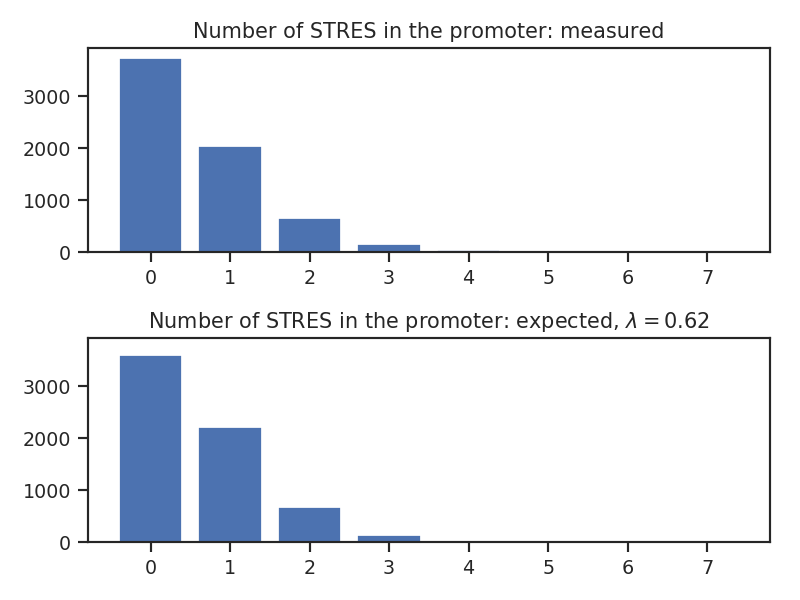

In [84]:
#Nice discussion on using chi squared test for poisson distribution here: 
#

#To see if the distributions appear to be Poisson use Chi squared test

fig, axarr = plt.subplots(2,1, sharey=True)
#STRE_hits = comparisons['Scer']['pka_act_Msn24_v_all'].PromHits1.prom_counts['Scer_STRE_count']
#STRE_hits = comparisons['Scer']['goi_high_v_all'].PromHits1.prom_counts['Scer_STRE_count']
#STRE_hits = comparisons['Scer']['pka_act_v_all'].PromHits1.prom_counts['Scer_STRE_count']
STRE_hits = comparisons['Scer']['pka_act_v_all'].PromHits2.prom_counts['Scer_STRE_count']
#


ax = axarr[0]

xvals = [item[0] for item in Counter(STRE_hits).items()]
meas_freq = [item[1] for item in Counter(STRE_hits).items()]

ax.bar(xvals, meas_freq)

ax.set_title('Number of STRES in the promoter: measured')
ax = axarr[1]

lam = STRE_hits.mean()

xvals = range(0,max(xvals)+1)

exp_freq = len(STRE_hits)*stats.poisson.pmf(xvals,lam)
ax.bar(xvals, exp_freq )

ax.set_title('Number of STRES in the promoter: expected, $\lambda = {:.2f}$'.format(lam))

fig.tight_layout()

In [78]:
#Measure Chi2 statistic
chi2_jj = []
for (exp,meas) in zip(exp_freq,meas_freq):
    chi2_jj.append((meas-exp)**2/exp)
chi2 = sum(chi2_jj)
stats.chi2.cdf(chi2, len(xvals)-1-1)

#This is the probability that the distribution is not poisson.  Basically 100%

#If it was poisson then I could test the difference of the means.  
#Test to see if estimate of mean for sample from two poisson distribution is differnt
#https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/PASS/Tests_for_the_Difference_Between_Two_Poisson_Rates.pdf


1.0

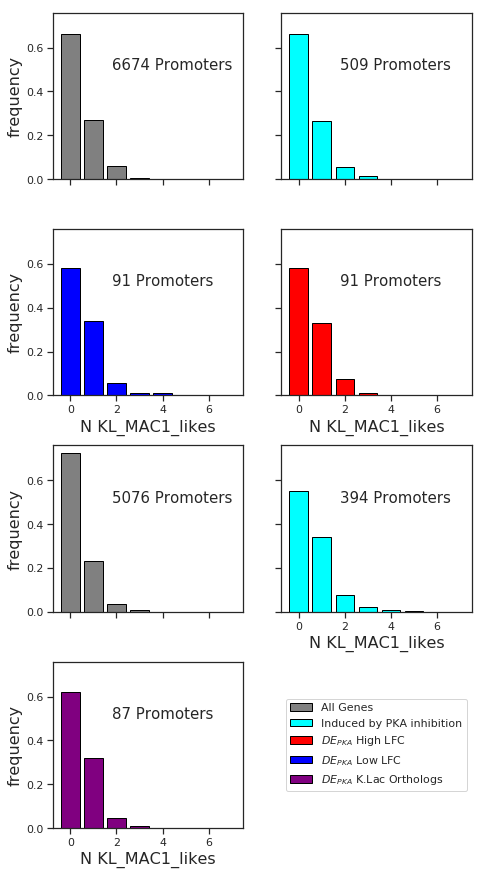

In [142]:
#Empirical Distributions

#Nice discussion on using chi squared test for poisson distribution here: 
#

#To see if the distributions appear to be Poisson use Chi squared test

fig, axarr = plt.subplots(4,2, sharey=True, figsize=(7.5,15))
fig.subplots_adjust(hspace=0.3)


subsets = {}

bw = 0.8

speclabels = {'Scer': 'S.Cerevisiae', 'Klac': 'K.Lactis'}

motif = 'KL_MAC1_like'#'PDS'#'TATA'#'STRE' #'KL_MAC1_like' #'TATA'

#(motif_hits, color, ax_ind, hatch, bar_offset, bar_width)
subsets['Scer'] = OrderedDict([('All Genes', (comparisons['Scer']['pka_act_v_all'].PromHits2.prom_counts['Scer_' + motif + '_count'],
                            'grey',[0,0],'', 0, bw)), 
           ('Induced by PKA inhibition', (comparisons['Scer']['pka_act_v_all'].PromHits1.prom_counts['Scer_' + motif + '_count'],
                                         'cyan',[0,1], '', 0,bw)),
           ('$DE_{PKA}$ High LFC', (comparisons['Scer']['goi_high_v_all'].PromHits1.prom_counts['Scer_' + motif + '_count'],
                                   'red',[1,1],'',0,bw)),
           ('$DE_{PKA}$ Low LFC', (comparisons['Scer']['goi_low_v_all'].PromHits1.prom_counts['Scer_' + motif + '_count'],
                                   'blue',[1,0],'',0, bw))
                              ])

subsets['Klac'] = OrderedDict([('All Genes', (comparisons['Klac']['pka_act_v_all'].PromHits2.prom_counts['Klac_' + motif + '_count'],
                            'grey',[2,0], '', 0, bw)), 
           ('Induced by PKA inhibition', (comparisons['Klac']['pka_act_v_all'].PromHits1.prom_counts['Klac_' + motif + '_count'],
                                         'cyan',[2,1], '', 0, bw)),
           ('$DE_{PKA}$ K.Lac Orthologs', (comparisons['Klac']['goi_kl_orth_v_all'].PromHits1.prom_counts['Klac_' + motif + '_count'],
                                   'purple',[3,0], '', 0, bw))
                              ])


legend_elements = []

for spec in ['Scer', 'Klac']: 

# if spec == 'Klac':
#     Nrows = 2
    
# elif spec == 'Scer':
#     Nrows = 3
    

    subsets_spec = subsets[spec]

    for subset_name, (motif_hits, color, ax_ind, hatch, bar_offset, bar_width) in subsets_spec.items():

        ax = axarr[ax_ind[0]][ax_ind[1]]

        xvals = np.array([item[0] for item in Counter(motif_hits).items()]) + bar_offset
        meas_freq = [item[1]/len(motif_hits) for item in Counter(motif_hits).items()]

        ax.bar(xvals, meas_freq, color=color, width = bar_width, hatch=hatch, edgecolor = 'black')
        if bar_offset ==0.0:  #only use title of non Msn2/4 delete
            #ax.set_title(subset_name)
            if spec == 'Scer':
                legend_elements.append(Patch(facecolor=color, edgecolor='black', label=subset_name))
            elif spec == 'Klac':
                if subset_name == '$DE_{PKA}$ K.Lac Orthologs':
                    legend_elements.append(Patch(facecolor=color, edgecolor='black', label=subset_name))
        ax.set_xlim(-0.75,7.5)
        
        if bar_width == bw: 
            ax.text(1.8,0.5, "{:d} Promoters".format(len(motif_hits)), fontdict={'size':15})
#         else: 
#             if bar_offset==0:
#                 N_all = len(motif_hits)
#             elif bar_offset ==0.5:
#                 N_M24_targ = len(motif_hits)
#                 ax.text(2.0,0.5, "{:d}/{:d} Promoters".format(N_all,N_M24_targ), fontdict={'size':16})
        
        

#fig.delaxes(axarr[1][3])



#legend_elements.append(Patch(facecolor='white', edgecolor='black', hatch='///',
#                         label='Msn2/4 Targets'))

ax = axarr[3,1]

ax.legend(handles=legend_elements, loc='center')
ax.axis('off')

# a = axarr[1][1]
# a.get_xticks()
# a.get_xticklabels()
# b = axarr[0][3]
# b.set_xticks(a.get_xticks())
# b.set_xticklabels(b.get_xticklabels())
for jj in range(0,4):
    for kk in range(0,2):
        if ((jj==0) | (jj==2 and kk==0)) : 
            axarr[jj][kk].set_xticklabels('')
        
        if (((jj==1 or jj==3)) or (jj==2 and kk==1)):
            axarr[jj][kk].set_xlabel("N " + motif + "s", fontdict={'size':16})
            #ax.set_xticklabels([0,2,4,6])
        
        if kk==0:
            #ax.set_ylabel(speclabels[spec] + "\nfrequency")
            axarr[jj][kk].set_ylabel('frequency', fontdict={'size':16})
        
            

#fig.savefig(figsave_dir + motif + '_dist_SC_KL.svg')

In [145]:
comparisons['Scer'].keys()

dict_keys(['goi_low_v_all', 'pka_act_noMsn24_v_all', 'goi_high_v_goi_low', 'goi_high_noMsn24_v_all', 'goi_high_Msn24_v_all', 'pka_act_Msn24_v_all', 'goi_high_v_all', 'pka_act_v_all'])

In [149]:
motif = 'TATA'
spec = 'Scer'
comp = 'goi_high'#'goi_kl_orth'#'goi_kl_orth_v_all'  # 'pka_act_v_all'

#comparisons['Scer']['pka_act_v_all'].PromHits2.prom_counts['Scer_' + motif + '_count']
print('Pct promoters for {} genes with 1 or more {} in {} : {}'.format(comp,motif,spec,
    comparisons[spec][comp + '_v_all'].PromHits1['pct'][motif]))
print('Pct promoters all genes with 1 or more {} in {} : {}'.format(motif,spec,
    comparisons[spec][comp + '_v_all'].PromHits2['pct'][motif]))
print('pvalue for that contingency table: {}'.format(comparisons[spec][comp + '_v_all']['pval'][motif]))
print('Avg number of {}s in promoter for {} genes : {}'.format(motif,comp,
    comparisons[spec][comp + '_v_all'].PromHits1['avg'][motif]))
print('Avg number of {}s in promoter for all genes : {}'.format(motif,
    comparisons[spec][comp + '_v_all'].PromHits2['avg'][motif]))

Pct promoters for goi_low genes with 1 or more TATA in Scer : 0.6813186813186813
Pct promoters all genes with 1 or more TATA in Scer : 0.5771651183697932
pvalue for that contingency table: 0.31142157342795757
Avg number of TATAs in promoter for goi_low genes : 1.5824175824175823
Avg number of TATAs in promoter for all genes : 1.217111177704525


In [69]:
comparisons['Scer']

{'goi_high_Msn24_v_all': {'promsets': ('ohnolog_goi_high_Msn24',
   'all_sc_promoters'),
  'pval': {'KL_MAC1_like': 0.62603152796038875,
   'PDS': 0.015935621698275778,
   'STRE': 0.0072471920917429765,
   'TATA': 0.29738986855033739}},
 'goi_high_noMsn24_v_all': {'promsets': ('ohnolog_goi_high_noMsn24',
   'all_sc_promoters'),
  'pval': {'KL_MAC1_like': 0.29764441993537943,
   'PDS': 0.52294487222599617,
   'STRE': 0.00150092166358536,
   'TATA': 0.33404308011920325}},
 'goi_high_v_all': {'promsets': ('ohnolog_goi_high', 'all_sc_promoters'),
  'pval': {'KL_MAC1_like': 0.26157145037242796,
   'PDS': 0.038871377130740667,
   'STRE': 2.9081743310339195e-05,
   'TATA': 0.15659284314265859}},
 'goi_high_v_goi_low': {'promsets': ('ohnolog_goi_high', 'ohnolog_goi_low'),
  'pval': {'KL_MAC1_like': 1.0,
   'PDS': 0.10267376290977169,
   'STRE': 0.025882324583565149,
   'TATA': 0.81808421276477383}},
 'goi_low_v_all': {'promsets': ('ohnolog_goi_low', 'all_sc_promoters'),
  'pval': {'KL_MAC1_lik

In [6]:
motif = 'TATA'
spec = 'Klac'


#comparisons['Scer']['pka_act_v_all'].PromHits2.prom_counts['Scer_' + motif + '_count']
print('Pct promoters for pka_act genes with 1 or more {} in {} : {}'.format(motif,spec,
    comparisons[spec]['goi_kl_orth_v_all'].PromHits1['pct'][motif]))
print('Pct promoters all genes with 1 or more {} in {} : {}'.format(motif,spec,
    comparisons[spec]['goi_kl_orth_v_all'].PromHits2['pct'][motif]))
print('pvalue for that contingency table: {}'.format(comparisons[spec]['goi_kl_orth_v_all']['pval'][motif]))
print('Avg number of {}s in promoter for pka_act genes : {}'.format(motif,
    comparisons[spec]['goi_kl_orth_v_all'].PromHits1['avg'][motif]))
print('Avg number of {}s in promoter for all genes : {}'.format(motif,
    comparisons[spec]['goi_kl_orth_v_all'].PromHits2['avg'][motif]))

AttributeError: 'PromComparison' object has no attribute 'PromHits1'

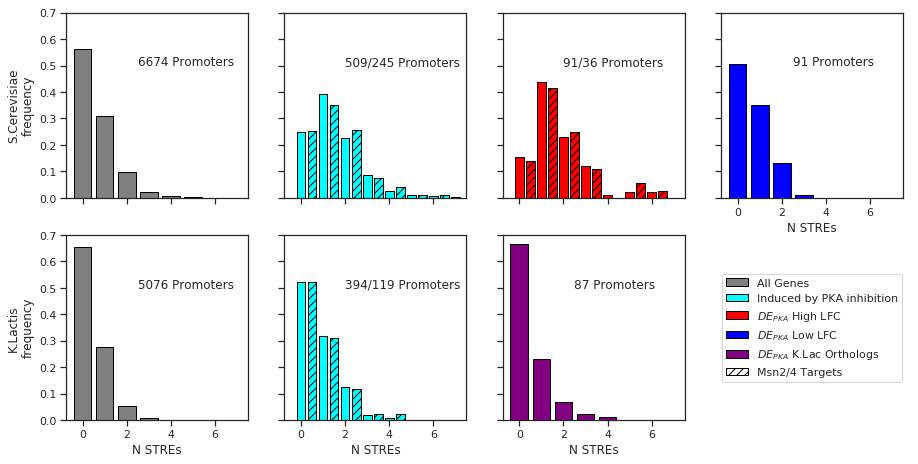

In [27]:
#Empirical Distributions with Msn2/4 targets added

#Nice discussion on using chi squared test for poisson distribution here: 
#

#To see if the distributions appear to be Poisson use Chi squared test

fig, axarr = plt.subplots(2,4, sharey=True, figsize=(15,7.5))


subsets = {}

bw = 0.8

speclabels = {'Scer': 'S.Cerevisiae', 'Klac': 'K.Lactis'}

motif = 'STRE' #'KL_MAC1_like' #'TATA'

#(motif_hits, color, ax_ind, hatch, bar_offset, bar_width)
subsets['Scer'] = OrderedDict([('All Genes', (comparisons['Scer']['pka_act_Msn24_v_all'].PromHits2.prom_counts['Scer_' + motif + '_count'],
                            'grey',[0,0],'', 0, bw)), 
           ('Induced by PKA inhibition', (comparisons['Scer']['pka_act_v_all'].PromHits1.prom_counts['Scer_' + motif + '_count'],
                                         'cyan',[0,1], '', 0,bw/2)),
           ('Induced by PKA inhibition, Msn2/4 Targets', (comparisons['Scer']['pka_act_Msn24_v_all'].PromHits1.prom_counts['Scer_' + motif + '_count'],
                            'cyan',[0,1],'///',0.5,bw/2)),
           ('$DE_{PKA}$ High LFC', (comparisons['Scer']['goi_high_v_all'].PromHits1.prom_counts['Scer_' + motif + '_count'],
                                   'red',[0,2],'',0,bw/2)),
           ('$DE_{PKA}$ High LFC, Msn2/4 Targets', (comparisons['Scer']['goi_high_Msn24_v_all'].PromHits1.prom_counts['Scer_' + motif + '_count'],
                                   'red',[0,2], '///', 0.5,bw/2)),
           ('$DE_{PKA}$ Low LFC', (comparisons['Scer']['goi_low_v_all'].PromHits1.prom_counts['Scer_' + motif + '_count'],
                                   'blue',[0,3],'',0, bw))
                              ])

subsets['Klac'] = OrderedDict([('All Genes', (comparisons['Klac']['pka_act_Msn24_v_all'].PromHits2.prom_counts['Klac_' + motif + '_count'],
                            'grey',[1,0], '', 0, bw)), 
           ('Induced by PKA inhibition', (comparisons['Klac']['pka_act_v_all'].PromHits1.prom_counts['Klac_' + motif + '_count'],
                                         'cyan',[1,1], '', 0, bw/2)),
           ('Induced by PKA inhibition, Msn2/4 Targets', (comparisons['Klac']['pka_act_Msn24_v_all'].PromHits1.prom_counts['Klac_' + motif + '_count'],
                            'cyan',[1,1], '///', 0.5, bw/2)),
           ('$DE_{PKA}$ K.Lac Orthologs', (comparisons['Klac']['goi_kl_orth_v_all'].PromHits1.prom_counts['Klac_' + motif + '_count'],
                                   'purple',[1,2], '', 0, bw))
                              ])


legend_elements = []

for spec in ['Scer', 'Klac']: 

# if spec == 'Klac':
#     Nrows = 2
    
# elif spec == 'Scer':
#     Nrows = 3
    

    subsets_spec = subsets[spec]

    for subset_name, (motif_hits, color, ax_ind, hatch, bar_offset, bar_width) in subsets_spec.items():

        ax = axarr[ax_ind[0]][ax_ind[1]]

        xvals = np.array([item[0] for item in Counter(motif_hits).items()]) + bar_offset
        meas_freq = [item[1]/len(motif_hits) for item in Counter(motif_hits).items()]

        ax.bar(xvals, meas_freq, color=color, width = bar_width, hatch=hatch, edgecolor = 'black')
        if bar_offset ==0.0:  #only use title of non Msn2/4 delete
            #ax.set_title(subset_name)
            if spec == 'Scer':
                legend_elements.append(Patch(facecolor=color, edgecolor='black', label=subset_name))
            elif spec == 'Klac':
                if subset_name == '$DE_{PKA}$ K.Lac Orthologs':
                    legend_elements.append(Patch(facecolor=color, edgecolor='black', label=subset_name))
        ax.set_xlim(-0.75,7.5)
        
        if bar_width == bw: 
            ax.text(2.5,0.5, "{:d} Promoters".format(len(motif_hits)), fontdict={'size':12})
        else: 
            if bar_offset==0:
                N_all = len(motif_hits)
            elif bar_offset ==0.5:
                N_M24_targ = len(motif_hits)
                ax.text(2.0,0.5, "{:d}/{:d} Promoters".format(N_all,N_M24_targ), fontdict={'size':12})
        
        if (ax_ind[0]==1 or ax_ind[1]==3):
            ax.set_xlabel("N " + motif + "s")
            #ax.set_xticklabels([0,2,4,6])
        
        if ax_ind[1]==0:
            ax.set_ylabel(speclabels[spec] + "\nfrequency")
        

#fig.delaxes(axarr[1][3])



legend_elements.append(Patch(facecolor='white', edgecolor='black', hatch='///',
                         label='Msn2/4 Targets'))
ax = axarr[1,3]

ax.legend(handles=legend_elements, loc='center')
ax.axis('off')

# a = axarr[1][1]
# a.get_xticks()
# a.get_xticklabels()
# b = axarr[0][3]
# b.set_xticks(a.get_xticks())
# b.set_xticklabels(b.get_xticklabels())
for jj in range(0,3): 
    axarr[0][jj].set_xticklabels('')

#fig.savefig(figsave_dir + motif + '_dist_SC_KL.svg')

AttributeError: 'PromComparison' object has no attribute 'PromHits2'

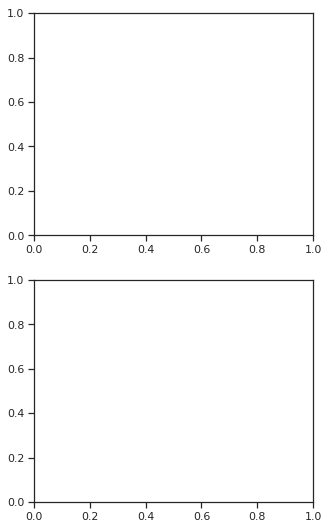

In [5]:
##Missing Ticks and legend

#Nice discussion on using chi squared test for poisson distribution here: 
#

#To see if the distributions appear to be Poisson use Chi squared test

fig, axarr = plt.subplots(2,1, sharey=True, figsize=(5,9))


subsets = {}

linewidth = 2.0
speclabels = {'Scer': 'S.Cerevisiae', 'Klac': 'K.Lactis'}

motif = 'KL_MAC1_like'# 'STRE' #'STRE' #'TATA'#'KL_MAC1_like' #'KL_MAC1_like' #'TATA' #'PDS'

#(motif_hits, color, linestyle, use_for_label)
subsets['Scer'] = OrderedDict([('All Genes', (comparisons['Scer']['pka_act_Msn24_v_all'].PromHits2.prom_counts['Scer_' + motif + '_count'],
                            'grey','-',True)), 
           ('Induced by PKA inhibition', (comparisons['Scer']['pka_act_v_all'].PromHits1.prom_counts['Scer_' + motif + '_count'],
                                         'cyan','-',True)),
           #('Induced by PKA inhibition, Msn2/4 Targets', (comparisons['Scer']['pka_act_Msn24_v_all'].PromHits1.prom_counts['Scer_' + motif + '_count'],
           #                 'cyan','--',False)),
           ('$DE_{PKA}$ High LFC', (comparisons['Scer']['goi_high_v_all'].PromHits1.prom_counts['Scer_' + motif + '_count'],
                                   'red','-',True)),
           #('$DE_{PKA}$ High LFC, Msn2/4 Targets', (comparisons['Scer']['goi_high_Msn24_v_all'].PromHits1.prom_counts['Scer_' + motif + '_count'],
           #                        'red','--', False)),
           ('$DE_{PKA}$ Low LFC', (comparisons['Scer']['goi_low_v_all'].PromHits1.prom_counts['Scer_' + motif + '_count'],
                                   'blue','-', True))
                              ])

subsets['Klac'] = OrderedDict([('All Genes', (comparisons['Klac']['pka_act_Msn24_v_all'].PromHits2.prom_counts['Klac_' + motif + '_count'],
                            'grey','-', False)), 
           ('Induced by PKA inhibition', (comparisons['Klac']['pka_act_v_all'].PromHits1.prom_counts['Klac_' + motif + '_count'],
                                         'cyan','-', False)),
           #('Induced by PKA inhibition, Msn2/4 Targets', (comparisons['Klac']['pka_act_Msn24_v_all'].PromHits1.prom_counts['Klac_' + motif + '_count'],
           #                 'cyan','--', False)),
           ('$DE_{PKA}$ K.Lac Orthologs', (comparisons['Klac']['goi_kl_orth_v_all'].PromHits1.prom_counts['Klac_' + motif + '_count'],
                                   'purple','-', True))
                              ])


legend_elements = []

for (spec, ax_ind) in [('Scer', 0), ('Klac', 1)]: 

    ax = axarr[ax_ind]
    

    subsets_spec = subsets[spec]

    for subset_name, (motif_hits, color, linestyle, use_for_label) in subsets_spec.items():
        print(subset_name)
        #ax = axarr[ax_ind[0]][ax_ind[1]]
        #if subset_name== "All Genes":
        ax.hist(motif_hits, bins = np.arange(0,7), cumulative=True, histtype='step', density=True, color=color, linestyle = linestyle, linewidth= linewidth)
        if use_for_label:
            legend_elements.append(Line2D([0], [0], color=color, linestyle=linestyle, lw=linewidth, label=subset_name))
    
    ax.set_xlim(0,6.0)     
    ax.set_ylabel('Cumulative Density', fontdict={'size':13})
    ax.set_xlabel('Number of ' + motif + 's', fontdict={'size':13})
    ax.set_title(speclabels[spec], fontdict={'size':14})

fig.subplots_adjust(hspace=0.3)
#legend_elements.append(Line2D([0], [0], color='grey', lw=linewidth, label='Msn2/4 target', linestyle='--'))
ax.legend(handles=legend_elements, bbox_to_anchor=(1.0, 1.0))
 
#fig.savefig(figsave_dir + motif + '_CDF_SC_KL.svg')

In [138]:
comparisons


NameError: name 'comparisons' is not defined

Pct between threhsold Induced by PKA inhibition : 0.4636363636363636
Pct between threhsold All KL Genes : 0.31895687061183553
Pct between threhsold K.Lac Orthologs of $DE_{PKA}$ : 0.39285714285714285
Pct between threhsold Induced by PKA inhibition, Msn2/4 Targets : 0.4722222222222222


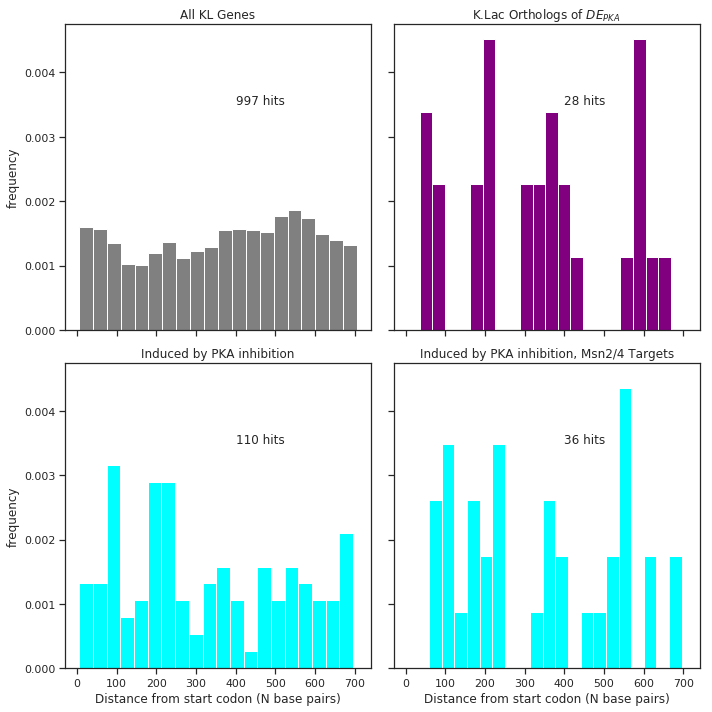

In [85]:
#location Distributions

#Nice discussion on using chi squared test for poisson distribution here: 
#

#To see if the distributions appear to be Poisson use Chi squared test

spec = 'Klac'
motif = 'PDS' #'KL_MAC1_like' #'TATA'


if spec == 'Klac':
    Nrows = 2
    
elif spec == 'Scer':
    Nrows = 3
    
fig, axarr = plt.subplots(Nrows,2, sharex = True, sharey = True, figsize=(10,5*Nrows))

subsets = {}

#(motif_hits, color, ax_ind)
subsets['Scer'] = OrderedDict({'All SC Genes': (comparisons['Scer']['pka_act_Msn24_v_all'].PromHits2.prom_counts['Scer_' + motif + '_full_features'],
                            'grey',[0,0]), 
           'Induced by PKA inhibition': (comparisons['Scer']['pka_act_v_all'].PromHits1.prom_counts['Scer_' + motif + '_full_features'],
                                         'cyan',[2,0]),
           '$DE_{PKA}$ High LFC': (comparisons['Scer']['goi_high_v_all'].PromHits1.prom_counts['Scer_' + motif + '_full_features'],
                                   'red',[1,0]),
           '$DE_{PKA}$ High LFC: Msn2/4 Targets': (comparisons['Scer']['goi_high_Msn24_v_all'].PromHits1.prom_counts['Scer_' + motif + '_full_features'],
                                   'red',[1,1]),
           'Induced by PKA inhibition, Msn2/4 Targets': (comparisons['Scer']['pka_act_Msn24_v_all'].PromHits1.prom_counts['Scer_' + motif + '_full_features'],
                            'cyan',[2,1]),
           '$DE_{PKA}$ Low LFC': (comparisons['Scer']['goi_low_v_all'].PromHits1.prom_counts['Scer_' + motif + '_full_features'],
                                   'blue',[0,1])
                      })

subsets['Klac'] = OrderedDict({'All KL Genes': (comparisons['Klac']['pka_act_Msn24_v_all'].PromHits2.prom_counts['Klac_' + motif + '_full_features'],
                            'grey',[0,0]), 
           'Induced by PKA inhibition': (comparisons['Klac']['pka_act_v_all'].PromHits1.prom_counts['Klac_' + motif + '_full_features'],
                                         'cyan',[1,0]),
           'K.Lac Orthologs of $DE_{PKA}$': (comparisons['Klac']['goi_kl_orth_v_all'].PromHits1.prom_counts['Klac_' + motif + '_full_features'],
                                   'purple',[0,1]),
           'Induced by PKA inhibition, Msn2/4 Targets': (comparisons['Klac']['pka_act_Msn24_v_all'].PromHits1.prom_counts['Klac_' + motif + '_full_features'],
                            'cyan',[1,1])
                      })


subsets_spec = subsets[spec]

# threshs = {'STRE':(100,400), 
#            'TATA': (0,250), 
#           }

# low_thresh, high_thresh = threshs[motif]
# print('Expected pct {}'.format((high_thresh-low_thresh)/700))

for subset_name, (motif_hits, color, ax_ind) in subsets_spec.items():
    
    ax = axarr[ax_ind[0]][ax_ind[1]]
    if ax_ind[1]==0:
        ax.set_ylabel('frequency')
    if spec == 'Scer': 
        if ax_ind[0]==2:
            ax.set_xlabel('Distance from start codon (N base pairs)')
    elif spec == 'Klac':
        if ax_ind[0]==1:
            ax.set_xlabel('Distance from start codon (N base pairs)')
    
    loc_list = []
    for hits in motif_hits:
        if len(hits)>0:
            for (loc, direction, context) in hits: 
                loc_list.append(loc)
    
    #print out percentages between thresholds
    loc_list_array = np.array(loc_list)
    loc_list_between = (loc_list_array[(loc_list_array>low_thresh) & (loc_list_array< high_thresh)])
    print('Pct between threhsold {} : {}'.format(subset_name, len(loc_list_between)/len(loc_list)))
    
    ax.hist(loc_list, color = color, bins=20, density=True)

    ax.set_title(subset_name)
#     ax.set_xlim(-0.75,7.5)
    ax.text(400,0.0035, "{:d} hits".format(len(loc_list)), fontdict={'size':12})
    
fig.tight_layout()

fig.savefig(figsave_dir + motif + '_loc_' + spec + '.svg')

All SC Genes
[ 0.17830387  0.21396464  0.2593647   0.3483668 ]
Induced by PKA inhibition, Msn2/4 Targets
[ 0.40408163  0.11428571  0.34285714  0.13877551]
$DE_{PKA}$ High LFC: Msn2/4 Targets
[ 0.52777778  0.11111111  0.33333333  0.02777778]
Induced by PKA inhibition
[ 0.42829077  0.11984283  0.32416503  0.12770138]
$DE_{PKA}$ Low LFC
[ 0.2967033   0.20879121  0.1978022   0.2967033 ]
$DE_{PKA}$ High LFC
[ 0.50549451  0.10989011  0.34065934  0.04395604]


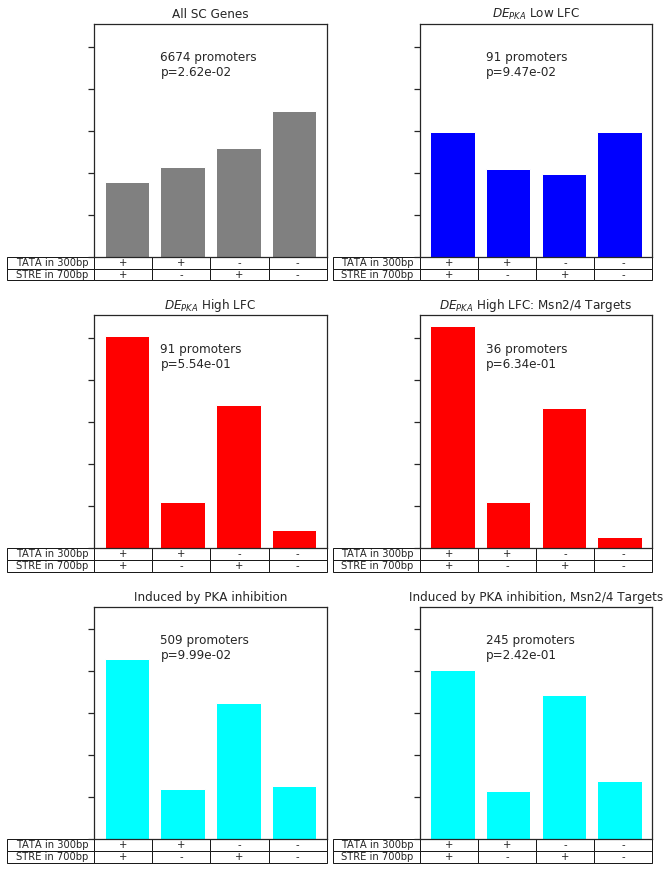

In [62]:
# with STRE and Tata box

#Location of TATA box

spec = 'Scer'

if spec == 'Klac':
    Nrows = 2
    
elif spec == 'Scer':
    Nrows = 3
    
fig, axarr = plt.subplots(Nrows,2, sharex = True, sharey = True, figsize=(10,5*Nrows))

subsets = {}

#(STRE_hits, color, ax_ind)
subsets['Scer'] = OrderedDict({'All SC Genes': (comparisons['Scer']['pka_act_Msn24_v_all'].PromHits2.prom_counts,
                            'grey',[0,0]), 
           'Induced by PKA inhibition': (comparisons['Scer']['pka_act_v_all'].PromHits1.prom_counts,
                                         'cyan',[2,0]),
           '$DE_{PKA}$ High LFC': (comparisons['Scer']['goi_high_v_all'].PromHits1.prom_counts,
                                   'red',[1,0]),
           '$DE_{PKA}$ High LFC: Msn2/4 Targets': (comparisons['Scer']['goi_high_Msn24_v_all'].PromHits1.prom_counts,
                                   'red',[1,1]),
           'Induced by PKA inhibition, Msn2/4 Targets': (comparisons['Scer']['pka_act_Msn24_v_all'].PromHits1.prom_counts,
                            'cyan',[2,1]),
           '$DE_{PKA}$ Low LFC': (comparisons['Scer']['goi_low_v_all'].PromHits1.prom_counts,
                                   'blue',[0,1])
                      })

subsets['Klac'] = OrderedDict({'All KL Genes': (comparisons['Klac']['pka_act_Msn24_v_all'].PromHits2.prom_counts,
                            'grey',[0,0]), 
           'Induced by PKA inhibition': (comparisons['Klac']['pka_act_v_all'].PromHits1.prom_counts,
                                         'cyan',[1,0]),
           'K.Lac Orthologs of $DE_{PKA}$': (comparisons['Klac']['goi_kl_orth_v_all'].PromHits1.prom_counts,
                                   'purple',[0,1]),
           'Induced by PKA inhibition, Msn2/4 Targets': (comparisons['Klac']['pka_act_Msn24_v_all'].PromHits1.prom_counts,
                            'cyan',[1,1])
                      })


subsets_spec = subsets[spec]

for subset_name, (prom_counts, color, ax_ind) in subsets_spec.items():

    ax = axarr[ax_ind[0]][ax_ind[1]]
    
    TATA_hits = prom_counts[spec + '_TATA_full_features']
    STRE_hits = prom_counts[spec + '_STRE_full_features']
    
    M_TATA = 300
    TATA_M = []
    for prom, hit_list in TATA_hits.items():
        for (loc, direction, context) in hit_list:
            if loc<M_TATA: 
                TATA_M.append(prom)

    M_STRE = 700
    STRE_M = []
    for prom, hit_list in STRE_hits.items():
        for (loc, direction, context) in hit_list:
            if loc<M_STRE: 
                STRE_M.append(prom)
                
    TATA_STRE = len(set(TATA_M) & set(STRE_M))
    TATA_no_STRE = len(set(TATA_M) - set(STRE_M))
    no_TATA_STRE = len(set(STRE_M)-set(TATA_M))
    no_TATA_no_STRE = len(set(TATA_hits.index)-(set(TATA_M) | set(STRE_M)))
    
    
    ax.bar(range(0,4), np.array([TATA_STRE, TATA_no_STRE, no_TATA_STRE, no_TATA_no_STRE])/len(TATA_hits), color=color)
    ax.set_title(subset_name)
    
    print(subset_name)
    print(np.array([TATA_STRE, TATA_no_STRE, no_TATA_STRE, no_TATA_no_STRE])/len(TATA_hits))
    
    #Get pvalue from fisher test
    oddsratio, pval = stats.fisher_exact([[TATA_STRE, TATA_no_STRE], [no_TATA_STRE, no_TATA_no_STRE]])
    
    # Plot bars and create text labels for the table
    cell_text = [['+','+','-','-'],['+','-','+','-']]

    # Add a table at the bottom of the axes
    the_table = ax.table(cellText=cell_text,
                          rowLabels=['TATA in 300bp', 'STRE in 700bp'],
                          cellLoc = 'center',
                          loc='bottom')

    ax.text(0.6, 0.43, "{:d} promoters\np={:0.2e}".format(len(TATA_hits),pval), fontdict={'size':12})
    
    ax.set_xticks([])
    ax.set_yticklabels([])

fig.subplots_adjust(hspace=0.25, wspace = 0.4)

fig.savefig(figsave_dir + 'TATA_STRE_' + spec + '.svg')

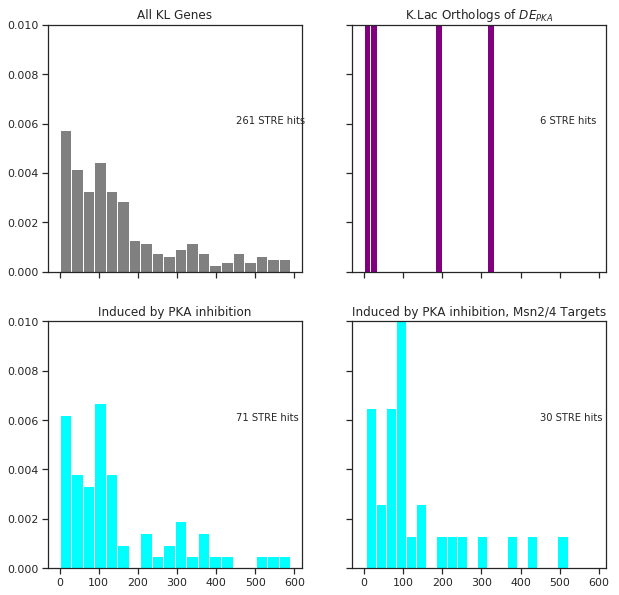

In [109]:
# Avergage distance 

#Location of TATA box

spec = 'Klac'

if spec == 'Klac':
    Nrows = 2
    
elif spec == 'Scer':
    Nrows = 3
    
fig, axarr = plt.subplots(Nrows,2, sharex = True, sharey = True, figsize=(10,5*Nrows))

subsets = {}

#(STRE_hits, color, ax_ind)
subsets['Scer'] = OrderedDict({'All SC Genes': (comparisons['Scer']['pka_act_Msn24_v_all'].PromHits2.prom_counts,
                            'grey',[0,0]), 
           'Induced by PKA inhibition': (comparisons['Scer']['pka_act_v_all'].PromHits1.prom_counts,
                                         'cyan',[2,0]),
           '$DE_{PKA}$ High LFC': (comparisons['Scer']['goi_high_v_all'].PromHits1.prom_counts,
                                   'red',[1,0]),
           '$DE_{PKA}$ High LFC: Msn2/4 Targets': (comparisons['Scer']['goi_high_Msn24_v_all'].PromHits1.prom_counts,
                                   'red',[1,1]),
           'Induced by PKA inhibition, Msn2/4 Targets': (comparisons['Scer']['pka_act_Msn24_v_all'].PromHits1.prom_counts,
                            'cyan',[2,1]),
           '$DE_{PKA}$ Low LFC': (comparisons['Scer']['goi_low_v_all'].PromHits1.prom_counts,
                                   'blue',[0,1])
                      })

subsets['Klac'] = OrderedDict({'All KL Genes': (comparisons['Klac']['pka_act_Msn24_v_all'].PromHits2.prom_counts,
                            'grey',[0,0]), 
           'Induced by PKA inhibition': (comparisons['Klac']['pka_act_v_all'].PromHits1.prom_counts,
                                         'cyan',[1,0]),
           'K.Lac Orthologs of $DE_{PKA}$': (comparisons['Klac']['goi_kl_orth_v_all'].PromHits1.prom_counts,
                                   'purple',[0,1]),
           'Induced by PKA inhibition, Msn2/4 Targets': (comparisons['Klac']['pka_act_Msn24_v_all'].PromHits1.prom_counts,
                            'cyan',[1,1])
                      })


subsets_spec = subsets[spec]

for subset_name, (prom_counts, color, ax_ind) in subsets_spec.items():

    ax = axarr[ax_ind[0]][ax_ind[1]]
    
    TATA_hits = prom_counts[spec + '_TATA_full_features']
    STRE_hits = prom_counts[spec + '_STRE_full_features']
    
    M_TATA = 300
    TATA_M = []
    for prom, hit_list in TATA_hits.items():
        for (loc, direction, context) in hit_list:
            if loc<M_TATA: 
                TATA_M.append(prom)

    M_STRE = 700
    STRE_M = []
    for prom, hit_list in STRE_hits.items():
        for (loc, direction, context) in hit_list:
            if loc<M: 
                STRE_M.append(prom)
    
    STRE_TATA_mindist = []

    TATA_STRE_genes = (set(TATA_M) & set(STRE_M))
    for gene, hit_list in STRE_hits[TATA_STRE_genes].items():
        TATA_locs = np.array([TATA_hit[0] for TATA_hit in TATA_hits[gene]])
        for (loc, direction, context) in hit_list:
            hit_TATA_dists = loc-TATA_locs
            hit_TATA_dists_pos = hit_TATA_dists[hit_TATA_dists>=0]
            if len(hit_TATA_dists_pos)>0:
                STRE_TATA_mindist.append(min(hit_TATA_dists_pos))

    
    ax.hist(STRE_TATA_mindist, color = color, bins=20, density=True)

    ax.set_title(subset_name)
    
    ax.set_ylim(0,0.01)
    ax.text(450,0.006, "{:d} STRE hits".format(len(STRE_TATA_mindist), fontdict={'size':12}))
    
    
    
    
#     ax.bar(range(0,4), np.array([TATA_STRE, TATA_no_STRE, no_TATA_STRE, no_TATA_no_STRE])/len(TATA_hits), color=color)
#     ax.set_title(subset_name)
    
    
#     # Plot bars and create text labels for the table
#     cell_text = [['+','+','-','-'],['+','-','+','-']]

#     # Add a table at the bottom of the axes
#     the_table = ax.table(cellText=cell_text,
#                           rowLabels=['TATA in 300bp', 'STRE in 700bp'],
#                           cellLoc = 'center',
#                           loc='bottom')

#     ax.text(0, 0.43, "{:d} promoters".format(len(TATA_hits)), fontdict={'size':12})
    
#     ax.set_xticks([])
#     ax.set_yticklabels([])

#fig.subplots_adjust(hspace=0.25, wspace = 0.4)

In [98]:

STRE_TATA_mindist = []

TATA_STRE_genes = (set(TATA_M) & set(STRE_M))
for gene, hit_list in STRE_hits[TATA_STRE_genes].items():
    TATA_locs = np.array([TATA_hit[0] for TATA_hit in TATA_hits[gene]])
    for (loc, direction, context) in hit_list:
        hit_TATA_dists = loc-TATA_locs
        hit_TATA_dists_pos = hit_TATA_dists[hit_TATA_dists>=0]
        if len(hit_TATA_dists_pos)>0:
            STRE_TATA_mindist.append(min(hit_TATA_dists_pos))

STRE_TATA_mindist

[0, 332, 0, 197, 3, 22]

Scer
all
pka_act
pka_act_Msn24
pka_act_noMsn24
goi_high
goi_high_Msn24
goi_high_noMsn24
goi_low
Klac
all
pka_act
pka_act_Msn24
pka_act_noMsn24
goi_kl_orth
Scer
all
pka_act
pka_act_Msn24
pka_act_noMsn24
goi_high
goi_high_Msn24
goi_high_noMsn24
goi_low
Klac
all
pka_act
pka_act_Msn24
pka_act_noMsn24
goi_kl_orth


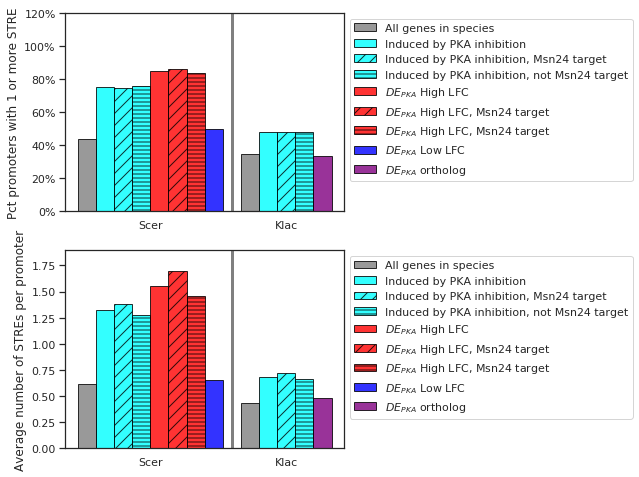

In [116]:
# Visualize summary

#Plot percentage of STREs in low and high as you go away from S.Cer

motif_name = 'STRE'

#avg is the average number of STREs in the set, 
#hits is the percentage of promoters with at least one STRE

ylabels = {'pct': 'Pct promoters with 1 or more STRE', 
           'avg': 'Average number of STREs per promoter'}

fig_bar, axs_bar = plt.subplots(2,1, figsize=(5,8), sharex = True)
bw = 1.0
opacity = 0.8

bar_sets = {'Scer': ['all', 'pka_act','pka_act_Msn24', 'pka_act_noMsn24', 
                     'goi_high', 'goi_high_Msn24', 'goi_high_noMsn24','goi_low'], 
            'Klac': ['all', 'pka_act','pka_act_Msn24', 'pka_act_noMsn24', 
                     'goi_kl_orth'],
            }

plot_props = {'all':['All genes in species', 'grey', '',None],  #label, color, hatch, space for a barplot handle
              'pka_act': ['Induced by PKA inhibition', 'cyan', '',None],
              'pka_act_Msn24': ['Induced by PKA inhibition, Msn24 target', 'cyan', '//',None],
              'pka_act_noMsn24': ['Induced by PKA inhibition, not Msn24 target', 'cyan', '---', None],
              'goi_high': ['$DE_{PKA}$ High LFC','red','',None],
              'goi_high_Msn24': ['$DE_{PKA}$ High LFC, Msn24 target','red', '//',None], 
              'goi_high_noMsn24': ['$DE_{PKA}$ High LFC, Msn24 target','red', '---',None],
              'goi_low': ['$DE_{PKA}$ Low LFC','blue', '',None],
              'goi_kl_orth': ['$DE_{PKA}$ ortholog','purple', '',None]
             }

legend_order = ['all', 'pka_act','pka_act_Msn24', 'pka_act_noMsn24', 'goi_high', 'goi_high_Msn24', 'goi_high_noMsn24','goi_low', 'goi_kl_orth']

for jj, quantity_to_view in enumerate(['pct', 'avg']):  
    ax_bar = axs_bar[jj]
    index = {}
    data = {}
    colors = {}
    hatches = {}
    label_order = []
#     legend_labels = {}
    jj = 0

    for spec in ['Scer', 'Klac']:
        print(spec)
        index_spec = []
        data_spec = []
        hatches_spec = []
        colors_spec = []
#         legend_labels_spec = []
        label_order.append(spec) 
        for bar_set in bar_sets[spec]:
            print(bar_set)
            index_spec.append(jj)
            if bar_set == 'all': 
                val = comparisons[spec]['pka_act_v_all'].PromHits2[quantity_to_view][motif_name]
            else:
                val = comparisons[spec][bar_set + '_v_all'].PromHits1[quantity_to_view][motif_name]
            data_spec.append(val)
#             legend_labels_spec.append(plot_props[bar_set][0])
            colors_spec.append(plot_props[bar_set][1])
            hatches_spec.append(plot_props[bar_set][2])
            jj = jj+1
        index[spec] = index_spec
        data[spec] = data_spec
#         legend_labels[spec] = legend_labels_spec
        colors[spec] = colors_spec
        hatches[spec] = hatches_spec
        jj = jj+1


#     bar_plots = []
#     legend_label_list = []
    for spec in ['Scer', 'Klac']: 
        spec_data = data[spec]
        bar_plot = ax_bar.bar(index[spec],spec_data, bw,
                     alpha=opacity,
                     color=colors[spec], 
                     edgecolor = 'black' 
#                      label=legend_labels[spec]
                    ) 
        for kk, bar in enumerate(bar_plot):
            hatch = hatches[spec][kk]
            bar.set_hatch(hatch)
            bar_set = bar_sets[spec][kk]
            plot_props[bar_set][3]=bar
#         bar_plots.append(bar_plot)
#         legend_label_list.append(legend_labels[spec])

    ymax = max(data['Scer'] + data['Klac'] + [1.0]) + 0.2
    ax_bar.vlines([len(index['Scer'])], ymin = 0, ymax = ymax, colors = 'gray',linewidth=3)
    ax_bar.set_xticklabels(label_order)
    ax_bar.set_xticks([np.median(index['Scer']), np.median(index['Klac'])])

    if quantity_to_view == 'pct': 
        # make yaxis ticks into percentages
        yvals = ax_bar.get_yticks()
        ax_bar.set_yticklabels(['{:.0%}'.format(y) for y in yvals])

    ax_bar.tick_params(bottom=False,labelbottom=True)
    ax_bar.set_ylim(0,ymax)
    ax_bar.set_ylabel(ylabels[quantity_to_view])
    
    bar_plots_for_legend = [plot_props[bar_set_name][3] for bar_set_name in legend_order]
    legend_label_list = [plot_props[bar_set_name][0] for bar_set_name in legend_order]
    ax_bar.legend(bar_plots_for_legend, legend_label_list, loc = 'upper left', bbox_to_anchor=(1.0, 1.0))

# #remember to move figure to laptop
#fig_bar.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/STRE_KL_SC_avg_count.svg'))


In [15]:
#Get promoter counts for S.Cer and K.Lac

#merge in promoter counts
ohnologs_goi_prom_counts = ohnologs_goi_klorth.merge(prom_counts['Scer']['ohnolog_goi_high'], how='left', left_on='sc_genename_high', right_index=True)
ohnologs_goi_prom_counts = ohnologs_goi_prom_counts.merge(prom_counts['Scer']['ohnolog_goi_low'], how = 'left', left_on = 'sc_genename_low', right_index=True, suffixes=('_high','_low'))

#merge in KL promoter counts
prom_counts_kl = prom_counts['Klac']['ohnolog_goi'].copy()
#prom_counts_kl.rename(columns={column:column + '_kl' for column in prom_counts_kl.columns}, inplace=True)

ohnologs_goi_prom_counts = ohnologs_goi_prom_counts.merge(prom_counts_kl, how = 'left', left_on = 'kl_genename', right_index=True)


<IPython.core.display.Javascript object>


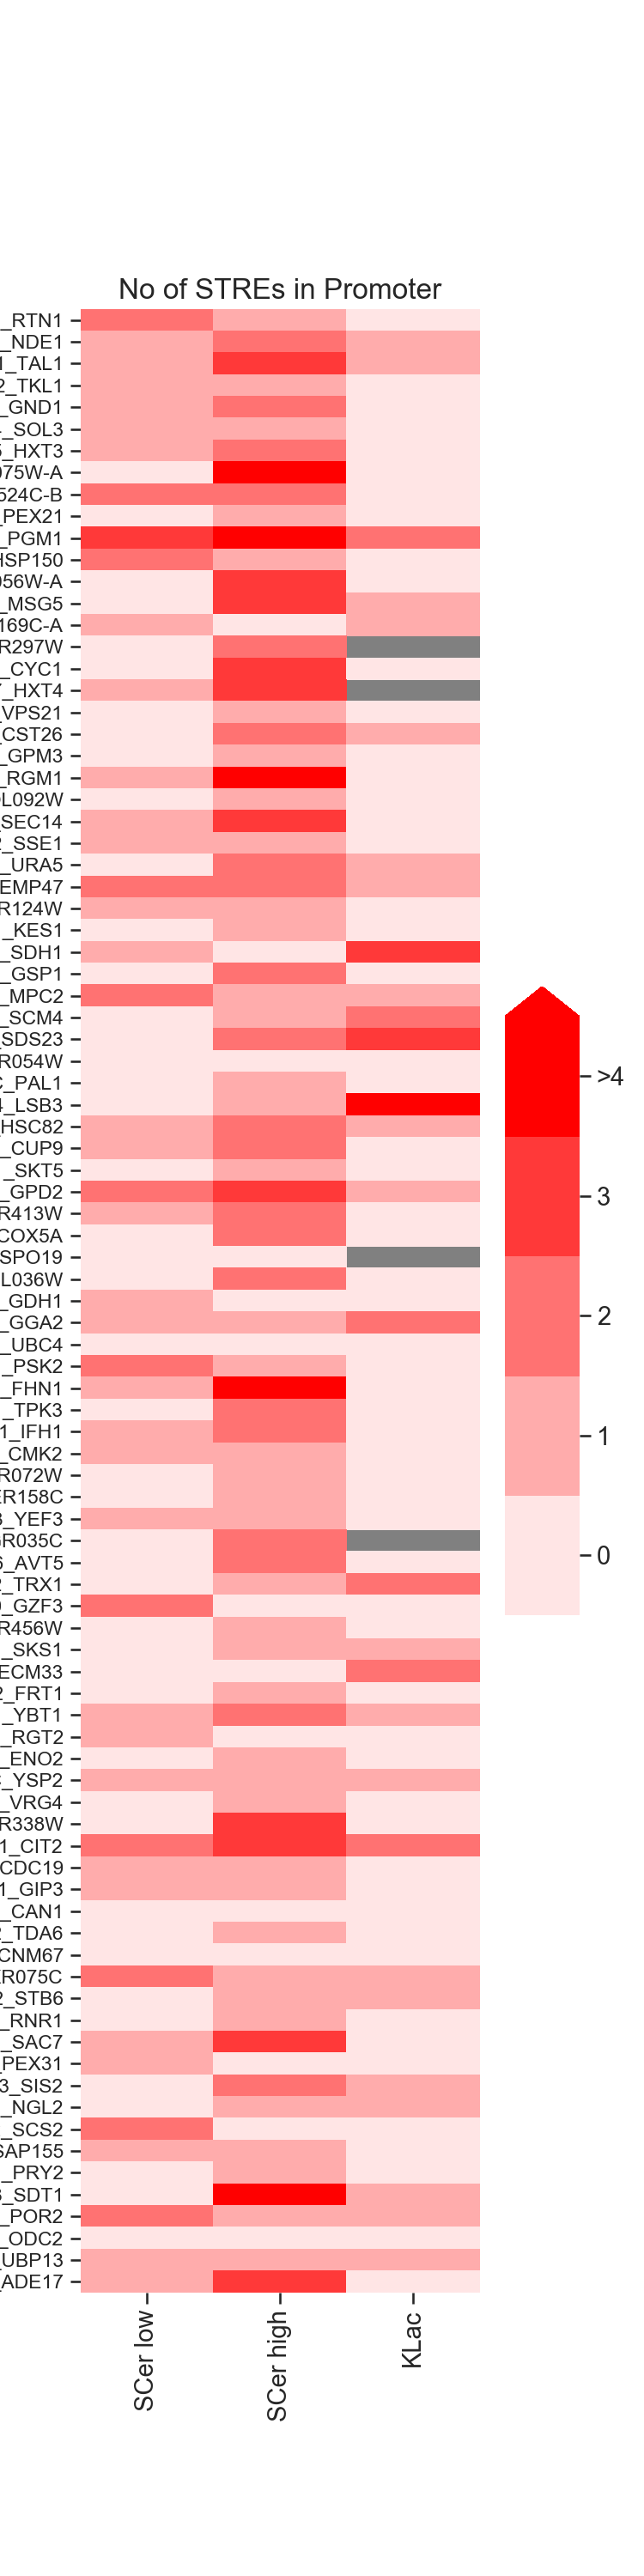

Text(0.5, 1.0, 'No of STREs in Promoter')

In [18]:
motif = 'STRE'
columns_to_show = ['Scer_' + motif + '_count_low', 'Scer_' + motif + '_count_high', 'Klac_' + motif + '_count']

ohnologs_goi_prom_counts_sorted = ohnologs_goi_prom_counts.loc[:, columns_to_show]

fig_STRE, ax_STRE = plt.subplots(figsize=(5,20))

vmax = 5
hmap_stre = sns.heatmap(ohnologs_goi_prom_counts_sorted, vmax = vmax, ax=ax_STRE, cmap=sns.light_palette("red",vmax), cbar_kws={'ticks':[val + 0.5 for val in range(vmax)],  'extend':'max', 'aspect':8}) #, 'ticklabels':[str(val) for val in range(vmax)] + ['>' + str(vmax)], 'yticklabels':['0', '1', '>1']})
cbar = fig_STRE.axes[1]
cbar.set_yticklabels([str(val) for val in range(vmax-1)] + ['>' + str(vmax-1)], fontdict={"fontsize":14})
ax_STRE.set_facecolor("grey")
ax_STRE.set_xticklabels(['SCer low', 'SCer high', 'KLac'], fontdict={"fontsize":14})
ax_STRE.set_ylabel('')
ax_STRE.set_title('No of STREs in Promoter',fontdict={"fontsize":16})
#fig_STRE.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/STRE_KL_SC_avg_count.svg'))

<IPython.core.display.Javascript object>


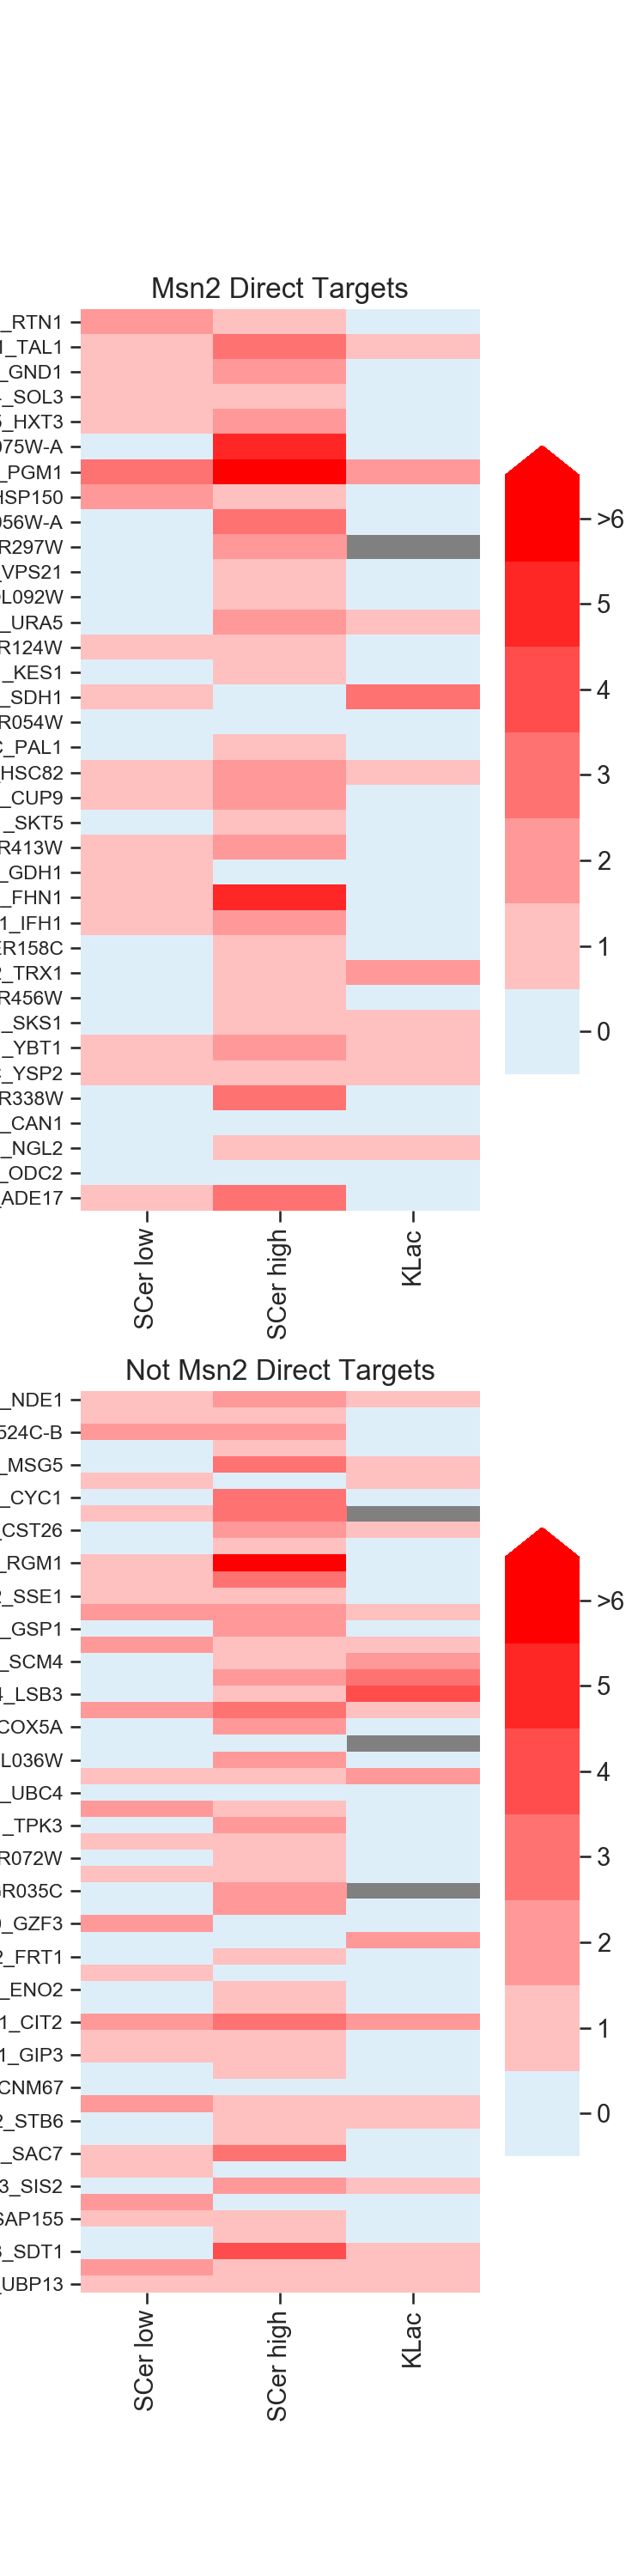

In [21]:
motif = 'STRE'
columns_to_show = ['Scer_' + motif + '_count_low', 'Scer_' + motif + '_count_high', 'Klac_' + motif + '_count']

fig, axarr = plt.subplots(2,1, figsize=(5,20))

sc_high_subsets = OrderedDict({'Msn2 Direct Targets': m24_targets['Scer']['DEpka_high'], 
                   'Not Msn2 Direct Targets' : set(ohnologs_goi_prom_counts['sc_genename_high'])-m24_targets['Scer']['DEpka_high']}
                             )

vmax = 7
cmap = sns.light_palette("red",vmax)
cmap[0] = np.array([222.0/255.0, 238.0/255.0, 249/255.0, 1.0 ])  #Make the 0 color light blue

hmaps_stre = {}
for (jj, (subset_name,subset)) in enumerate(sc_high_subsets.items()):
    ax = axarr[jj]
    dePKA_prom_subset = ohnologs_goi_prom_counts[ohnologs_goi_prom_counts['sc_genename_high'].isin(subset)]
    dePKA_prom_subset_colfilt = dePKA_prom_subset.loc[:,columns_to_show]
    
    hmaps_stre[subset_name] = sns.heatmap(dePKA_prom_subset_colfilt, 
                            vmax = vmax, 
                            ax=ax, 
                            cmap= cmap, 
                            cbar_kws={'ticks':[val + 0.5 for val in range(vmax)],  
                                      'extend':'max',
                                      'aspect':8}
                           ) #, 'ticklabels':[str(val) for val in range(vmax)] + ['>' + str(vmax)], 'yticklabels':['0', '1', '>1']})

    ax.set_facecolor("grey")
    ax.set_xticklabels(['SCer low', 'SCer high', 'KLac'], fontdict={"fontsize":14})
    ax.set_ylabel('')
    ax.set_title(subset_name,fontdict={"fontsize":16})
    

for kk in [2,3]:
    cbar = fig.axes[kk]
    cbar.set_yticklabels([str(val) for val in range(vmax-1)] + ['>' + str(vmax-1)], 
                             fontdict={"fontsize":14})

## Might want to just make one axis. 
    
#fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
#                    wspace=0.02, hspace=0.02)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8


# cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
# cbar = fig.colorbar(im, cax=cb_ax)

# #set the colorbar ticks and tick labels
# cbar.set_ticks(np.arange(0, 1.1, 0.5))
# cbar.set_ticklabels(['low', 'medium', 'high'])

fig.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/STRE_KL_SC_all_Msn2_groups.svg'),bbox_inches='tight')

# STRE and Msn2/4 deletion comparison

In [24]:
#Load DEseq data for SCer PKA AS -/+ NMPP1 
pkainh_deseq = pd.read_csv(os.path.normpath(data_processing_dir + 'kl_sc_PKA_as_m24_r1g1_20181017/20181017_deseq_SC_AS_WT_nmpp1.csv'), index_col=0)
pkainh_deseq['SC_common_name'] = io_library.SC_common_name_lookup(pkainh_deseq.index)

#Load DEseq data for SCer PKA AS Msn2/4 delete -/+ NMPP1 
pkainh_m24del_deseq = pd.read_csv(os.path.normpath(data_processing_dir + 'kl_sc_PKA_as_m24_r1g1_20181017/20181017_deseq_SC_AS_M24_nmpp1.csv'), index_col=0)
pkainh_m24del_deseq['SC_common_name'] = io_library.SC_common_name_lookup(pkainh_m24del_deseq.index)

#Merge PKA inh and PKA inh m24del deseq data
pkainh_deseq_merged = pkainh_deseq.merge(pkainh_m24del_deseq, how = 'inner', left_index = True, right_index = True, suffixes=('_WT','_M24'))

pkainh_deseq_STRE = pkainh_deseq_merged.merge(prom_counts['Scer']['all_sc_promoters'], how='inner', left_index = True, right_index=True)

<IPython.core.display.Javascript object>


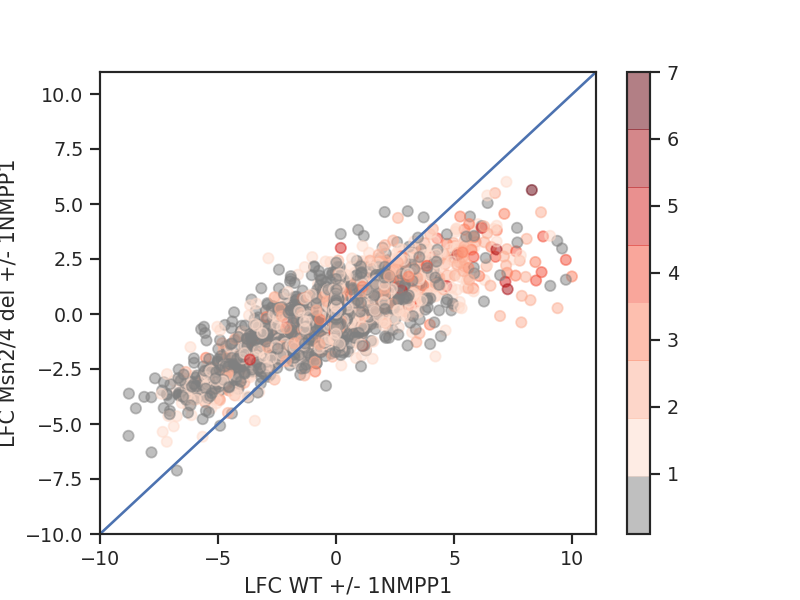

In [72]:
fig, ax = plt.subplots([1,3])

cmap = plt.cm.get_cmap('Reds', 8)
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5, .5, .5, 1.0)

# create the new map
cmap_new = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

# gene_sets = {'low': ohnologs_goi['sc_genename_low'], 'high':ohnologs_goi['sc_genename_high'], 'PKA_act':prom_counts['Scer']['sc_pkainh_act_20181214'].index, 'all': pkainh_deseq_STRE.index }

# for gene_set in ['low', ]

sc = ax.scatter(pkainh_deseq_STRE['log2FoldChange_WT'], pkainh_deseq_STRE['log2FoldChange_M24'], c = pkainh_deseq_STRE['STRE_count'], alpha = 0.5, cmap=cmap_new, vmin=0.1)
ax.plot([-10,11],[-10,11])
ax.set_xlabel('LFC WT +/- 1NMPP1')
ax.set_ylabel('LFC Msn2/4 del +/- 1NMPP1')
ax.set_xlim([-10,11])
ax.set_ylim([-10,11])
plt.colorbar(sc)

In [ ]:
pio.write_image(fig, os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/figtest.svg'))

In [126]:
data_subset = pkainh_deseq_STRE.loc[ohnologs_goi['sc_genename_high'],:]
data_subset[data_subset['STRE_count']==3]

/home/lab/envs/seqanalysis/lib/python3.5/site-packages/pandas/core/indexing.py:1472: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



baseMean_WT  log2FoldChange_WT  lfcSE_WT    stat_WT     pvalue_WT  \
YGR043C     154.270527           8.433640  0.915809   9.208953  3.293212e-20   
YDR034W-B   659.826602           6.057692  0.432173  14.016819  1.230060e-44   
YIL113W     327.155962           5.840931  0.410394  14.232506  5.758039e-46   
YEL039C     125.188988           5.430983  0.684449   7.934827  2.107897e-15   
YDR342C     532.969650           5.350477  1.148871   4.657163  3.205964e-06   
YKL091C     503.103125           4.994394  0.387291  12.895712  4.758450e-38   
YDL022W     236.102452           3.527215  0.331886  10.627784  2.213075e-26   
YAL034C     559.012012           2.488248  0.376650   6.606252  3.941710e-11   
YNR001C     111.310117           2.477500  0.357057   6.938665  3.958225e-12   
YOR134W      26.915863           2.220563  0.514609   4.315048  1.595684e-05   
YLR028C    5516.317186           2.011821  0.424422   4.740144  2.135666e-06   

                padj_WT SC_common_name_WT  baseMean_M24  log2FoldChange_M24  \
YGR043C    4.106157e-19              NQM1      2.889794            2.361737   
YDR034W-B  6.148160e-43         YDR034W-B     11.032446            1.726823   
YIL113W    3.182424e-44              SDP1     57.481187            3.496255   
YEL039C    1.966914e-14              CYC7      7.180723            3.842918   
YDR342C    1.373166e-05              HXT7     31.370044            2.800322   
YKL091C    1.628070e-36           YKL091C     87.507277            2.555587   
YDL022W    4.025555e-25              GPD1     63.405980            2.448166   
YAL034C    2.759677e-10             FUN19     99.417284            0.284363   
YNR001C    2.954789e-11              CIT1     29.578080            1.334903   
YOR134W    6.201484e-05              BAG7     12.719672            1.838989   
YLR028C    9.349434e-06             ADE16   1812.515247            0.084199   

           lfcSE_M24  stat_M24    pvalue_M24      padj_M24 SC_common_name_M24  \
YGR043C     1.357437  1.739851  8.188526e-02  2.441607e-01               NQM1   
YDR034W-B   0.777794  2.220154  2.640829e-02  1.031203e-01          YDR034W-B   
YIL113W     0.491738  7.109990  1.160516e-12  3.856692e-11               SDP1   
YEL039C     1.131762  3.395518  6.849889e-04  4.804167e-03               CYC7   
YDR342C     1.171351  2.390677  1.681733e-02  7.147055e-02               HXT7   
YKL091C     0.475617  5.373202  7.735077e-08  1.270509e-06            YKL091C   
YDL022W     0.361641  6.769607  1.291329e-11  3.804762e-10               GPD1   
YAL034C     0.363191  0.782958  4.336518e-01  6.978473e-01              FUN19   
YNR001C     0.507989  2.627819  8.593426e-03  4.127733e-02               CIT1   
YOR134W     0.601314  3.058287  2.226064e-03  1.330981e-02               BAG7   
YLR028C     0.426764  0.197296  8.435961e-01  9.403950e-01              ADE16   

           STRE_count  PDS_count  TATA_count  
YGR043C           3.0        0.0         3.0  
YDR034W-B         3.0        0.0         0.0  
YIL113W           3.0        0.0         1.0  
YEL039C           3.0        0.0         2.0  
YDR342C           3.0        0.0         1.0  
YKL091C           3.0        0.0         0.0  
YDL022W           3.0        0.0         2.0  
YAL034C           3.0        0.0         2.0  
YNR001C           3.0        1.0         1.0  
YOR134W           3.0        0.0         0.0  
YLR028C           3.0        0.0         3.0

In [ ]:
ohnologs_goi['SC_genename_low']

<IPython.core.display.Javascript object>


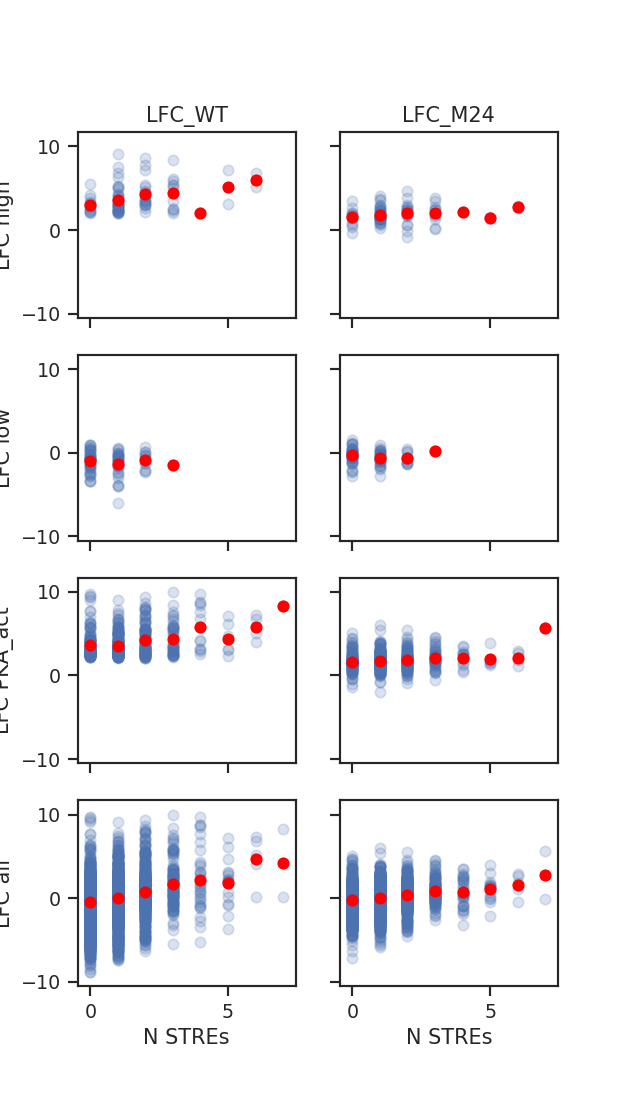

/home/lab/envs/seqanalysis/lib/python3.5/site-packages/pandas/core/indexing.py:1472: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



In [98]:
## STRE v.s. LFC with and without Msn2/4 deletion

fig, axarr = plt.subplots(4,2, sharex = True, sharey=True)


vals_to_plot = {'LFC_WT': 'log2FoldChange_WT', 'LFC_M24': 'log2FoldChange_M24'}
gene_sets = {'low': ohnologs_goi['sc_genename_low'], 'high':ohnologs_goi['sc_genename_high'], 'PKA_act':prom_counts['Scer']['sc_pkainh_act_20181214'].index, 'all': pkainh_deseq_STRE.index }


for kk, gene_set_name in enumerate(['high','low','PKA_act','all']):
    gene_set = gene_sets[gene_set_name]
    
    data_subset = pkainh_deseq_STRE.loc[gene_set,:]

    N_STREs = [N for N in list(set(data_subset['STRE_count'])) if not(np.isnan(N))]
    N_STREs.sort()
    
    for jj, val_to_plot_short in enumerate(['LFC_WT', 'LFC_M24']):
        ax = axarr[kk,jj]
        val_to_plot = vals_to_plot[val_to_plot_short]
    
        ax.scatter(data_subset['STRE_count'], data_subset[val_to_plot], alpha = 0.2)
        
        mean_LFC = []
        for N in N_STREs: 
            mean_LFC.append(data_subset.loc[(data_subset['STRE_count']==N), val_to_plot].mean())
        
        ax.scatter(N_STREs, mean_LFC, color='Red')

        
        #ax.set_xlim([-0.5,7.5])
        #ax.set_ylim([-9,11])
        if kk==0:
            ax.set_title(val_to_plot_short)
        if jj==0:
            ax.set_ylabel('LFC ' + gene_set_name)
        if kk==3:
            ax.set_xlabel('N STREs')


In [133]:
#Filter on Msn2/4 effect

#Load Msn2/4 sets from file: 

fname = data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/20181128_m24_pka_targets_vary_slope_SC.pkl')

with open(fname, 'rb') as file:
    msn24_sets = pickle.load(file)

#LFC baseline

msn24_sets['M_60']

['YGR088W',
 'YMR174C',
 'YML128C',
 'YOR173W',
 'YBR072W',
 'YDR453C',
 'YMR175W',
 'YPR160W',
 'YMR169C',
 'YPL186C',
 'YGR256W',
 'YNR034W-A',
 'YBR116C',
 'YER103W',
 'YGR248W',
 'YOR120W',
 'YER054C',
 'YIL136W',
 'YOL052C-A',
 'YGR008C',
 'YGR201C',
 'YMR250W',
 'YKL151C',
 'YNL195C',
 'YHR087W',
 'YMR090W',
 'YDR070C',
 'YNL274C',
 'YDL085W',
 'YBR169C',
 'YIL155C',
 'YIL160C',
 'YHR139C',
 'YDR533C',
 'YBR230C',
 'YNL200C',
 'YDL204W',
 'YLR258W',
 'YIL113W',
 'YBL064C',
 'YDR034W-B',
 'YNL160W',
 'YMR271C',
 'YML054C',
 'YKL065W-A',
 'YLR164W',
 'YJR096W',
 'YMR118C',
 'YDL223C',
 'YHR097C',
 'YMR105C',
 'YOR374W',
 'YLR356W',
 'YHR140W',
 'YKL091C',
 'YKL163W',
 'YFR017C',
 'YML100W',
 'YPL004C',
 'YER150W',
 'YAL061W',
 'YCL035C',
 'YBR147W',
 'YKL026C',
 'YJR155W',
 'YDR231C',
 'YGR174C',
 'YOR215C',
 'YOR228C',
 'YAL017W',
 'YEL060C',
 'YML120C',
 'YKR049C',
 'YHR104W',
 'YMR297W',
 'YMR110C',
 'YFR014C',
 'YMR280C',
 'YIL087C',
 'YLR080W',
 'YAL060W',
 'YJR008W',
 'YMR031

In [136]:
ohnologs_goi_prom_counts[ohnologs_goi_prom_counts['sc_genename_high'].isin(msn24_sets['M_60'])]

Ancestor AA %id  Length Ratio sc_genename_low  \
SC_common_name_high_low                                                   
YJR005C-A_YGR169C-A      Anc_5.173    61%          0.99       YGR169C-A   
CYC7_CYC1                Anc_1.482    83%          0.96         YJR048W   
GSP2_GSP1                 Anc_6.90    95%          1.00         YLR293C   
FMP43_MPC2                Anc_5.83    71%          0.88         YHR162W   
SDS24_SDS23              Anc_6.107    60%          1.00         YGL056C   
YSC84_LSB3               Anc_1.356    66%          0.96       YFR024C-A   
GPD1_GPD2                Anc_3.169    71%          0.89         YOL059W   
COX5B_COX5A              Anc_2.258    62%          0.99         YNL052W   
YIR016W_YOL036W          Anc_7.121    20%          0.35         YOL036W   
GGA1_GGA2                Anc_5.416    52%          0.95         YHR108W   
UBC5_UBC4                Anc_3.308    92%          1.00         YBR082C   
TPK1_TPK3                Anc_1.182    71%          1.00         YKL166C   
YLR346C_YGR035C          Anc_4.178    18%          0.87         YGR035C   
AVT6_AVT5                Anc_7.420    53%          0.98         YBL089W   
DAL80_GZF3               Anc_1.250    36%          0.49         YJL110C   
PST1_ECM33               Anc_3.302    54%          0.95         YBR078W   
SNF3_RGT2                Anc_7.309    57%          0.86         YDL138W   
HVG1_VRG4                Anc_3.538    76%          0.74         YGL225W   
PYK2_CDC19                Anc_7.45    70%          0.99         YAL038W   
HER1_GIP3                Anc_8.648    44%          0.98         YPL137C   
VPS62_TDA6               Anc_3.505    57%          1.00         YPR157W   
ADY3_CNM67                Anc_2.16    14%          0.74         YNL225C   
STB2_STB6                Anc_2.616    45%          0.90         YKL072W   
BAG7_SAC7                Anc_5.471    39%          0.63         YDR389W   
PEX30_PEX31              Anc_4.140    41%          0.88         YGR004W   
VHS3_SIS2                Anc_5.655    47%          0.83         YKR072C   
SCS22_SCS2               Anc_7.423    35%          0.72         YER120W   
SAP4_SAP155              Anc_3.547    42%          0.82         YFR040W   
PRY1_PRY2                Anc_1.291    51%          0.91         YKR013W   
PHM8_SDT1                Anc_3.536    45%          0.87         YGL224C   
POR1_POR2                Anc_2.254    49%          0.99         YIL114C   
UBP9_UBP13               Anc_7.390    44%          0.99         YBL067C   

                        SC_common_name_low  log2FoldChange_low    pvalue_low  \
SC_common_name_high_low                                                        
YJR005C-A_YGR169C-A              YGR169C-A           -0.546025  8.390592e-02   
CYC7_CYC1                             CYC1           -2.514324  8.251267e-16   
GSP2_GSP1                             GSP1           -3.357750  1.408775e-31   
FMP43_MPC2                            MPC2           -2.136243  9.507614e-12   
SDS24_SDS23                          SDS23           -0.763843  2.333976e-01   
YSC84_LSB3                            LSB3            0.974981  4.228515e-03   
GPD1_GPD2                             GPD2           -0.291857  4.143148e-01   
COX5B_COX5A                          COX5A            0.363696  5.530787e-01   
YIR016W_YOL036W                    YOL036W           -0.568780  9.423433e-02   
GGA1_GGA2                             GGA2           -0.613908  4.486467e-02   
UBC5_UBC4                             UBC4           -0.718628  1.867229e-01   
TPK1_TPK3                             TPK3            0.163338  6.764816e-01   
YLR346C_YGR035C                    YGR035C           -0.643869  6.124606e-01   
AVT6_AVT5                             AVT5            0.185208  5.512931e-01   
DAL80_GZF3                            GZF3           -1.172085  1.149092e-03   
PST1_ECM33                           ECM33           -0.734602  8.266073e-02   
SNF3_RGT2                          

<IPython.core.display.Javascript object>


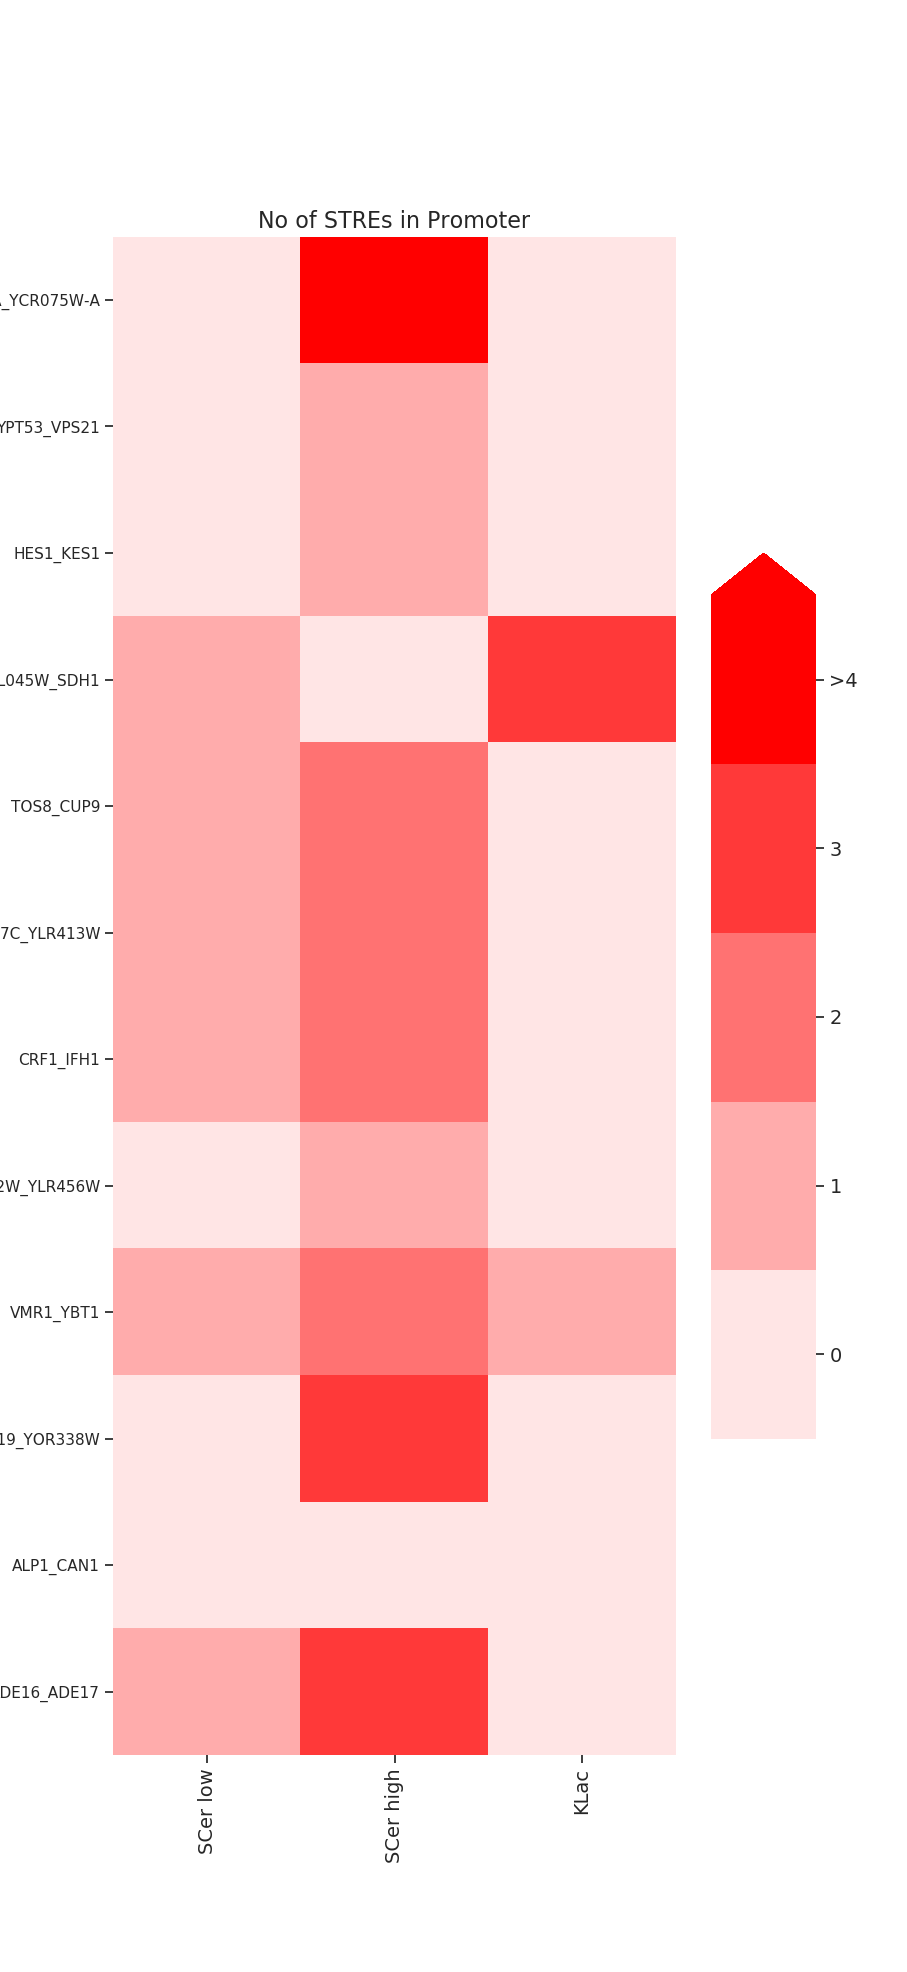

Text(0.5,1,'No of STREs in Promoter')

In [139]:
motif = 'STRE'
columns_to_show = ['Scer_' + motif + '_count_low', 'Scer_' + motif + '_count_high', 'Klac_' + motif + '_count']

ohnologs_goi_prom_counts_sorted = ohnologs_goi_prom_counts.loc[ohnologs_goi_prom_counts['sc_genename_high'].isin(msn24_sets['M_25']), columns_to_show]

fig_STRE, ax_STRE = plt.subplots(figsize=(5,20))

vmax = 5
hmap_stre = sns.heatmap(ohnologs_goi_prom_counts_sorted, vmax = vmax, ax=ax_STRE, cmap=sns.light_palette("red",vmax), cbar_kws={'ticks':[val + 0.5 for val in range(vmax)],  'extend':'max', 'aspect':8}) #, 'ticklabels':[str(val) for val in range(vmax)] + ['>' + str(vmax)], 'yticklabels':['0', '1', '>1']})
cbar = fig_STRE.axes[1]
cbar.set_yticklabels([str(val) for val in range(vmax-1)] + ['>' + str(vmax-1)], fontdict={"fontsize":14})
ax_STRE.set_facecolor("grey")
ax_STRE.set_xticklabels(['SCer low', 'SCer high', 'KLac'], fontdict={"fontsize":14})
ax_STRE.set_ylabel('')
ax_STRE.set_title('No of STREs in Promoter',fontdict={"fontsize":16})
#fig_STRE.savefig(os.path.normpath('/home/heineike/scratch/SC_KL_STRE_all.svg'),bbox_inches='tight')

## Conservation of STREs

In [ ]:
#Make file of all promoters for selected species
#Make ortholog maps for DEPKA genes for those species
##??'Skud', 'Kafr','Knag','Ndai','Tbla','Tpha'

### Build prom_hits dataset
Only need to do once. 

In [90]:
# Post WGH
#Need to use subset of ohnologs_goi that is defined in y1000 routine.  

#Build promhits data for all genes, genes activated by PKA inhibition (S.Cer, K.Lac), DEpka + orthologs (could also do de stress)

L_prom = 700
output_format = 'full'
motif_dict = {'STRE': 'CCCCT', 'TATA': 'TATA[AT]A[AT][AG]', 'PDS': 'AGGGAT'} 
sequence_context = 2  


## Need to add S.Cer, 
#Torulaspora delbrueckii, Zygosaccharomyces bailii, Zygosaccharomyces rouxii, Zygotorulospora florentina, Metschnikowa hawaiiensis
#K.Lac, Kluyveromyces maxianus, Eremothecium gossypii,Candida albicans, Debaromyces hansenii
# Hanseniaspora Vineae, Cyberlindnera jadinii, Wickerhamomyces anomalus, Ascoidia rubescens,Komagatella pastoris

spec_order_post_WGH = ['Scer','Smik','Skud','Suva', 'Cgla', 'Kafr','Knag','Ndai','Ncas','Tbla','Tpha','Vpol']  #shoud add in 'Skud', 'Kafr','Knag','Ndai','Tbla','Tpha'
#spec_order_pre_WGH = ['Lwal','Lklu']  #Should add K.Lac.  others not in YGOB - might be able to get Calb promoters fairly easily

#spec order, level, level_sep
spec_sets = {'Post WGH low' : (spec_order_post_WGH, 'low','_'),
             'Post WGH high' : (spec_order_post_WGH, 'high','_')
             #'Pre WGH' : (spec_order_pre_WGH, '', '')
            }
#each PromHits object will have an average value, plot it in a barplot. 

prom_hits = {}
ancestor_to_genes = {}
for spec_set_name, (spec_set, level, level_sep) in spec_sets.items(): 
    ## make sure I use level and level_sep - otherwise could just have sc_genename_col as the thing to unpack

    prom_hits_subset= {}
    ancestor_to_genes_level= {}
    for spec in spec_set: 
        print(spec)
        #load all promoters for the species
        promoter_dir = data_processing_dir + os.path.normpath('promoter_phylogeny/promoter_sets/' + spec)
        all_promoters_fname = os.path.normpath(promoter_dir + '/all_promoters_' + str(L_prom) + '.fasta')
        all_promoters = SeqIO.to_dict(SeqIO.parse(all_promoters_fname, "fasta"))  

        prom_set_names = ['all','DEpka']
        SC_KL_abbrev = {'Scer':'SC', 'Klac':'KL'}
        if spec in {'Scer', 'Klac'}: 
            prom_set_names = prom_set_names + ['pka_inh']
            pkainh_act_genes = target_sets_dict[SC_KL_abbrev[spec]][0]['pkainh_act']

        #all promoters, pka_inhibition (SC,KL only), DEpka orthologs, build PromHits object

        #Identify genenames to extract
        prom_hits_spec_subset = {}
        for prom_set_name in prom_set_names: 
            print(prom_set_name)
            if prom_set_name=='all':
                gene_list = all_promoters.keys()#prom_hits_spec_level[prom_set_name]=io_library.exact_promoter_scan_from_fasta(all_promoters_fname, motif_dict, output_format = output_format, sequence_context = sequence_context, L_prom = L_prom) 
            elif prom_set_name=='pka_inh':
                gene_list = pkainh_act_genes
            elif prom_set_name=='DEpka':
                ## Might be better for pre WGH if everything referenced an Ancestor, but will go with SC low for now
                if level == '':
                    sc_genename_col = 'sc_genename_low'
                else: 
                    sc_genename_col = 'sc_genename_' + level

                gene_list = []
                ancestor_to_genes_spec_level = {}
                for (ind,(ancestor,sc_gene)) in ohnologs_goi.loc[:,['Ancestor', sc_genename_col]].iterrows():
                    if spec == 'Scer':
                        gene_list.append(sc_gene)
                        ancestor_to_genes_spec_level[ancestor]=sc_gene
                    else: 
                        #load ortholog mapping
                        orth_lookup = io_library.read_orth_lookup_table('Scer', spec + '-goi', data_processing_dir + os.sep + "ortholog_files_YGOB" + os.sep)

                        genes = orth_lookup[sc_gene]
                        if len(genes)==1: 
                            if genes[0]=='NONE':
                                print('No ortholog for ' + sc_gene + ' in ' + spec)
                                ancestor_to_genes_spec_level[ancestor]='NONE'
                            else: 
                                ancestor_to_genes_spec_level[ancestor]=genes[0]
                                gene_list.append(genes[0])
                        else:
                            print('More than one ortholog for ' + sc_gene + ' in ' + spec + ' : ' + ' '.join(genes))
                            ancestor_to_genes_spec_level[ancestor]=genes
                            gene_list=gene_list + genes
                ancestor_to_genes_level[spec] = ancestor_to_genes_spec_level
            else: 
                raise ValueError('prom_set_name not included in cases : ' + prom_set_name)
            #all promoters, and pkainh_act set 
            #gene_list = ['Smik_9.31', 'Smik_15.548', 'Smik_2.295', 'Smik_6.trna311M']

            #Get promoter counts 
            prom_hits_spec_subset[prom_set_name] = io_library.exact_promoter_scan_genelist_dict(gene_list, all_promoters, motif_dict, output_format = output_format, sequence_context = sequence_context, L_prom = L_prom)
        prom_hits_subset[spec] = prom_hits_spec_subset
    prom_hits[spec_set_name]=prom_hits_subset
    ancestor_to_genes[spec_set_name]=ancestor_to_genes_level
     


Importing io_library.  If autoreload, may need to reset base_dir and data_processing dir 
  io_library.base_dir=base_dir 
 io_library.data_processing_dir = data_processing_dir
Scer
all
DEpka
pka_inh
Smik
all
DEpka
No ortholog for YGR256W in Smik
No ortholog for YMR271C in Smik
Skud
all
DEpka
No ortholog for YHR096C in Skud
Suva
all
DEpka
Cgla
all
DEpka
No ortholog for YJL164C in Cgla
No ortholog for YNL014W in Cgla
No ortholog for YEL039C in Cgla
No ortholog for YNL093W in Cgla
No ortholog for YIL113W in Cgla
No ortholog for YDL085W in Cgla
No ortholog for YLR031W in Cgla
No ortholog for YDR018C in Cgla
No ortholog for YDR034W-B in Cgla
No ortholog for YBR117C in Cgla
No ortholog for YER039C in Cgla
No ortholog for YGL229C in Cgla
No ortholog for YGR256W in Cgla
No ortholog for YGR248W in Cgla
No ortholog for YHR097C in Cgla
No ortholog for YOR185C in Cgla
No ortholog for YPL240C in Cgla
No ortholog for YIL066C in Cgla
No ortholog for YER096W in Cgla
No ortholog for YDR085C in Cgla
No 

DEpka
No ortholog for YNL052W in Ndai
No ortholog for YBR056W-A in Ndai
No ortholog for YBR082C in Ndai
No ortholog for YPR157W in Ndai
No ortholog for YLL048C in Ndai
No ortholog for YGR035C in Ndai
No ortholog for YLR043C in Ndai
No ortholog for YHR092C in Ndai
No ortholog for YHR108W in Ndai
No ortholog for YLR293C in Ndai
No ortholog for YOR375C in Ndai
No ortholog for YOL036W in Ndai
No ortholog for YFL048C in Ndai
Ncas
all
DEpka
No ortholog for YNL052W in Ncas
No ortholog for YBR082C in Ncas
No ortholog for YLL048C in Ncas
No ortholog for YLR043C in Ncas
No ortholog for YGR169C-A in Ncas
No ortholog for YHR092C in Ncas
No ortholog for YHR108W in Ncas
No ortholog for YLR293C in Ncas
No ortholog for YOR375C in Ncas
No ortholog for YFL048C in Ncas
Tbla
all
DEpka
No ortholog for YDR524C-B in Tbla
No ortholog for YEL063C in Tbla
No ortholog for YJL159W in Tbla
No ortholog for YOL016C in Tbla
No ortholog for YLR249W in Tbla
No ortholog for YJR054W in Tbla
No ortholog for YOR089C in Tbl

In [361]:
# spec = 'Scer'
# promoter_dir = data_processing_dir + os.path.normpath('promoter_phylogeny/promoter_sets/' + spec)
# all_promoters_fname = os.path.normpath(promoter_dir + '/all_promoters_' + str(L_prom) + '.fasta')
# all_promoters = SeqIO.to_dict(SeqIO.parse(all_promoters_fname, "fasta")) 

# gene_list = all_promoters.keys()

# io_library.exact_promoter_scan_genelist_dict(gene_list, all_promoters, motif_dict, output_format = output_format, sequence_context = sequence_context, L_prom = L_prom)

In [91]:
#This data is from y1000plus_tools/20190509_depka_promoter_enrichment.ipynb
#GOIs are filtered in that routine in order to only include those which have orthologs in the pre WGH species, 
#and which do not have too many duplicates. 
prom_hits_pre_WGH_fname = data_processing_dir + os.path.normpath('promoter_phylogeny/promoter_sets/prom_hits_pre_WGH.pkl')
with open(prom_hits_pre_WGH_fname, 'rb') as f:
    (prom_hits_pre_WGH, chosen_orths, goi_pre_WGH_orths_lhfilt, specs_ordered_fig2) = pickle.load(f)
    
prom_hits['Pre WGH'] = prom_hits_pre_WGH


In [92]:
#Save all prom_hits data and ancestor_to_genes data
prom_hits_fname = data_processing_dir + os.path.normpath('promoter_phylogeny/promoter_sets/prom_hits.pkl')
with open(prom_hits_fname, 'wb') as f: 
    pickle.dump((prom_hits, ancestor_to_genes), f)
   

### Load prom_hits data, visualize STRE conservation

In [6]:
# Load pre_WGH data and metadata:
prom_hits_pre_WGH_fname = data_processing_dir + os.path.normpath('promoter_phylogeny/promoter_sets/prom_hits_pre_WGH.pkl')
with open(prom_hits_pre_WGH_fname, 'rb') as f:
    (prom_hits_pre_WGH, chosen_orths, goi_pre_WGH_orths_lhfilt, specs_ordered_fig2) = pickle.load(f)

#Load prom_hits data
prom_hits_fname = data_processing_dir + os.path.normpath('promoter_phylogeny/promoter_sets/prom_hits.pkl')
with open(prom_hits_fname, 'rb') as f: 
    prom_hits, ancestor_to_genes = pickle.load(f)
    
prom_hits['Pre WGH'] = prom_hits_pre_WGH

In [7]:
# This is not used L_prom = 700
output_format = 'full'
motif_dict = {'STRE': ('CCCCT',700), 'TATA': ('TATA[AT]A[AT][AG]',300), 'PDS': ('AGGGAT',700)} 
ranges = {'STRE': motif_dict['STRE'][1], 'TATA': motif_dict['TATA'][1]}
sequence_context = 2  

#Given prom_hits, gets motif calcs
spec_order_post_WGH = ['Scer','Smik','Skud','Suva', 'Cgla', 'Kafr','Knag','Ndai','Ncas','Tbla','Tpha','Vpol']
spec_order_pre_WGH = specs_ordered_fig2[1:]
# ['Torulaspora_delbrueckii',
#  'Zygosaccharomyces_bailii',
#  'Zygosaccharomyces_rouxii',
#  'Zygotorulaspora_florentina',
#  'Metschnikowia_hawaiiensis',
#  'Kluyveromyces_lactis',
#  'Kluyveromyces_marxianus',
#  'Eremothecium_gossypii',
#  'Debaryomyces_hansenii',
#  'Hanseniaspora_vineae',
#  'Cyberlindnera_jadinii',
#  'Wickerhamomyces_anomalus',
#  'Ascoidea_rubescens',
#  'Komagataella_pastoris']

spec_sets = [('Post WGH low', spec_order_post_WGH), 
             ('Post WGH high', spec_order_post_WGH), 
             ('Pre WGH', spec_order_pre_WGH)]

gene_groups = ['all','DEpka']


#Can I extract a subset of DEpka genes here to only include those for which Scer high has an STRE? 

motif_calcs = {}
for spec_set, spec_list in spec_sets:
    print(spec_set)
    motif_calcs[spec_set] = {}
    for spec in spec_list: 
        print(spec)
        motif_calcs[spec_set][spec] = {}
        for gene_group in gene_groups:
            prom_hits_data = prom_hits[spec_set][spec][gene_group]
            if (spec_set == 'Pre WGH') & (gene_group =='DEpka'):
                prom_hits_data_subset = prom_hits_data.loc[set(chosen_orths[spec])-{'NONE'},:]
            else: 
                prom_hits_data_subset = prom_hits_data

            motif_calcs[spec_set][spec][gene_group] = io_library.PromHits(prom_hits_data_subset,motif_dict, prefix = '')
            motif_calcs[spec_set][spec][gene_group].STRE_TATA_combined(ranges)

            


Post WGH low
Scer
Smik
Skud
Suva
Cgla
Kafr
Knag
Ndai
Ncas
Tbla
Tpha
Vpol
Post WGH high
Scer
Smik
Skud
Suva
Cgla
Kafr
Knag
Ndai
Ncas
Tbla
Tpha
Vpol
Pre WGH
Zygosaccharomyces_rouxii
Zygosaccharomyces_kombuchaensis
Zygosaccharomyces_bailii
Zygosaccharomyces_bisporus
Zygotorulaspora_mrakii
Zygotorulaspora_florentina
Torulaspora_microellipsoides
Torulaspora_maleeae
Torulaspora_delbrueckii
Torulaspora_pretoriensis
Torulaspora_franciscae
Kluyveromyces_aestuarii
Kluyveromyces_marxianus
Kluyveromyces_dobzhanskii
Kluyveromyces_lactis
Eremothecium_sinecaudum
Eremothecium_coryli
Eremothecium_cymbalariae
Ashbya_aceri
Eremothecium_gossypii
Lachancea_kluyveri
Lachancea_cidri
Lachancea_fermentati
Lachancea_mirantina
Lachancea_waltii
Lachancea_thermotolerans
Lachancea_quebecensis
Lachancea_nothofagi
Lachancea_dasiensis
Lachancea_meyersii
Lachancea_lanzarotensis
Lachancea_fantastica_nom_nud
Hanseniaspora_vineae
Hanseniaspora_osmophila
Wickerhamomyces_anomalus
Cyberlindnera_jadinii
Ascoidea_rubescens
Kom

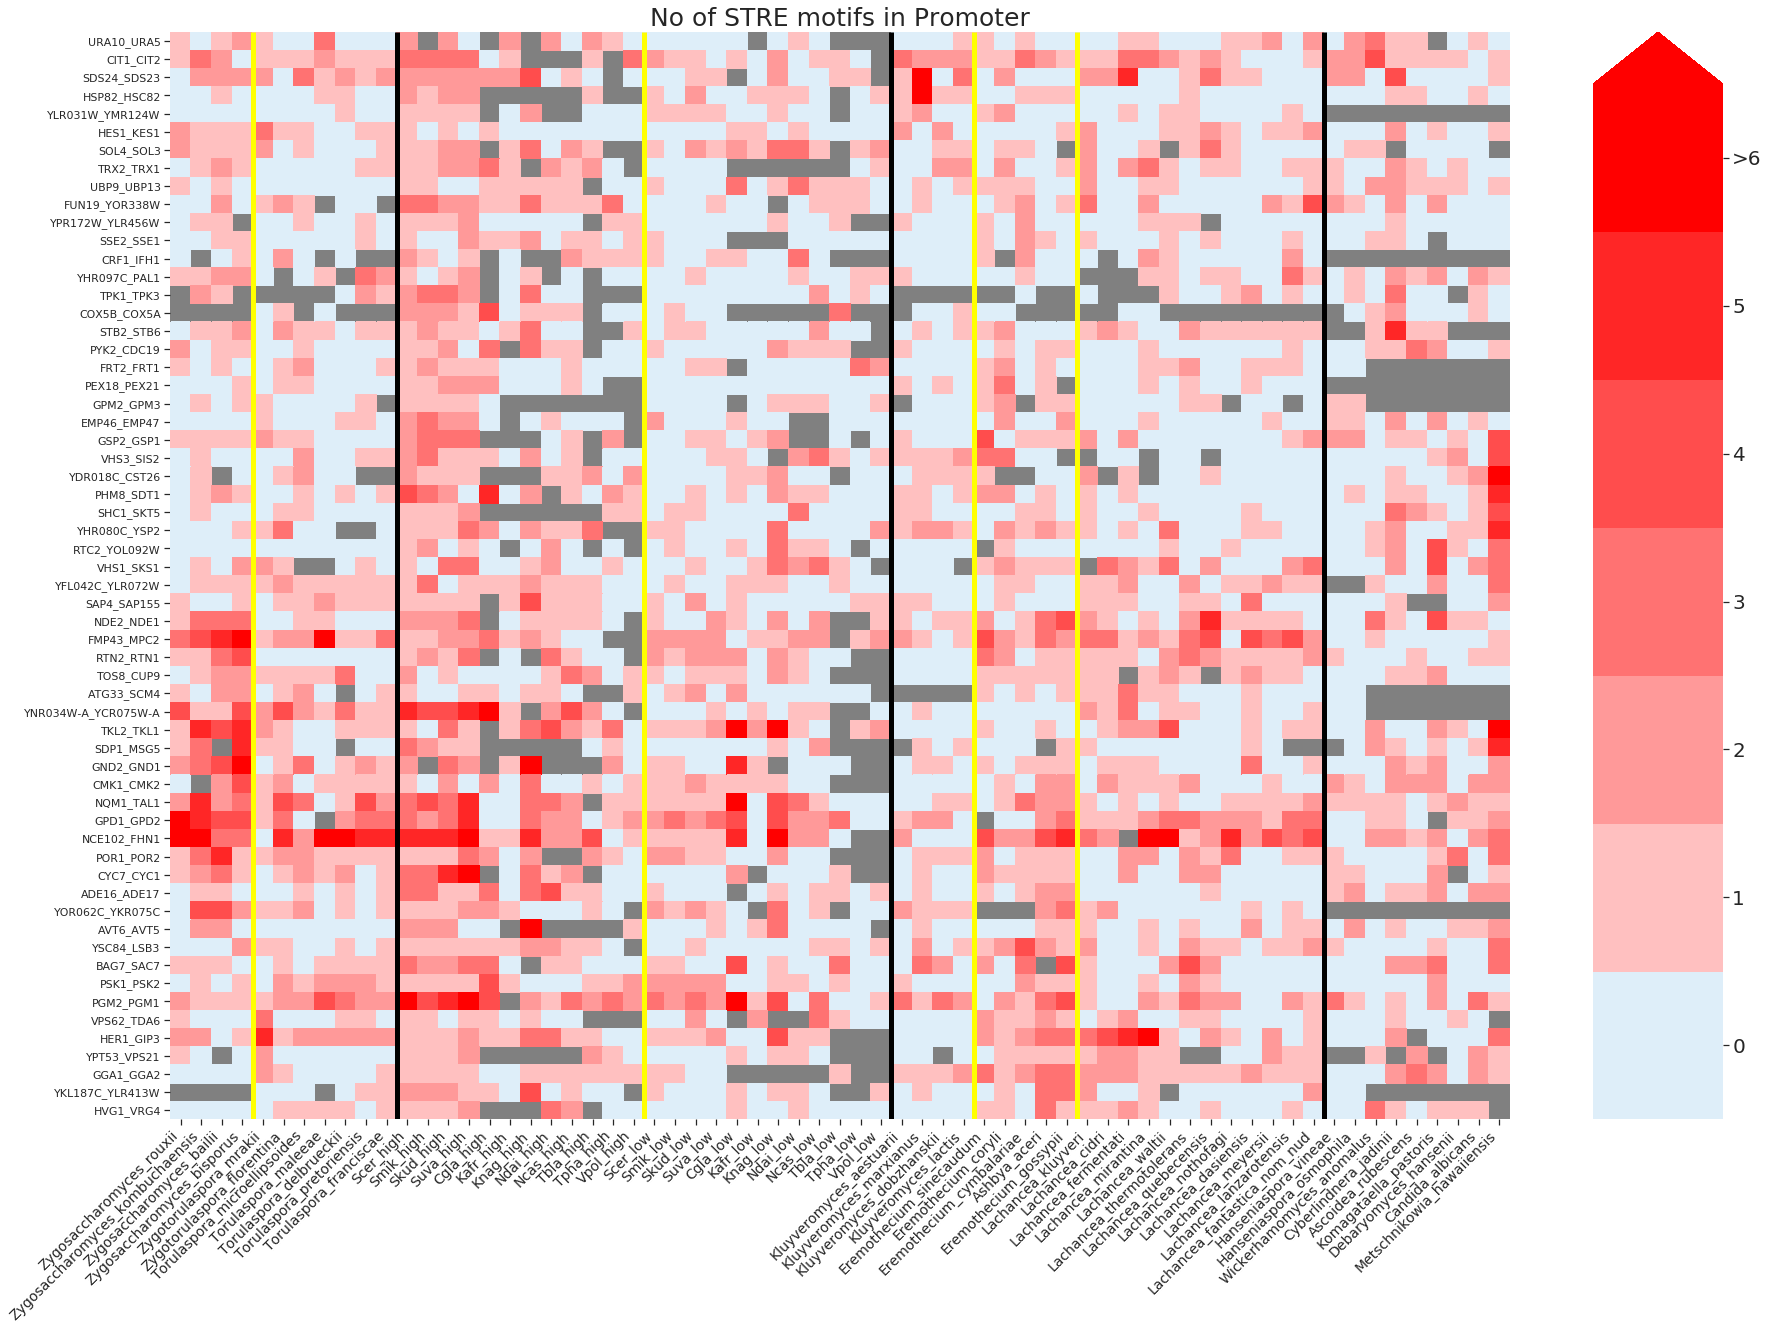

In [9]:
#visualize number of motif binding sites across ohnologs
#This makes the goi_counts dataframe
#need to have ohnologs_goi loaded

motif_name = 'STRE'

spec_sets_post_WGH = [('Post WGH high', 'high'),
             ('Post WGH low', 'low')]

#spec_order_post_WGH = ['Scer','Smik','Skud','Suva', 'Cgla', 'Kafr','Knag','Ndai','Ncas','Tbla','Tpha','Vpol']

goi_counts_post_WGH = pd.DataFrame(index=ohnologs_goi['Ancestor'])

for spec_set_name, level in spec_sets_post_WGH: 

    for spec in spec_order_post_WGH:
        #add column with genenames for the species
        ancestor_to_genes_spec = ancestor_to_genes[spec_set_name][spec]
        spec_genenames = []
        for anc in goi_counts_post_WGH.index:
            spec_genenames.append(ancestor_to_genes_spec[anc])
        goi_counts_post_WGH[spec + '_genename_' + level] = spec_genenames

        prom_data = motif_calcs[spec_set_name][spec]['DEpka'].prom_counts
        col_to_merge = prom_data.loc[:,[motif_name+'_count']]
        col_to_merge.rename(columns={motif_name+'_count':spec+'_'+motif_name +'_count_' + level}, inplace=True)
        goi_counts_post_WGH = goi_counts_post_WGH.merge(col_to_merge, left_on=spec+'_genename_'+level, right_index=True, how = 'left')


#pre_wgh genes
spec_set_name = 'Pre WGH'

spec_order_pre_WGH = specs_ordered_fig2[1:]

goi_counts_pre_WGH = goi_pre_WGH_orths_lhfilt.loc[:,['Ancestor']]
for spec, genenames in chosen_orths.items():
    goi_counts_pre_WGH[spec + '_genename'] = genenames
    prom_data = motif_calcs[spec_set_name][spec]['DEpka'].prom_counts
    counts_column = prom_data.loc[:,[motif_name+'_count']].rename(columns={motif_name+'_count':spec + '_' + motif_name + '_count'})
    goi_counts_pre_WGH = goi_counts_pre_WGH.merge(counts_column, how='left', left_on=spec+'_genename', right_index=True)

    
goi_counts = goi_counts_pre_WGH.merge(goi_counts_post_WGH, how='left', left_on='Ancestor', right_index=True)

#Subset on promoters with at least one STRE in Scer high
#goi_counts_subset = goi_counts
goi_counts_subset = goi_counts[goi_counts['Scer_STRE_count_high']>0]

## Put dataframe in order to visualize as heatmap

# spec_order_ZT = ['Zygosaccharomyces_rouxii',
#  'Zygosaccharomyces_kombuchaensis',
#  'Zygosaccharomyces_bailii',
#  'Zygosaccharomyces_bisporus',
#  'Zygotorulaspora_mrakii',
#  'Zygotorulaspora_florentina',
#  'Torulaspora_microellipsoides',
#  'Torulaspora_maleeae',
#  'Torulaspora_delbrueckii',
#  'Torulaspora_pretoriensis',
#  'Torulaspora_franciscae']
 
# spec_order_KLE = ['Kluyveromyces_aestuarii',
#  'Kluyveromyces_marxianus',
#  'Kluyveromyces_dobzhanskii',
#  'Kluyveromyces_lactis',
#  'Eremothecium_sinecaudum',
#  'Eremothecium_coryli',
#  'Eremothecium_cymbalariae',
#  'Ashbya_aceri',
#  'Eremothecium_gossypii',
#  'Lachancea_kluyveri',
#  'Lachancea_cidri',
#  'Lachancea_fermentati',
#  'Lachancea_mirantina',
#  'Lachancea_waltii',
#  'Lachancea_thermotolerans',
#  'Lachancea_quebecensis',
#  'Lachancea_nothofagi',
#  'Lachancea_dasiensis',
#  'Lachancea_meyersii',
#  'Lachancea_lanzarotensis',
#  'Lachancea_fantastica_nom_nud']

# spec_order_outgroups = ['Hanseniaspora_vineae',
#  'Hanseniaspora_osmophila',
#  'Wickerhamomyces_anomalus',
#  'Cyberlindnera_jadinii',
#  'Ascoidea_rubescens',
#  'Komagataella_pastoris',
#  'Debaryomyces_hansenii',
#  'Candida_albicans',
#  'Metschnikowia_hawaiiensis']


spec_sets = [('ZT','Pre WGH', spec_order_ZT, ''),
             ('low','Post WGH high', spec_order_post_WGH, '_high'), 
             ('high','Post WGH low', spec_order_post_WGH, '_low'),  
             ('KLE_og','Pre WGH', spec_order_KLE + spec_order_outgroups, '')]



#Make labels for each species 
columns_to_show = []
label_order = []
for spec_set_name, pre_post_WGH, spec_set, level_suffix in spec_sets:
    for spec in spec_set:     
        columns_to_show.append(spec + '_' + motif_name + '_count' + level_suffix)
        label_order.append(spec + level_suffix)


goi_counts_only = goi_counts_subset.loc[:, columns_to_show]
        
#Select columns to use to cluster -only ZT and KLE branch
columns_for_cluster = []
for spec_set_name, pre_post_WGH, spec_set, level_suffix in [spec_sets[0], spec_sets[3]]:
    for spec in spec_set:     
        columns_for_cluster.append(spec + '_' + motif_name + '_count' + level_suffix)

goi_counts_to_cluster = goi_counts_subset.loc[:, columns_for_cluster]

#Performs heirarchical clustering on row data

dm = spd.pdist(goi_counts_to_cluster.values, metric = io_library.correlation_nan_filt)
row_cluster = sch.linkage(dm, method='average', optimal_ordering=True)    #might also try 'centroid', 'median', and 'ward'

row_ind_reorder = sch.leaves_list(row_cluster)

old_rows = goi_counts_only.index.tolist()
new_rows = [old_rows[ind] for ind in row_ind_reorder]

goi_counts_clustered = goi_counts_only.reindex(new_rows)


fig_STRE, ax_STRE = plt.subplots(figsize=(30,20))
#separate out pre/post WGH and post WGH high/low with yellow lines
#Make big lines for all major group breaks


black_lines = []
yellow_lines = []
black_lines_set = {'Vpol_low', 'Torulaspora_franciscae','Lachancea_fantastica_nom_nud'}
yellow_lines_set = {'Vpol_high','Zygosaccharomyces_bisporus', 'Kluyveromyces_lactis', 'Eremothecium_gossypii'}

for jj,label in enumerate(label_order):
    if label in black_lines_set:
        black_lines.append(jj+1)
    elif label in yellow_lines_set:
        yellow_lines.append(jj+1)

#SEt colormap, make 0 light blue
vmax = 7
cmap = sns.light_palette("red",vmax)
cmap[0] = np.array([222.0/255.0, 238.0/255.0, 249/255.0, 1.0 ])  #Make the 0 color light blue

sns.heatmap(goi_counts_clustered, vmax = vmax, ax=ax_STRE, cmap=cmap, cbar_kws={'ticks':[val + 0.5 for val in range(vmax)],  'extend':'max', 'aspect':8})  
cbar = fig_STRE.axes[1]
cbar.set_yticklabels([str(val) for val in range(vmax-1)] + ['>' + str(vmax-1)], fontdict={"fontsize":20})
ax_STRE.set_facecolor("grey")
ax_STRE.set_xticklabels(label_order, fontdict={"fontsize":14}, rotation =45, ha='right')
ax_STRE.set_ylabel('')
ax_STRE.set_title('No of ' + motif_name + ' motifs in Promoter',fontdict={"fontsize":25})
ax_STRE.vlines(black_lines, ymin = 0, ymax = len(goi_counts_only), colors = 'black',linewidth=5)
ax_STRE.vlines(yellow_lines, ymin = 0, ymax = len(goi_counts_only), colors = 'yellow',linewidth=5)

#fig_STRE.savefig(os.path.normpath('/home/heineike/scratch/' + motif_name + '_conservation_all.svg'),bbox_inches='tight')

   

   

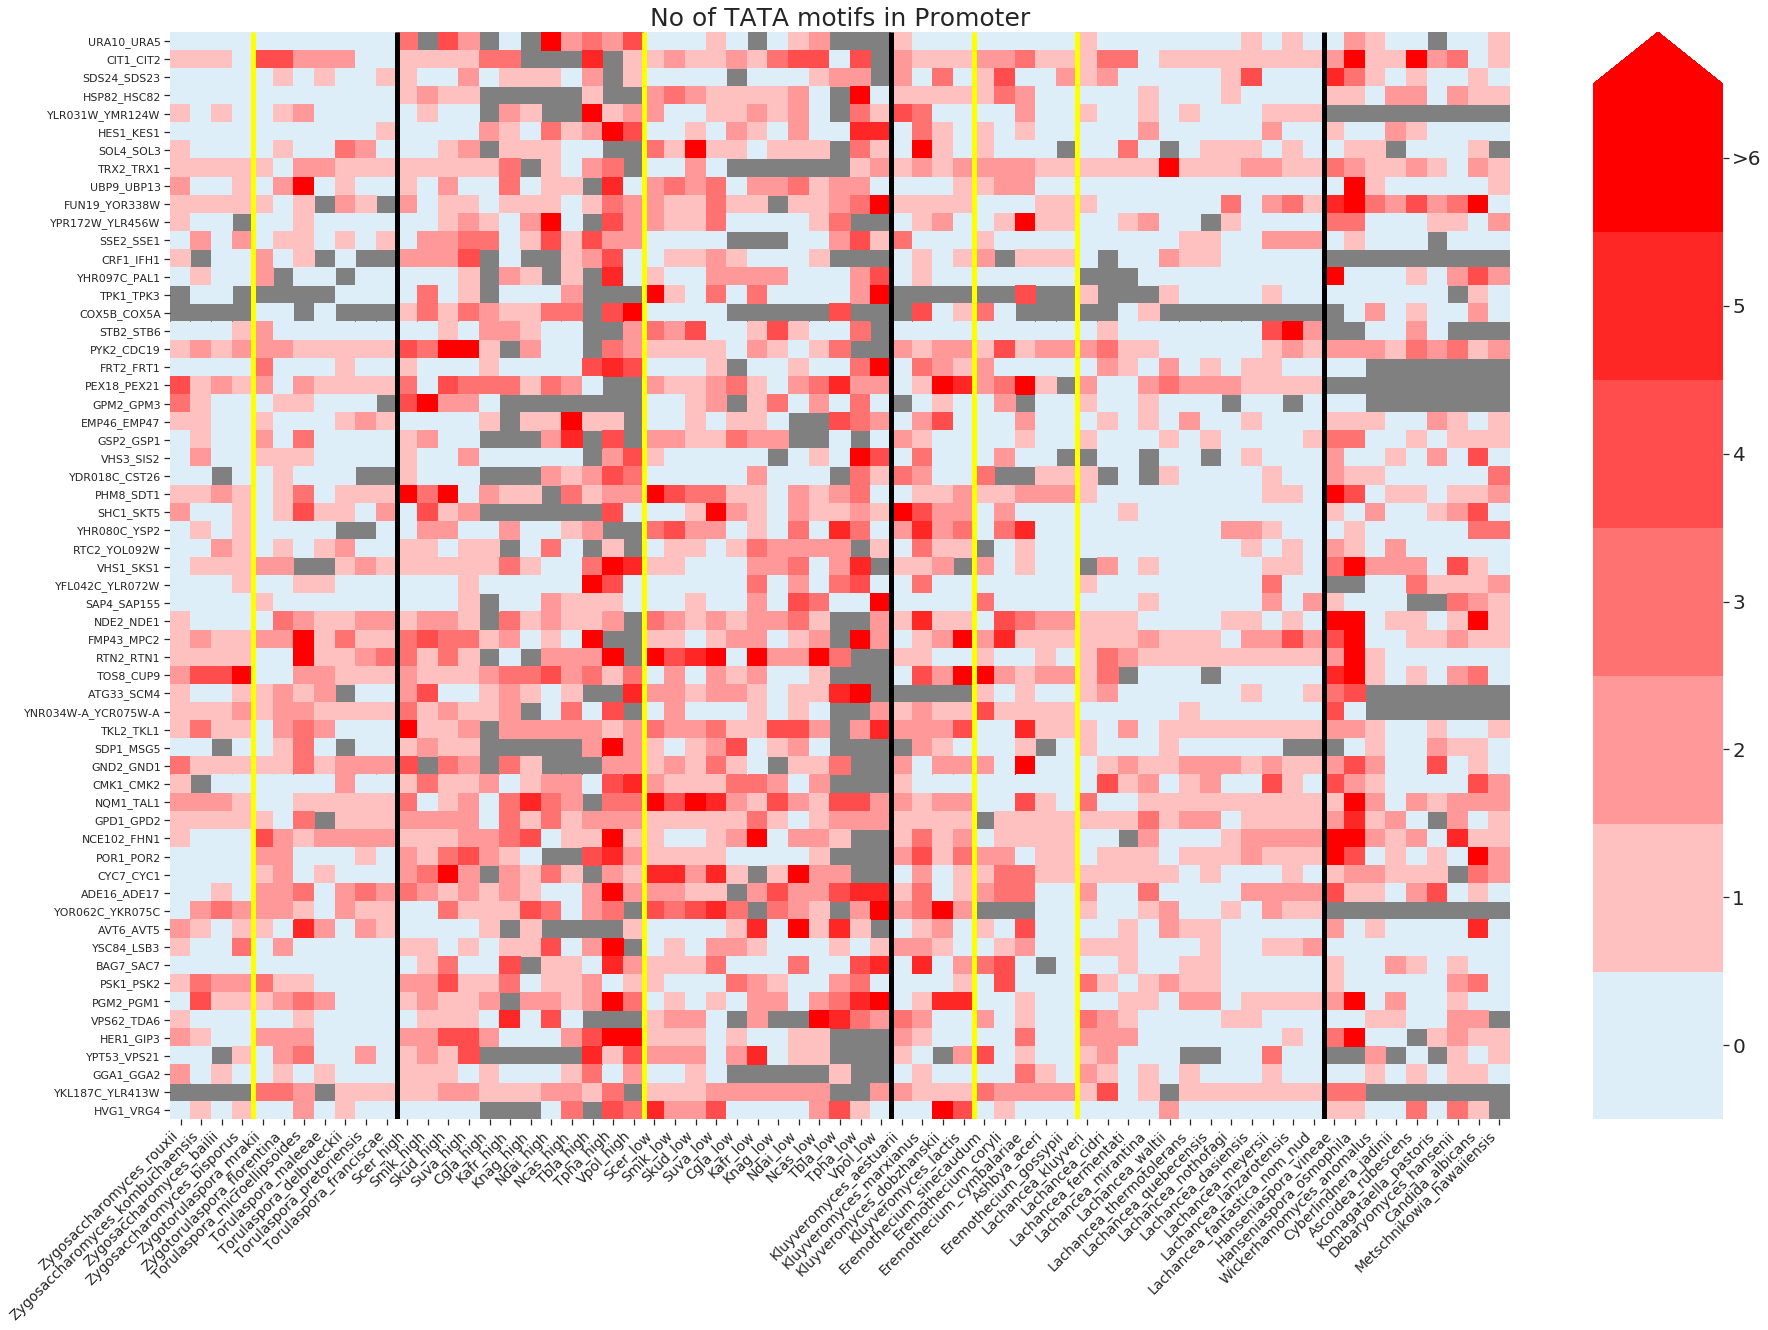

In [283]:
#Using the same column ordering as above, visualize number of TATA boxes (using the same range) 

motif_name = 'TATA'

spec_sets_post_WGH = [('Post WGH high', 'high'),
             ('Post WGH low', 'low')]

#spec_order_post_WGH = ['Scer','Smik','Skud','Suva', 'Cgla', 'Kafr','Knag','Ndai','Ncas','Tbla','Tpha','Vpol']

goi_counts_post_WGH = pd.DataFrame(index=ohnologs_goi['Ancestor'])

for spec_set_name, level in spec_sets_post_WGH: 

    for spec in spec_order_post_WGH:
        #add column with genenames for the species
        ancestor_to_genes_spec = ancestor_to_genes[spec_set_name][spec]
        spec_genenames = []
        for anc in goi_counts_post_WGH.index:
            spec_genenames.append(ancestor_to_genes_spec[anc])
        goi_counts_post_WGH[spec + '_genename_' + level] = spec_genenames

        prom_data = motif_calcs[spec_set_name][spec]['DEpka'].prom_counts
        col_to_merge = prom_data.loc[:,[motif_name+'_count']]
        col_to_merge.rename(columns={motif_name+'_count':spec+'_'+motif_name +'_count_' + level}, inplace=True)
        goi_counts_post_WGH = goi_counts_post_WGH.merge(col_to_merge, left_on=spec+'_genename_'+level, right_index=True, how = 'left')


#pre_wgh genes
spec_set_name = 'Pre WGH'

spec_order_pre_WGH = specs_ordered_fig2[1:]

goi_counts_pre_WGH = goi_pre_WGH_orths_lhfilt.loc[:,['Ancestor']]
for spec, genenames in chosen_orths.items():
    goi_counts_pre_WGH[spec + '_genename'] = genenames
    prom_data = motif_calcs[spec_set_name][spec]['DEpka'].prom_counts
    counts_column = prom_data.loc[:,[motif_name+'_count']].rename(columns={motif_name+'_count':spec + '_' + motif_name + '_count'})
    goi_counts_pre_WGH = goi_counts_pre_WGH.merge(counts_column, how='left', left_on=spec+'_genename', right_index=True)

    
goi_counts = goi_counts_pre_WGH.merge(goi_counts_post_WGH, how='left', left_on='Ancestor', right_index=True)

#Subset on promoters with at least one STRE in Scer high
#goi_counts_subset = goi_counts
goi_counts_subset = goi_counts.loc[goi_counts_clustered.index,:]

spec_sets = [('ZT','Pre WGH', spec_order_ZT, ''),
             ('low','Post WGH high', spec_order_post_WGH, '_high'), 
             ('high','Post WGH low', spec_order_post_WGH, '_low'),  
             ('KLE_og','Pre WGH', spec_order_KLE + spec_order_outgroups, '')]



#Extract Columns to show and make labels for each species 
columns_to_show = []
label_order = []
for spec_set_name, pre_post_WGH, spec_set, level_suffix in spec_sets:
    for spec in spec_set:     
        columns_to_show.append(spec + '_' + motif_name + '_count' + level_suffix)
        label_order.append(spec + level_suffix)


goi_counts_only = goi_counts_subset.loc[:, columns_to_show]
        
fig_TATA, ax_TATA = plt.subplots(figsize=(30,20))
#separate out pre/post WGH and post WGH high/low with yellow lines
#Make big lines for all major group breaks

black_lines = []
yellow_lines = []
black_lines_set = {'Vpol_low', 'Torulaspora_franciscae','Lachancea_fantastica_nom_nud'}
yellow_lines_set = {'Vpol_high','Zygosaccharomyces_bisporus', 'Kluyveromyces_lactis', 'Eremothecium_gossypii'}

for jj,label in enumerate(label_order):
    if label in black_lines_set:
        black_lines.append(jj+1)
    elif label in yellow_lines_set:
        yellow_lines.append(jj+1)

#SEt colormap, make 0 light blue
vmax = 7
cmap = sns.light_palette("red",vmax)
cmap[0] = np.array([222.0/255.0, 238.0/255.0, 249/255.0, 1.0 ])  #Make the 0 color light blue

sns.heatmap(goi_counts_only, vmax = vmax, ax=ax_TATA, cmap=cmap, cbar_kws={'ticks':[val + 0.5 for val in range(vmax)],  'extend':'max', 'aspect':8})  
cbar = fig_TATA.axes[1]
cbar.set_yticklabels([str(val) for val in range(vmax-1)] + ['>' + str(vmax-1)], fontdict={"fontsize":20})
ax_TATA.set_facecolor("grey")
ax_TATA.set_xticklabels(label_order, fontdict={"fontsize":14}, rotation =45, ha='right')
ax_TATA.set_ylabel('')
ax_TATA.set_title('No of ' + motif_name + ' motifs in Promoter',fontdict={"fontsize":25})
ax_TATA.vlines(black_lines, ymin = 0, ymax = len(goi_counts_only), colors = 'black',linewidth=5)
ax_TATA.vlines(yellow_lines, ymin = 0, ymax = len(goi_counts_only), colors = 'yellow',linewidth=5)

#fig_STRE.savefig(os.path.normpath('/home/heineike/scratch/' + motif_name + '_conservation_all.svg'),bbox_inches='tight')

   

   

In [234]:
# Adds a column with counts of both STRE and TATA
goi_counts_STRE_TATA_post_WGH = pd.DataFrame(index=ohnologs_goi['Ancestor'])

spec_set_name = 'Post WGH high'
level = 'high'
spec = 'Ncas'

#add column with genenames for the species
ancestor_to_genes_spec = ancestor_to_genes[spec_set_name][spec]
spec_genenames = []
for anc in goi_counts_post_WGH.index:
    spec_genenames.append(ancestor_to_genes_spec[anc])
goi_counts_post_WGH[spec + '_genename_' + level] = spec_genenames
goi_counts_STRE_TATA_post_WGH[spec + '_genename_' + level] = spec_genenames

prom_data = motif_calcs[spec_set_name][spec]['DEpka'].prom_counts
# col_to_merge = prom_data.loc[:,[motif_name+'_count']]
# col_to_merge.rename(columns={motif_name+'_count':spec+'_'+motif_name +'_count_' + level}, inplace=True)
# goi_counts_post_WGH = goi_counts_post_WGH.merge(col_to_merge, left_on=spec+'_genename_'+level, right_index=True, how = 'left')
# goi_counts_STRE_TATA_post_WGH 


col_to_merge_STRE_TATA = pd.DataFrame(index = prom_data.index)
col_to_merge_STRE_TATA['TATA_300']=0
col_to_merge_STRE_TATA.loc[motif_calcs[spec_set_name][spec]['DEpka']['STRE_TATA_hits'],'TATA_300']=1
goi_counts_STRE_TATA_post_WGH = goi_counts_STRE_TATA_post_WGH.merge(col_to_merge_STRE_TATA, left_on=spec+'_genename_'+level, right_index=True, how = 'left')



#motif_calcs[spec_set_name][spec]['DEpka']['STRE_TATA_hits']

In [ ]:
#Make counts of N TATA within 300bp (or just one)

#visualize number of motif binding sites across ohnologs
#need to have ohnologs_goi loaded

motif_name = 'STRE'

spec_sets_post_WGH = [('Post WGH high', 'high'),
             ('Post WGH low', 'low')]

#spec_order_post_WGH = ['Scer','Smik','Skud','Suva', 'Cgla', 'Kafr','Knag','Ndai','Ncas','Tbla','Tpha','Vpol']

goi_counts_post_WGH = pd.DataFrame(index=ohnologs_goi['Ancestor'])
goi_counts_STRE_TATA_post_WGH = pd.DataFrame(index=ohnologs_goi['Ancestor'])


for spec_set_name, level in spec_sets_post_WGH: 

    for spec in spec_order_post_WGH:
        #add column with genenames for the species
        ancestor_to_genes_spec = ancestor_to_genes[spec_set_name][spec]
        spec_genenames = []
        for anc in goi_counts_post_WGH.index:
            spec_genenames.append(ancestor_to_genes_spec[anc])
        goi_counts_post_WGH[spec + '_genename_' + level] = spec_genenames
        goi_counts_STRE_TATA_post_WGH[spec + '_genename_' + level] = spec_genenames
        
        prom_data = motif_calcs[spec_set_name][spec]['DEpka'].prom_counts
        
        col_to_merge = prom_data.loc[:,[motif_name+'_count']]
        col_to_merge.rename(columns={motif_name+'_count':spec+'_'+motif_name +'_count_' + level}, inplace=True)
        goi_counts_post_WGH = goi_counts_post_WGH.merge(col_to_merge, left_on=spec+'_genename_'+level, right_index=True, how = 'left')
        
        col_to_merge_STRE_TATA = pd.DataFrame(index = prom_data.index)
        col_to_merge_STRE_TATA['TATA_300']=0
        col_to_merge_STRE_TATA.loc[motif_calcs[spec_set_name][spec]['DEpka']['STRE_TATA_hits'],'TATA_300']=1
        goi_counts_STRE_TATA_post_WGH = goi_counts_STRE_TATA_post_WGH.merge(col_to_merge_STRE_TATA, left_on=spec+'_genename_'+level, right_index=True, how = 'left')


#pre_wgh genes
spec_set_name = 'Pre WGH'

spec_order_pre_WGH = specs_ordered_fig2[1:]

goi_counts_pre_WGH = goi_pre_WGH_orths_lhfilt.loc[:,['Ancestor']]
goi_counts_STRE_TATA_pre_WGH = goi_pre_WGH_orths_lhfilt.loc[:,['Ancestor']]
for spec, genenames in chosen_orths.items():
    goi_counts_pre_WGH[spec + '_genename'] = genenames
    goi_counts_STRE_TATA_pre_WGH[spec + '_genename'] = genenames
    prom_data = motif_calcs[spec_set_name][spec]['DEpka'].prom_counts
    counts_column = prom_data.loc[:,[motif_name+'_count']].rename(columns={motif_name+'_count':spec + '_' + motif_name + '_count'})
    goi_counts_pre_WGH = goi_counts_pre_WGH.merge(counts_column, how='left', left_on=spec+'_genename', right_index=True)

    counts_column_STRE_TATA
    counts_column_STRE_TATA = pd.DataFrame(index = prom_data.index)
    counts_column_STRE_TATA['TATA_300']=0
    counts_column_STRE_TATA.loc[motif_calcs[spec_set_name][spec]['DEpka']['STRE_TATA_hits'],'TATA_300']=1
    goi_counts_STRE_TATA_pre_WGH = goi_counts_STRE_TATA_pre_WGH.merge(counts_column_STRE_TATA, how='left', left_on=spec+'_genename', right_index=True)

    
    
goi_counts = goi_counts_pre_WGH.merge(goi_counts_post_WGH, how='left', left_on='Ancestor', right_index=True)

#Subset on promoters with at least one STRE in Scer high
goi_counts_subset = goi_counts[goi_counts['Scer_STRE_count_high']>0]




In [10]:
#motif_calcs for DEpka_subset
spec_sets_subset = [('Post WGH low', spec_order_post_WGH,'_low'), 
                    ('Post WGH high', spec_order_post_WGH,'_high'), 
                    ('Pre WGH', spec_order_pre_WGH,'')]

#shouldn't change this
gene_group = 'DEpka_subset_STRE' #'DEpka_subset_STRE_TATA'  #'DEpka_subset_STRE_TATA' #'DEpka'

goi_counts_subsets = {'DEpka_subset_STRE': goi_counts[goi_counts['Scer_STRE_count_high']>0],
                      'DEpka_subset_STRE_TATA': goi_counts[goi_counts['Scer_genename_high'].isin(motif_calcs['Post WGH high']['Scer']['DEpka']['STRE_TATA_hits'])]
                     }

goi_counts_subset = goi_counts_subsets[gene_group]

for spec_set, spec_list,suffix in spec_sets_subset:
    #motif_calcs[spec_set] = {}
    
    for spec in spec_list: 
        #motif_calcs[spec_set][spec] = {}
        DEpka_subset_genenames = list(set(goi_counts_subset[spec + '_genename'+suffix])-{'NONE'}) 
        prom_hits_data = prom_hits[spec_set][spec]['DEpka'].loc[DEpka_subset_genenames,:]
        motif_calcs[spec_set][spec][gene_group] = io_library.PromHits(prom_hits_data,motif_dict, prefix = '')
        motif_calcs[spec_set][spec][gene_group].STRE_TATA_combined(ranges)


In [13]:
#pvalue calculations

spec_sets = [('Post WGH low', spec_order_post_WGH), 
             ('Post WGH high', spec_order_post_WGH), 
             ('Pre WGH', spec_order_ZT + spec_order_KLE + spec_order_outgroups)]



motif_name = 'STRE'#'STRE_TATA' #_TATA'

pvals = {}


#could expand this to look at other motifs (should do TATA)
for spec_set_name, spec_order in spec_sets: #dict(spec_sets)['Pre WGH']: 
    pvals_subset = OrderedDict()
    for spec in spec_order: 
        #motif_calcs['Pre WGH'][spec]['all']['pct'][motif_name]
        all_motif = motif_calcs[spec_set_name][spec]['all']['hits'][motif_name]
        all_no_motif = motif_calcs[spec_set_name][spec]['all']['total']-all_motif
        pvals_subset_group ={}
        for gene_group in ['DEpka','DEpka_subset_STRE']:  #, 'DEpka_subset_STRE_TATA']:
            depka_motif =  motif_calcs[spec_set_name][spec][gene_group]['hits'][motif_name]
            depka_no_motif = motif_calcs[spec_set_name][spec][gene_group]['total']-depka_motif

            oddsratio, pvalue = stats.fisher_exact([[depka_motif, depka_no_motif], [all_motif-depka_motif, all_no_motif-depka_no_motif]])
            pvals_subset_group[gene_group]=pvalue
        pvals_subset[spec] = pvals_subset_group
    pvals[spec_set_name] = pvals_subset

In [81]:
spec_order_post_WGH = ['Scer','Smik','Skud','Suva', 'Cgla', 'Kafr','Knag','Ndai','Ncas','Tbla','Tpha','Vpol']

label_order_dict = {'Scer': 'Saccharomyces_cerevisiae', 
                    'Smik': 'Saccharomyces_mikatae',
                    'Suva': 'Saccharomyces_uvarum', 
                    'Skud': 'Saccharomyces_kudriavzevii',
                    'Cgla': 'Candida_glabrata', 
                    'Kafr': 'Kazachstania_africana',
                    'Knag': 'Kazachstania_naganishii',
                    'Ndai': 'Naumovozyma_dairenensis',
                    'Ncas': 'Naumovozyma_castellii',
                    'Tbla': 'Tetrapisispora_blattae',
                    'Tpha': 'Tetrapisispora_phaffii',
                    'Vpol': 'Vanderwaltozyma_polyspora'
                   }

#Species order for pre wgh species
spec_order_ZT = ['Zygosaccharomyces_rouxii',
 'Zygosaccharomyces_kombuchaensis',
 'Zygosaccharomyces_bailii',
 'Zygosaccharomyces_bisporus',
 'Zygotorulaspora_mrakii',
 'Zygotorulaspora_florentina',
 'Torulaspora_microellipsoides',
 'Torulaspora_maleeae',
 'Torulaspora_delbrueckii',
 'Torulaspora_pretoriensis',
 'Torulaspora_franciscae']
 
spec_order_KLE = ['Kluyveromyces_aestuarii',
 'Kluyveromyces_marxianus',
 'Kluyveromyces_dobzhanskii',
 'Kluyveromyces_lactis',
 'Eremothecium_sinecaudum',
 'Eremothecium_coryli',
 'Eremothecium_cymbalariae',
 'Ashbya_aceri',
 'Eremothecium_gossypii',
 'Lachancea_kluyveri',
 'Lachancea_cidri',
 'Lachancea_fermentati',
 'Lachancea_mirantina',
 'Lachancea_waltii',
 'Lachancea_thermotolerans',
 'Lachancea_quebecensis',
 'Lachancea_nothofagi',
 'Lachancea_dasiensis',
 'Lachancea_meyersii',
 'Lachancea_lanzarotensis',
 'Lachancea_fantastica_nom_nud']

spec_order_outgroups = ['Hanseniaspora_vineae',
 'Hanseniaspora_osmophila',
 'Wickerhamomyces_anomalus',
 'Cyberlindnera_jadinii',
 'Ascoidea_rubescens',
 'Komagataella_pastoris',
 'Debaryomyces_hansenii',
 'Candida_albicans',
 'Metschnikowia_hawaiiensis']

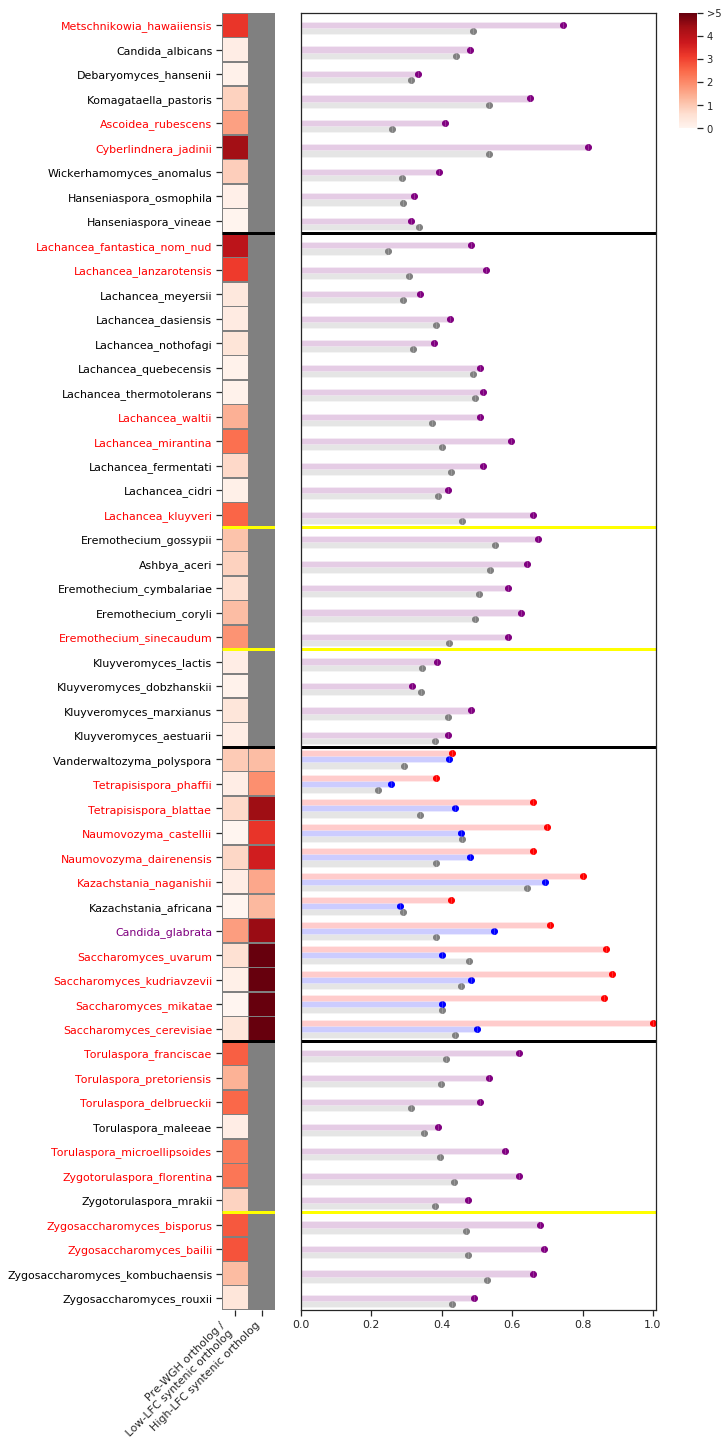

In [85]:
#Plot percentage of STREs in low and high as you go away from S.Cer

motif_name = 'STRE'# 'STRE_TATA'

fig_pct = plt.figure(constrained_layout=True, figsize=(10,20))
gs = fig_pct.add_gridspec(3,3, width_ratios=[3,20,1], height_ratios = [10,1,10] )
#fig_pct, axarr = plt.subplots(1,3, figsize=(10,20), gridspec_kw={'width_ratios': [1, 20,1]})
ax_hmap = fig_pct.add_subplot(gs[:,0])
ax_pct = fig_pct.add_subplot(gs[:,1])
ax_cbar = fig_pct.add_subplot(gs[1,2])
bw = 0.25
shift = -0.25
opacity = 0.2

#spec_order_pre_WGH = specs_ordered_fig2[1:]

# spec_sets = [('Post WGH low', spec_order_post_WGH), 
#              ('Post WGH high', spec_order_post_WGH), 
#              ('Pre WGH', spec_order_pre_WGH)]

#gene_groups = ['all','DEpka']

#(color, legend_label)
group_params = {'all':('grey','All genes in species'), 
                'low': ('blue','$DE_{PKA}$ low-induction syntenic orthologs'), 
                'high': ('red', '$DE_{PKA}$ high-induction syntenic orthologs'), 
                'Pre WGH':('purple', '$DE_{PKA}$ shared orthologs')
               }

index = {'all':[], 'low':[],'high':[], 'Pre WGH':[]}
data = {'all':[], 'low':[],'high':[], 'Pre WGH':[]}
label_order = []
label_color = []
pval_data = []
jj = 0

gene_group = 'DEpka_subset_STRE' #_STRE_TATA' #_subset'

#pre WGH Species
for spec in spec_order_ZT: #dict(spec_sets)['Pre WGH']: 
    label_order.append(spec) 
    pval_data.append((-np.log10(pvals['Pre WGH'][spec][gene_group]),np.nan))
    label_color_spec = 'black'
    if pvals['Pre WGH'][spec][gene_group]<0.05:
        label_color_spec = 'red'
    label_color.append(label_color_spec)
    index['all'].append(jj+shift)
    index['Pre WGH'].append(jj+shift+bw)
    data['all'].append(motif_calcs['Pre WGH'][spec]['all']['pct'][motif_name])
    data['Pre WGH'].append(motif_calcs['Pre WGH'][spec][gene_group]['pct'][motif_name])
    jj = jj+1

#Post WGH Species
#assumes the same species sets are in both
for spec in spec_order_post_WGH: 
    label_order.append(label_order_dict[spec]) 
    pval_data.append((-np.log10(pvals['Post WGH low'][spec][gene_group]),-np.log10(pvals['Post WGH high'][spec][gene_group])))
    label_color_spec = 'black'
    if pvals['Post WGH high'][spec][gene_group]<0.05:
        label_color_spec = 'red'
        if pvals['Post WGH low'][spec][gene_group]<0.05:
            label_color_spec = 'purple'
    label_color.append(label_color_spec)
    index['all'].append(jj+shift)
    index['low'].append(jj+shift+bw)
    index['high'].append(jj+shift + bw*2)
    data['all'].append(motif_calcs['Post WGH high'][spec]['all']['pct'][motif_name])
    data['low'].append(motif_calcs['Post WGH low'][spec][gene_group]['pct'][motif_name])
    data['high'].append(motif_calcs['Post WGH high'][spec][gene_group]['pct'][motif_name])    
    jj = jj+1

#pre WGH Species
for spec in (spec_order_KLE + spec_order_outgroups):#dict(spec_sets)['Pre WGH']: 
    label_order.append(spec)
    pval_data.append((-np.log10(pvals['Pre WGH'][spec][gene_group]),np.nan))
    label_color_spec = 'black'
    if pvals['Pre WGH'][spec][gene_group]<0.05:
        label_color_spec = 'red'
    label_color.append(label_color_spec)
    index['all'].append(jj+shift)
    index['Pre WGH'].append(jj+shift+bw)
    data['all'].append(motif_calcs['Pre WGH'][spec]['all']['pct'][motif_name])
    data['Pre WGH'].append(motif_calcs['Pre WGH'][spec][gene_group]['pct'][motif_name])
    jj = jj+1

    
for subset_name in ['all', 'low','high','Pre WGH']: 
    subset_data = data[subset_name]
    
    color, legend_label = group_params[subset_name]
                
    pct_plot = ax_pct.barh(index[subset_name],subset_data, bw,
                 alpha=opacity,
                 color=color,
                 label=legend_label) 
                 #bottom = bottom)
    
    ax_pct.scatter(subset_data,index[subset_name],marker='o',color=color)



    
black_lines = []
yellow_lines = []
black_lines_set = {'Vanderwaltozyma_polyspora','Torulaspora_franciscae','Lachancea_fantastica_nom_nud'}
yellow_lines_set = {'Zygosaccharomyces_bisporus', 'Kluyveromyces_lactis', 'Eremothecium_gossypii'}

for jj,label in enumerate(label_order):
    if label in black_lines_set:
        black_lines.append(jj +0.5)
    elif label in yellow_lines_set:
        yellow_lines.append(jj +0.5)
        
ax_pct.hlines(yellow_lines, xmin = 0, xmax = 1.01, colors = 'yellow',linewidth=3)
ax_pct.hlines(black_lines, xmin = 0, xmax = 1.01, colors = 'black',linewidth=3)
ax_pct.set_yticks([])
#ax_pct.set_yticklabels('') #label_order) #, rotation='45', ha='right')
#ax_pct.set_yticks(index['all'])
ax_pct.set_ylim(-0.5, len(index['all'])-0.5)
ax_pct.set_xlim(0,1.01)


pval_data.reverse()
label_order_reverse = label_order.copy()
label_order_reverse.reverse()
label_color_reverse = label_color.copy()
label_color_reverse.reverse()

pval_df = pd.DataFrame(pval_data, index = label_order_reverse)
vmax = 5.0
cmap = plt.get_cmap('Reds')
sns.heatmap(pval_df, ax = ax_hmap, vmin = 0, vmax = vmax, cmap=cmap, cbar_ax = ax_cbar, linewidths = 0.5, linecolor = 'grey') #, cbar_kws={'ticks':[val + 0.5 for val in range(vmax)],  'extend':'max', 'aspect':8})  
yellow_lines_rev = len(label_order) - 0.5 - np.array(yellow_lines)
black_lines_rev = len(label_order) - 0.5 - np.array(black_lines)
ax_hmap.hlines(yellow_lines_rev, xmin = 0, xmax = 2, colors = 'yellow',linewidth=3)
ax_hmap.hlines(black_lines_rev, xmin = 0, xmax = 2, colors = 'black',linewidth=3)
ax_hmap.set_facecolor('grey')
ax_hmap.set_xticklabels(['Pre-WGH ortholog /\n Low-LFC syntenic ortholog','High-LFC syntenic ortholog'],rotation='45', ha='right')
for (color, tick) in zip(label_color_reverse,ax_hmap.yaxis.get_ticklabels()):
    tick.set_color(color)


ax_cbar.set_yticklabels([str(val) for val in range(int(vmax))] + ['>' + str(int(vmax))], fontdict={"fontsize":10})


# if motif_name =='STRE_TATA':
#     ax_pct.set_ylabel('Pct promoters with >1 STRE in ' + str(ranges['STRE']) + 'bp and >1 TATA in ' + str(ranges['TATA']) + 'bp')
# else: 
#     ax_pct.set_ylabel('Pct promoters with 1 or more ' + motif_name)

# ax_pct.legend(loc = 'upper left', bbox_to_anchor = (1.0,1.0))

fig_pct.savefig(os.path.normpath('/home/heineike/scratch/' + motif_name + '_conservation_summary.svg'),bbox_inches='tight')

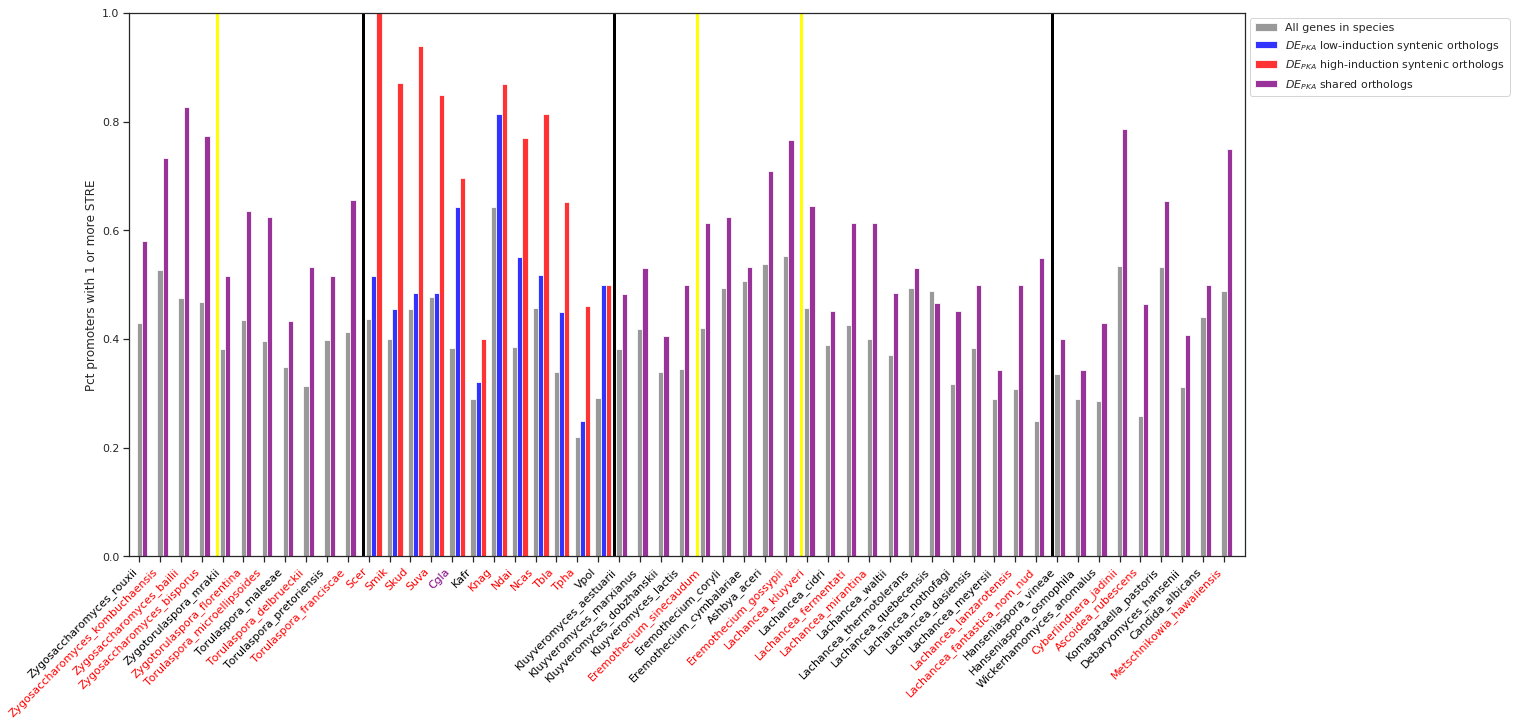

In [30]:
#Plot percentage of STREs in low and high as you go away from S.Cer

motif_name = 'STRE'# 'STRE_TATA'

fig_pct, ax_pct = plt.subplots(1,1, figsize=(20,10))
bw = 0.25
opacity = 0.8

#spec_order_pre_WGH = specs_ordered_fig2[1:]



# spec_sets = [('Post WGH low', spec_order_post_WGH), 
#              ('Post WGH high', spec_order_post_WGH), 
#              ('Pre WGH', spec_order_pre_WGH)]

#gene_groups = ['all','DEpka']

#(color, legend_label)
group_params = {'all':('grey','All genes in species'), 
                'low': ('blue','$DE_{PKA}$ low-induction syntenic orthologs'), 
                'high': ('red', '$DE_{PKA}$ high-induction syntenic orthologs'), 
                'Pre WGH':('purple', '$DE_{PKA}$ shared orthologs')
               }

index = {'all':[], 'low':[],'high':[], 'Pre WGH':[]}
data = {'all':[], 'low':[],'high':[], 'Pre WGH':[]}
label_order = []
label_color = []
jj = 0

gene_group = 'DEpka_subset_STRE_TATA' #_subset'

#pre WGH Species
for spec in spec_order_ZT: #dict(spec_sets)['Pre WGH']: 
    label_order.append(spec) 
    label_color_spec = 'black'
    if pvals['Pre WGH'][spec][gene_group]<0.05:
        label_color_spec = 'red'
    label_color.append(label_color_spec)
    index['all'].append(jj)
    index['Pre WGH'].append(jj+bw)
    data['all'].append(motif_calcs['Pre WGH'][spec]['all']['pct'][motif_name])
    data['Pre WGH'].append(motif_calcs['Pre WGH'][spec][gene_group]['pct'][motif_name])
    jj = jj+1

#Post WGH Species
#assumes the same species sets are in both
for spec in spec_order_post_WGH: 
    label_order.append(spec)    
    label_color_spec = 'black'
    if pvals['Post WGH high'][spec][gene_group]<0.05:
        label_color_spec = 'red'
        if pvals['Post WGH low'][spec][gene_group]<0.05:
            label_color_spec = 'purple'
    label_color.append(label_color_spec)
    index['all'].append(jj)
    index['low'].append(jj+bw)
    index['high'].append(jj+bw*2)
    data['all'].append(motif_calcs['Post WGH high'][spec]['all']['pct'][motif_name])
    data['low'].append(motif_calcs['Post WGH low'][spec][gene_group]['pct'][motif_name])
    data['high'].append(motif_calcs['Post WGH high'][spec][gene_group]['pct'][motif_name])    
    jj = jj+1

#pre WGH Species
for spec in (spec_order_KLE + spec_order_outgroups):#dict(spec_sets)['Pre WGH']: 
    label_order.append(spec)
    label_color_spec = 'black'
    if pvals['Pre WGH'][spec][gene_group]<0.05:
        label_color_spec = 'red'
    label_color.append(label_color_spec)
    index['all'].append(jj)
    index['Pre WGH'].append(jj+bw)
    data['all'].append(motif_calcs['Pre WGH'][spec]['all']['pct'][motif_name])
    data['Pre WGH'].append(motif_calcs['Pre WGH'][spec][gene_group]['pct'][motif_name])
    jj = jj+1

    
for subset_name in ['all', 'low','high','Pre WGH']: 
    subset_data = data[subset_name]
    
    color, legend_label = group_params[subset_name]
                
    pct_plot = ax_pct.bar(index[subset_name],subset_data, bw,
                 alpha=opacity,
                 color=color,
                 label=legend_label) 
                 #bottom = bottom)

        
black_lines = []
yellow_lines = []
black_lines_set = {'Vpol','Torulaspora_franciscae','Lachancea_fantastica_nom_nud'}
yellow_lines_set = {'Zygosaccharomyces_bisporus', 'Kluyveromyces_lactis', 'Eremothecium_gossypii'}

for jj,label in enumerate(label_order):
    if label in black_lines_set:
        black_lines.append(jj+0.75)
    elif label in yellow_lines_set:
        yellow_lines.append(jj+0.75)
        
ax_pct.vlines(yellow_lines, ymin = 0, ymax = 1.0, colors = 'yellow',linewidth=3)
ax_pct.vlines(black_lines, ymin = 0, ymax = 1.0, colors = 'black',linewidth=3)
ax_pct.set_xticklabels(label_order, rotation='45', ha='right')
ax_pct.set_xticks(index['all'])
ax_pct.set_xlim(-0.5, len(index['all']))
for (color, tick) in zip(label_color,ax_pct.xaxis.get_ticklabels()):
    tick.set_color(color)
ax_pct.set_ylim(0,1.0)
if motif_name =='STRE_TATA':
    ax_pct.set_ylabel('Pct promoters with >1 STRE in ' + str(ranges['STRE']) + 'bp and >1 TATA in ' + str(ranges['TATA']) + 'bp')
else: 
    ax_pct.set_ylabel('Pct promoters with 1 or more ' + motif_name)

ax_pct.legend(loc = 'upper left', bbox_to_anchor = (1.0,1.0))

#fig_pct.savefig(os.path.normpath('/home/heineike/scratch/' + motif_name + '_conservation_summary.svg'),bbox_inches='tight')

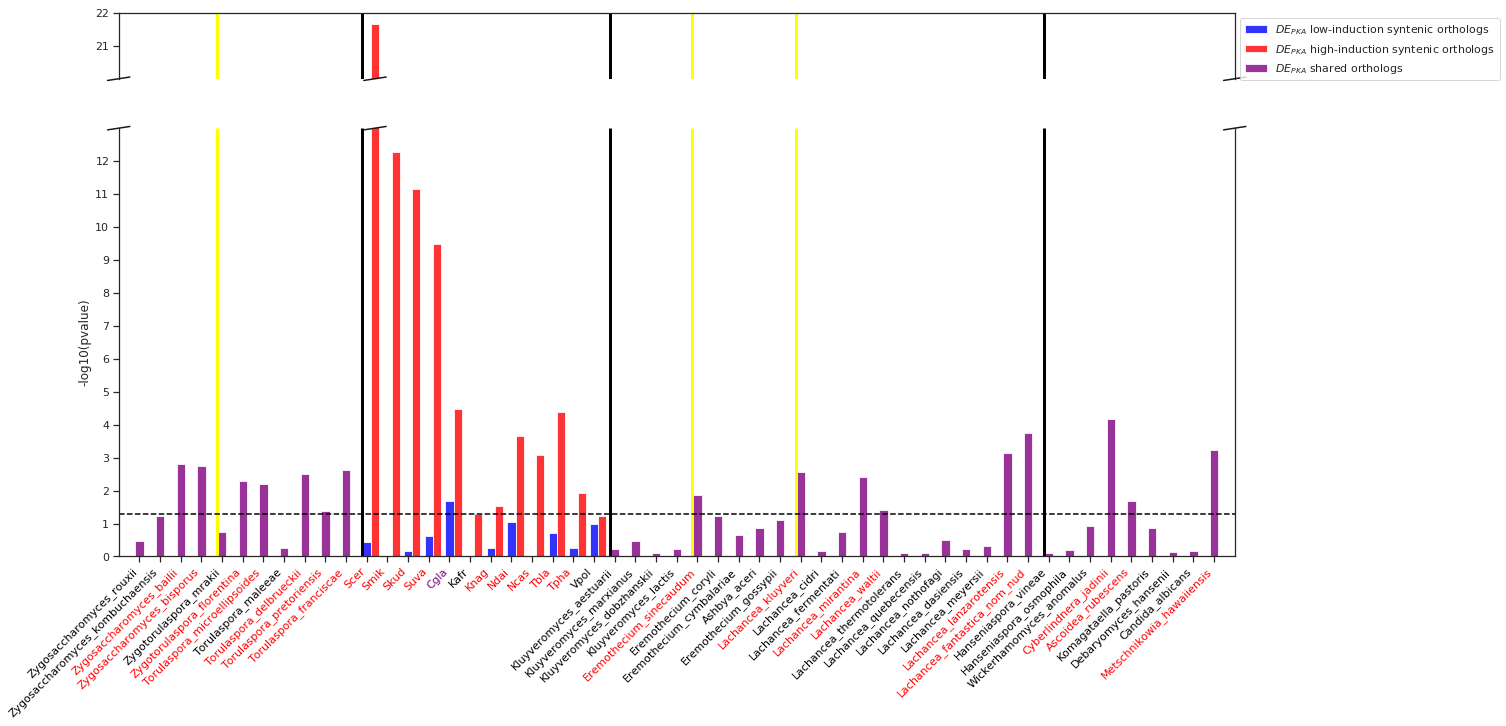

In [123]:
motif_name = 'STRE'

ylim_top = (20,22)
ylim_bottom = (0,13)

tot = (ylim_top[1]-ylim_top[0]) + (ylim_bottom[1]-ylim_bottom[0])


gs_kw = dict(width_ratios=[1],
             height_ratios=[(ylim_top[1]-ylim_top[0])/tot,
                            (ylim_bottom[1]-ylim_bottom[0])/tot
                           ]
            )

fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, gridspec_kw=gs_kw, figsize=(20,10))


bw = 0.4
opacity = 0.8

group_params = {'low': ('blue','$DE_{PKA}$ low-induction syntenic orthologs'), 
                'high': ('red', '$DE_{PKA}$ high-induction syntenic orthologs'), 
                'Pre WGH':('purple', '$DE_{PKA}$ shared orthologs')
               }

index = {'low':[],'high':[], 'Pre WGH':[]}
data = {'low':[],'high':[], 'Pre WGH':[]}
label_order = []
label_color = []
jj = 0

gene_group = 'DEpka_subset'

#ZT Species
for spec in spec_order_ZT: #dict(spec_sets)['Pre WGH']:
    label_order.append(spec)    
    label_color_spec = 'black'
    if pvals['Pre WGH'][spec][gene_group]<0.05:
        label_color_spec = 'red'
    label_color.append(label_color_spec)
    index['Pre WGH'].append(jj)
    data['Pre WGH'].append(-np.log10(pvals['Pre WGH'][spec][gene_group]))
    jj = jj+1

#Post WGH Species
#assumes the same species sets are in both
for spec in spec_order_post_WGH: 
    label_order.append(spec)   
    label_color_spec = 'black'
    if pvals['Post WGH high'][spec][gene_group]<0.05:
        label_color_spec = 'red'
    if pvals['Post WGH low'][spec][gene_group]<0.05:
        label_color_spec = 'purple'
    label_color.append(label_color_spec)
    index['low'].append(jj)
    index['high'].append(jj+bw)
    if spec == 'Scer':
        scer_high_index = jj+bw
        #Make Hash lines to separate axes
    data['low'].append(-np.log10(pvals['Post WGH low'][spec][gene_group]))
    data['high'].append(-np.log10(pvals['Post WGH high'][spec][gene_group]))
    jj = jj+1

#pre WGH Species: KLE and outgroups
for spec in (spec_order_KLE + spec_order_outgroups):#dict(spec_sets)['Pre WGH']: 
    label_order.append(spec) 
    label_color_spec = 'black'
    if pvals['Pre WGH'][spec][gene_group]<0.05:
        label_color_spec = 'red'
    label_color.append(label_color_spec)
    index['Pre WGH'].append(jj)
    data['Pre WGH'].append(-np.log10(pvals['Pre WGH'][spec][gene_group]))
    jj = jj+1

    
for subset_name in ['low','high','Pre WGH']: 
    subset_data = data[subset_name]
    
    color, legend_label = group_params[subset_name]
                
    for ax in [ax1, ax2]: 
        pct_plot = ax.bar(index[subset_name],subset_data, bw,
                     alpha=opacity,
                     color=color,
                     label=legend_label) 
                     #bottom = bottom)

        
        
        
        
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis='x',which='both',bottom=False)
ax1.set_xticklabels([])
ax1.set_xlim(-1,jj)
ax2.spines['top'].set_visible(False)
ax1.set_ylim(*ylim_top)
ax2.set_ylim(*ylim_bottom)
ax2.set_xlim(-1,jj)
ax1.set_yticks(np.arange(ylim_top[0]+1,ylim_top[1]+1,1))
ax2.set_yticks(np.arange(ylim_bottom[0],ylim_bottom[1],1))

#Make Hash lines to separate axes
d = .01  
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
slope = 3*(ylim_bottom[1]-ylim_bottom[0])/tot
ax1.plot((-d, +d), (-slope*d, +slope*d), **kwargs)      
ax1.plot((1 - d, 1 + d), (-slope*d, +slope*d), **kwargs)
#plot Scer
ax1.plot(((scer_high_index+1)/(jj+1)-d, ((scer_high_index+1)/(jj+1)+d)), (-slope*d, +slope*d), **kwargs)
kwargs.update(transform=ax2.transAxes)  
slope = 3*(ylim_top[1]-ylim_top[0])/tot
ax2.plot((-d, +d), (1 - slope*d, 1 + slope*d), **kwargs)  
ax2.plot((1 - d, 1 + d), (1 - slope*d, 1 + slope*d), **kwargs)
ax2.plot(((scer_high_index+1)/(jj+1)-d, ((scer_high_index+1)/(jj+1)+d)), (1-slope*d, 1+slope*d), **kwargs)
            
black_lines = []
yellow_lines = []
black_lines_set = {'Vpol','Torulaspora_franciscae','Lachancea_fantastica_nom_nud'}
yellow_lines_set = {'Zygosaccharomyces_bisporus', 'Kluyveromyces_lactis', 'Eremothecium_gossypii'}

for jj,label in enumerate(label_order):
    if label in black_lines_set:
        black_lines.append(jj+0.75)
    elif label in yellow_lines_set:
        yellow_lines.append(jj+0.75)

for ax, (ymin, ymax) in [(ax1,ylim_top),(ax2,ylim_bottom)]:
    ax.vlines(yellow_lines, ymin = ymin, ymax = ymax, colors = 'yellow',linewidth=3)
    ax.vlines(black_lines, ymin = ymin, ymax = ymax, colors = 'black',linewidth=3)
ax2.set_xticklabels(label_order, rotation='45', ha='right')
ax2.set_xticks(range(0,jj+1))
for (color, tick) in zip(label_color,ax2.xaxis.get_ticklabels()):
    tick.set_color(color)
ax2.set_ylabel('-log10(pvalue)')
ax1.legend(loc = 'upper left', bbox_to_anchor = (1.0,1.0))

ax2.hlines(-np.log10(0.05),xmin=-1, xmax=jj+1, color='black', linestyles='--')

fig.savefig(os.path.normpath('/home/heineike/scratch/' + motif_name + '_conservation_summary_pvals.svg'),bbox_inches='tight')

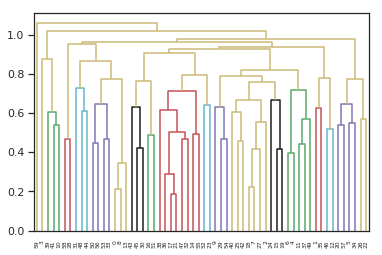

In [106]:
#hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
fig, ax = plt.subplots()
dn1 = sch.dendrogram(row_cluster, ax=ax, above_threshold_color='y', orientation='top')
#dn2 = hierarchy.dendrogram(Z, ax=axes[1], above_threshold_color='#bcbddc', orientation='right')
#hierarchy.set_link_color_palette(None)  # reset to default after use
#plt.show()

In [112]:
row_index = goi_counts_only.index.tolist()
T = sch.fcluster(row_cluster,1.1)  #11, criterion = 'maxclust')
cluster_dict = {}
for kk in list(set(T)):
    cluster = []
    for jj,cnum in enumerate(T):
        if cnum==kk:
            cluster.append(row_index[jj])
    cluster_dict[kk] = cluster
cluster_dict

{1: ['CIT1_CIT2', 'YLR031W_YMR124W', 'SDS24_SDS23', 'HSP82_HSC82'],
 2: ['SOL4_SOL3', 'HES1_KES1'],
 3: ['TRX2_TRX1', 'FUN19_YOR338W', 'UBP9_UBP13'],
 4: ['YPR172W_YLR456W', 'SSE2_SSE1'],
 5: ['YHR097C_PAL1', 'CRF1_IFH1'],
 6: ['TPK1_TPK3', 'COX5B_COX5A', 'STB2_STB6'],
 7: ['GPM2_GPM3', 'PEX18_PEX21', 'PYK2_CDC19', 'FRT2_FRT1', 'EMP46_EMP47'],
 8: ['RTC2_YOL092W',
  'YDR018C_CST26',
  'PHM8_SDT1',
  'SAP4_SAP155',
  'YHR080C_YSP2',
  'VHS3_SIS2',
  'GSP2_GSP1',
  'SHC1_SKT5',
  'YFL042C_YLR072W',
  'VHS1_SKS1'],
 9: ['NDE2_NDE1', 'FMP43_MPC2', 'RTN2_RTN1'],
 10: ['CMK1_CMK2',
  'SDP1_MSG5',
  'TKL2_TKL1',
  'ATG33_SCM4',
  'GND2_GND1',
  'TOS8_CUP9',
  'YNR034W-A_YCR075W-A'],
 11: ['GPD1_GPD2', 'NCE102_FHN1', 'NQM1_TAL1'],
 12: ['CYC7_CYC1', 'POR1_POR2', 'ADE16_ADE17', 'YOR062C_YKR075C', 'AVT6_AVT5'],
 13: ['YSC84_LSB3', 'PGM2_PGM1', 'BAG7_SAC7', 'PSK1_PSK2'],
 14: ['VPS62_TDA6', 'HER1_GIP3'],
 15: ['YPT53_VPS21', 'GGA1_GGA2'],
 16: ['HVG1_VRG4', 'YKL187C_YLR413W'],
 17: ['URA10_URA5']

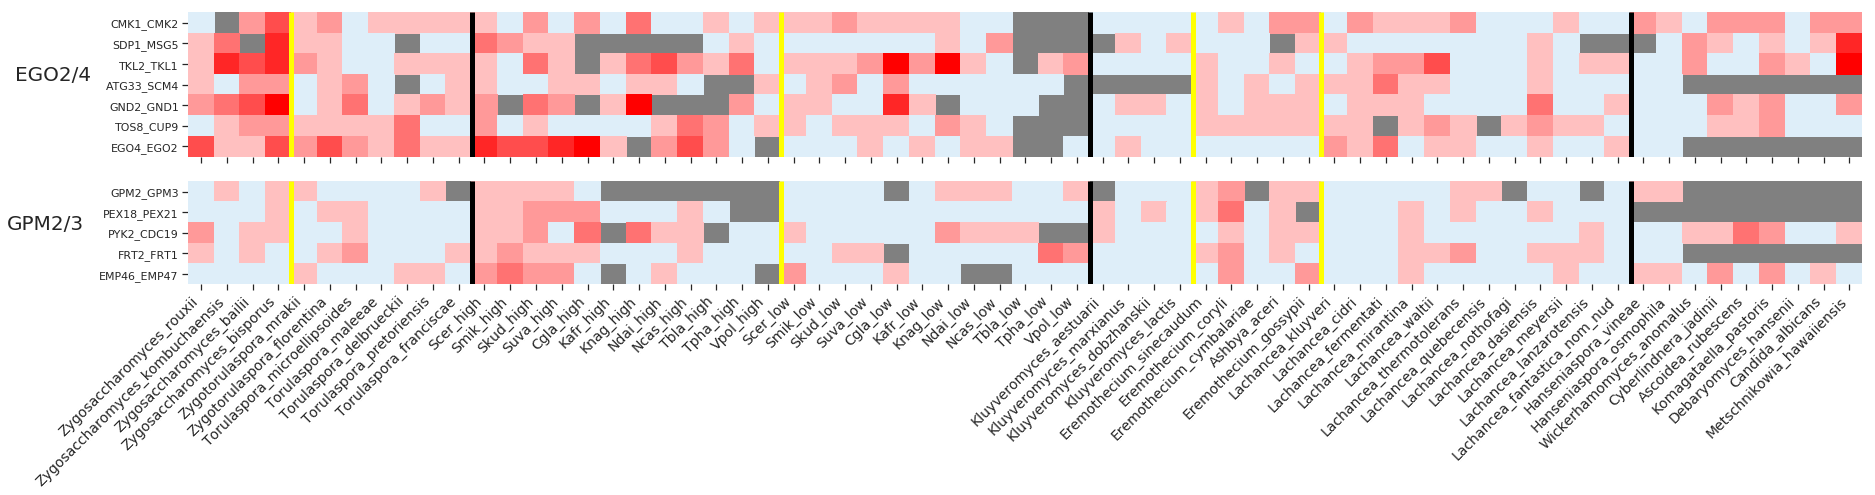

In [135]:
#Need the following from previous cells: 
#vmax, cmap, label_order, motif_name, black_lines, yellow_lines
#cluster_dict

#Separate out sets of genes
sets_to_show = [('EGO2/4',cluster_dict[10]), #
                #('EGO2/4', ['YNR034W-A_YCR075W-A']),
                #('GND2/1', cluster_dict[7]), 
                #('MPC3/2', cluster_dict[3]), 
                #'TPK1/3', cluster_dict[15]),
                ('GPM2/3', cluster_dict[7])
                
                #('SOL3/4', cluster_dict[2])
               ]

heights = [len(set_to_show) for (set_name, set_to_show) in sets_to_show]

fig = plt.figure(figsize=(30,5))
gs = GridSpec(len(sets_to_show), 1, figure=fig,height_ratios=heights)

for jj, (set_name,set_to_show) in enumerate(sets_to_show):
    
    ax = fig.add_subplot(gs[jj])
    goi_counts_subset = goi_counts_clustered.loc[set_to_show,:]
    if set_name=='EGO2/4':
        goi_counts_subset = goi_counts_subset.rename(index={'YNR034W-A_YCR075W-A':'EGO4_EGO2'})
    #cluster_size = len(cluster_dict[cluster_no])

    sns.heatmap(goi_counts_subset, vmax = vmax, ax=ax, cmap=cmap, cbar=False)  #, cbar_kws={'ticks':[val + 0.5 for val in range(vmax)],  'extend':'max', 'aspect':8})  
    #cbar = fig_STRE.axes[1]
    #cbar.set_yticklabels([str(val) for val in range(vmax-1)] + ['>' + str(vmax-1)], fontdict={"fontsize":20})
    ax.set_facecolor("grey")
    if jj==(len(sets_to_show)-1):
        ax.set_xticklabels(label_order, fontdict={"fontsize":14}, rotation =45, ha='right')
    else: 
        ax.set_xticklabels([])
    ax.set_ylabel(set_name, fontdict={"fontsize":20}, rotation=0, labelpad=15, ha='right')
    ax.set_yticklabels(goi_counts_subset.index,rotation=0)
    #ax.set_title('No of ' + motif_name + ' motifs in Promoter',fontdict={"fontsize":25})
    ax.vlines(black_lines, ymin = 0, ymax = len(goi_counts_subset), colors = 'black',linewidth=5)
    ax.vlines(yellow_lines, ymin = 0, ymax = len(goi_counts_subset), colors = 'yellow',linewidth=5)

#fig.savefig(os.path.normpath('/home/heineike/scratch/' + motif_name + '_conservation_examples.svg'),bbox_inches='tight')



## Use Bayes traits to do ancestral reconstruction of number of STREs in ZT and KLE branch.  

In [ ]:


#Try out bayes traits on server using example
#BayesTraits http://www.evolution.rdg.ac.uk/BayesTraitsV3.0.1/BayesTraitsV3.0.1.html

#Get ZT tree, convert it to nexus format

#Put data into appropriate format

#Build command file

#write command to run program

In [275]:
spec_order

['Zygosaccharomyces_rouxii',
 'Zygosaccharomyces_kombuchaensis',
 'Zygosaccharomyces_bailii',
 'Zygosaccharomyces_bisporus',
 'Zygotorulaspora_mrakii',
 'Zygotorulaspora_florentina',
 'Torulaspora_microellipsoides',
 'Torulaspora_maleeae',
 'Torulaspora_delbrueckii',
 'Torulaspora_pretoriensis',
 'Torulaspora_franciscae',
 'Kluyveromyces_aestuarii',
 'Kluyveromyces_marxianus',
 'Kluyveromyces_dobzhanskii',
 'Kluyveromyces_lactis',
 'Eremothecium_sinecaudum',
 'Eremothecium_coryli',
 'Eremothecium_cymbalariae',
 'Ashbya_aceri',
 'Eremothecium_gossypii',
 'Lachancea_kluyveri',
 'Lachancea_cidri',
 'Lachancea_fermentati',
 'Lachancea_mirantina',
 'Lachancea_waltii',
 'Lachancea_thermotolerans',
 'Lachancea_quebecensis',
 'Lachancea_nothofagi',
 'Lachancea_dasiensis',
 'Lachancea_meyersii',
 'Lachancea_lanzarotensis',
 'Lachancea_fantastica_nom_nud',
 'Hanseniaspora_vineae',
 'Hanseniaspora_osmophila',
 'Wickerhamomyces_anomalus',
 'Cyberlindnera_jadinii',
 'Ascoidea_rubescens',
 'Komagata

In [568]:
#Here's a bayestraits wrapper I could probably use instead: https://github.com/ryanafolk/ambitus

#Tried with continuous traits.  Better to use multi-state

motif_name = 'STRE'

spec_order= {'ZT': ['Zygosaccharomyces_rouxii',
                     'Zygosaccharomyces_kombuchaensis',
                     'Zygosaccharomyces_bailii',
                     'Zygosaccharomyces_bisporus',
                     'Zygotorulaspora_mrakii',
                     'Zygotorulaspora_florentina',
                     'Torulaspora_microellipsoides',
                     'Torulaspora_maleeae',
                     'Torulaspora_delbrueckii',
                     'Torulaspora_pretoriensis',
                     'Torulaspora_franciscae'], 
             'KLE': ['Kluyveromyces_aestuarii',
                     'Kluyveromyces_marxianus',
                     'Kluyveromyces_dobzhanskii',
                     'Kluyveromyces_lactis',
                     'Eremothecium_sinecaudum',
                     'Eremothecium_coryli',
                     'Eremothecium_cymbalariae',
                     'Ashbya_aceri',
                     'Eremothecium_gossypii',
                     'Lachancea_kluyveri',
                     'Lachancea_cidri',
                     'Lachancea_fermentati',
                     'Lachancea_mirantina',
                     'Lachancea_waltii',
                     'Lachancea_thermotolerans',
                     'Lachancea_quebecensis',
                     'Lachancea_nothofagi',
                     'Lachancea_dasiensis',
                     'Lachancea_meyersii',
                     'Lachancea_lanzarotensis',
                     'Lachancea_fantastica_nom_nud']
                }

# spec_set_params = [('ZT','Pre WGH'),
#                    ('KLE','Pre WGH', '')]

#set up data matrix based on time-calibrated species tree, and take subset of species based on species subset
anc_recon_dir = '/home/heineike/github/expression_broad_data/expression_data/ancestral_reconstruction/'

y1000plus_dir = '/home/heineike/genomes/y1000plus/'
tree_fname = y1000plus_dir + '332_2408OGs_time-calibrated_phylogeny_species-names_updated.newick'
t = Tree(tree_fname)

spanning_specs = {'ZT': ('Zygosaccharomyces_rouxii', 'Torulaspora_delbrueckii'), 
                 'KLE': ('Kluyveromyces_lactis', 'Lachancea_waltii')}

Lh_thresh = -20.0
N_burnin = 20000
alph_prior = ('uniform',0,10)
anc_prior = alph_prior

#build model command file
with open(anc_recon_dir + 'model_cmds.txt','w') as f:
    f.write("4\n")
    f.write("2\n")  
    f.write("SaveModels " + anc_recon_dir + "models.bin\n")
    f.write("ScaleTrees\n")
    f.write("BurnIn {}\n".format(N_burnin))
    f.write("Prior alpha-1 {} {} {}\n".format(*alph_prior))
    f.write("Run")

anc_rec_data = {}  

for group in ['ZT','KLE']:
    #group = 'ZT'
    anc_rec_data_group = {}
    #t.ladderize()
    tree_fname_base = anc_recon_dir + group + "_tree"


    #Put data into appropriate format

    #Select columns to calculate ancestral reconstruction
    columns_for_cluster = []
    for spec in spec_order[group]:     
        columns_for_cluster.append(spec + '_' + motif_name + '_count')

    goi_counts_subset_cols = goi_counts_subset.loc[:, columns_for_cluster]

    #For each row make file for ancestral reconstruction

    #Make subtree with no NAN

    for row in goi_counts_subset_cols.iterrows():
    #row = next(goi_counts_subset.iterrows())
    #for kk in range(0,5):
        #row = ('ATG33_SCM4',goi_counts_subset.loc['ATG33_SCM4',:])
        print(row[0])
        row_data = {}
        for col_name, col_data in row[1].items(): 
            if not(np.isnan(col_data)):
                row_data[col_name]=col_data

        specs_w_data = [col_name.split('_STRE_')[0] for col_name in row_data.keys()]

        #for each row will need to make a separate tree in case there are nans
        t = Tree(tree_fname)
        subtree = t.get_common_ancestor(spanning_specs[group])
        subtree.prune(specs_w_data)

        #Write tree in nexus format
        with open(tree_fname_base + ".nex", 'w') as f: 
            f.write("#NEXUS\n")
            f.write("Begin trees;\n")
            f.write("\ttranslate\n")
            newick_tree_translate = subtree.write()
            newick_tree_translate = newick_tree_translate.replace('1:',':')
            for jj, spec in enumerate(specs_w_data):
                end_line_char = ','
                if jj== (len(specs_w_data)-1):
                    end_line_char = ';'
                f.write('\t\t{}\t{}{}\n'.format(jj+1,spec,end_line_char))
                newick_tree_translate = newick_tree_translate.replace(spec,str(jj+1))
            f.write('\t\ttree tree1 = ' + newick_tree_translate + '\n')
            f.write('end;')

        #for each row make data file for ancestral reconstruction calculations
        fname_out = anc_recon_dir + group + '_data.txt'
        with open(fname_out, 'w') as f: 
            for col_name, col_data in row_data.items():
                spec_name = col_name.split('_STRE_')[0]
                f.write(spec_name + ' ' + str(col_data) + '\n')

        model_command = ['/home/lab/BayesTraitsV3.0.1-Linux/BayesTraitsV3', 
                         tree_fname_base + ".nex", 
                         anc_recon_dir + group + '_data.txt', 
                         '<', 
                         anc_recon_dir + 'model_cmds.txt'    #The model_cmds.txt file has the following arguments
                         #4: Model A
                         #2: MCMC analysis
                         #SaveModels Models.bin : place to save the models
                        ]
        print('Building model')
        #mod_cmd = subprocess.run(model_command, stdout = subprocess.PIPE) # cwd = '/home/heineike/') #, capture_output=True)

        p = subprocess.Popen(' '.join(model_command), shell=True)
        p.wait()
        sys.stdout.flush() 


        #Don't need to do this because the alpha parameter is the estimate for the MRCA for the whole tree
        # #build MRCA command file
        # with open(anc_recon_dir + 'MRCA_cmds.txt','w') as f:
        #     f.write("4\n")
        #     f.write("2\n")  
        #     f.write("LoadModels " + anc_recon_dir + "models.bin\n")
        #     f.write("AddTag Tag01 " + ' '.join(specs_w_data) + '\n')
        #     f.write("AddMRCA Node-01 Tag01\n")
        #     f.write("ScaleTrees\n")
        #     f.write("BurnIn {}\n".format(N_burnin))
        # #     f.write("HyperPrior alpha-1 gamma 0 10 0 10\n")
        # #     f.write("HyperPrior AncState-1 gamma 0 10 0 10\n")
        #     f.write("Prior alpha-1 {} {} {}\n".format(*alph_prior))
        #     f.write("Prior AncState-1 {} {} {}\n".format(*anc_prior)) 
        #     f.write("Run")


        # mrca_command = ['/home/lab/BayesTraitsV3.0.1-Linux/BayesTraitsV3', 
        #                  tree_fname_base + ".nex", 
        #                  anc_recon_dir + group + '_data.txt', 
        #                  '<', 
        #                  anc_recon_dir + 'MRCA_cmds.txt'    #The MRCA_cmds.txt file has the following arguments
        #                  #4: Model A
        #                  #2: MCMC analysis
        #                  #SaveModels Models.bin : place to save the models
        #                 ]

        # print('Running mrca calculation')

        # p = subprocess.Popen(' '.join(mrca_command), shell=True)
        # p.wait()
        # sys.stdout.flush()


        # data= pd.read_table(anc_recon_dir + group + '_data.txt.Log.txt', skiprows=44, header=1)
        # data_filt = data[data['Lh']>Lh_thresh]
        # data_filt
        # anc_rec_data_group[row[0]] = (data_filt['Est Node-01 - 1'].median(),np.sqrt(data_filt['Sigma^2 1 '].median()))
        # print(data_filt['Est Node-01 - 1'].median(),np.sqrt(data_filt['Sigma^2 1 '].median()))

        data= pd.read_table(anc_recon_dir + group + '_data.txt.Log.txt', skiprows=39, header=1)
        anc_rec_data_group[row[0]]=(data['Alpha 1'].median(), np.sqrt(data['Sigma^2 1 '].median()))
        print((data['Alpha 1'].median(), np.sqrt(data['Sigma^2 1 '].median())))

    anc_rec_data[group] = anc_rec_data_group

TPK1_TPK3
Building model
(1.2488660277455002, 2.6430753344698674)
DAL80_GZF3
Building model
(0.7624872575399999, 1.8524223908251864)
YSC84_LSB3
Building model
(0.7037862001450002, 2.4398963765297492)
CMK1_CMK2
Building model
(1.410309393122, 3.0750793626461088)
CIT1_CIT2
Building model
(1.3103387078725, 2.454280475973559)
CYC7_CYC1
Building model
(1.322430005843, 2.7138861950121451)
PRM6_YJR054W
Building model
(0.390122095725, 1.3342577427416338)
YPT53_VPS21
Building model
(0.49586010171649997, 1.5252349964644791)
POR1_POR2
Building model
(1.7626825467995, 3.6947616524457976)
SDP1_MSG5
Building model
(1.3687642809705, 3.4426619809047474)
COX5B_COX5A
Building model
(0.42145833978799996, 1.8089932875298349)
NDE2_NDE1
Building model
(1.068024055995, 1.8036330669113383)
YLR031W_YMR124W
Building model
(0.186616714666, 0.8323573711573653)
ADE16_ADE17
Building model
(0.5622947817289999, 1.8617842456730855)
PGM2_PGM1
Building model
(1.9360536187655, 1.7767350337494052)
STB2_STB6
Building model

(0.5248933578839999, 1.3341219322663129)
UBP9_UBP13
Building model
(0.740420522153, 1.6023272466812142)
AVT6_AVT5
Building model
(0.5488690998585, 1.7015636181802021)
SCS22_SCS2
Building model
(0.2992274793455, 1.0688804056214614)
YPR172W_YLR456W
Building model
(0.49839553417750004, 1.1739707161918478)
EMP46_EMP47
Building model
(0.5397615285365001, 2.1334258142945819)
YFL042C_YLR072W
Building model
(0.7355929170135, 2.1223991726177478)
CRF1_IFH1
Building model
(0.682944710769, 2.5634403428716652)
RTN2_RTN1
Building model
(0.9704017576749999, 1.9856737672591134)
VHS1_SKS1
Building model
(1.312792615366, 3.2652128499657569)
SSE2_SSE1
Building model
(0.560434264645, 1.8854214431622442)
YOR214C_SPO19
Building model
(0.560434264645, 1.8854214431622442)
ODC1_ODC2
Building model
(0.6600150214595, 2.6717344304667519)
HER1_GIP3
Building model
(2.4536814781564997, 3.778044828928913)
HES1_KES1
Building model
(0.8596968626274999, 2.4657987068976253)
URA10_URA5
Building model
(0.680000339226, 2.46

In [49]:
subtree.write()

'((Zygosaccharomyces_rouxii:0.368984,(Zygosaccharomyces_kombuchaensis:0.242015,(Zygosaccharomyces_bailii:0.175619,Zygosaccharomyces_bisporus:0.175619)1:0.066396)1:0.12697)1:0.419348,((Zygotorulaspora_mrakii:0.386044,Zygotorulaspora_florentina:0.386044)1:0.290129,(Torulaspora_microellipsoides:0.619403,(Torulaspora_maleeae:0.408425,(Torulaspora_delbrueckii:0.222512,(Torulaspora_pretoriensis:0.064869,Torulaspora_franciscae:0.064869)1:0.157643)1:0.185913)1:0.210978)1:0.05677)1:0.11216)1:0.177258;'

In [575]:
anc_rec_data_df = pd.DataFrame(index = goi_counts_subset.index)

for group in ['ZT', 'KLE']:
    med = []
    std = []
    for ohnolog_pair in goi_counts_subset.index: 
        med.append(anc_rec_data[group][ohnolog_pair][0])
        std.append(anc_rec_data[group][ohnolog_pair][1])
    anc_rec_data_df[group + '_med'] = med
    anc_rec_data_df[group + '_std'] = std
    

In [585]:
anc_rec_data_df['ZT_KL_diff']= anc_rec_data_df['ZT_med'] - anc_rec_data_df['KLE_med']
anc_rec_data_df.sort_values(by='ZT_KL_diff', inplace=True)

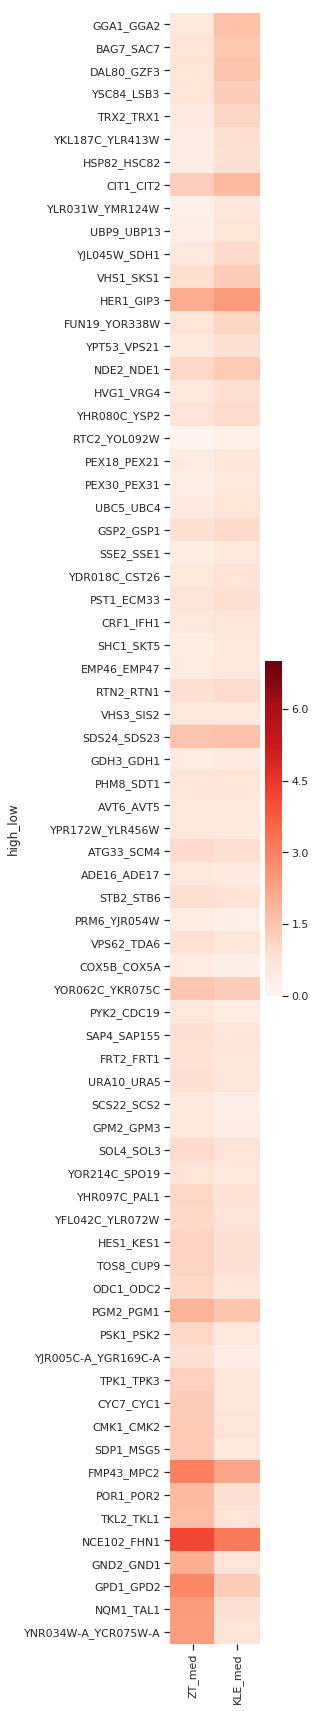

In [588]:
fig2, ax2 = plt.subplots(figsize = (2,30))
#SEt colormap, make 0 light blue
vmax = 7
#cmap = sns.light_palette("red") #,vmax)
#cmap[0] = np.array([222.0/255.0, 238.0/255.0, 249/255.0, 1.0 ])  #Make the 0 color light blue

sns.heatmap(anc_rec_data_df.loc[:,['ZT_med','KLE_med']], vmin=0, vmax = vmax, ax=ax2, cmap="Reds")  #, cbar_kws={'ticks':[val + 0.5 for val in range(vmax)],  'extend':'max', 'aspect':8})  



In [570]:
with open(anc_recon_dir + '20190702_' + motif_name + '_KLE_ZT.pkl', 'wb') as f:
    pickle.dump(anc_rec_data,f)

In [50]:
#Ancestral reconstruction of number of binding sites, using multi-state model

#Tried with continuous traits.  Better to use multi-state

motif_name = 'STRE'

spec_order= {'ZT': ['Zygosaccharomyces_rouxii',
                     'Zygosaccharomyces_kombuchaensis',
                     'Zygosaccharomyces_bailii',
                     'Zygosaccharomyces_bisporus',
                     'Zygotorulaspora_mrakii',
                     'Zygotorulaspora_florentina',
                     'Torulaspora_microellipsoides',
                     'Torulaspora_maleeae',
                     'Torulaspora_delbrueckii',
                     'Torulaspora_pretoriensis',
                     'Torulaspora_franciscae'], 
             'KLE': ['Kluyveromyces_aestuarii',
                     'Kluyveromyces_marxianus',
                     'Kluyveromyces_dobzhanskii',
                     'Kluyveromyces_lactis',
                     'Eremothecium_sinecaudum',
                     'Eremothecium_coryli',
                     'Eremothecium_cymbalariae',
                     'Ashbya_aceri',
                     'Eremothecium_gossypii',
                     'Lachancea_kluyveri',
                     'Lachancea_cidri',
                     'Lachancea_fermentati',
                     'Lachancea_mirantina',
                     'Lachancea_waltii',
                     'Lachancea_thermotolerans',
                     'Lachancea_quebecensis',
                     'Lachancea_nothofagi',
                     'Lachancea_dasiensis',
                     'Lachancea_meyersii',
                     'Lachancea_lanzarotensis',
                     'Lachancea_fantastica_nom_nud']
                }

# spec_set_params = [('ZT','Pre WGH'),
#                    ('KLE','Pre WGH', '')]

#set up data matrix based on time-calibrated species tree, and take subset of species based on species subset
anc_recon_dir = '/home/heineike/github/expression_broad_data/expression_data/ancestral_reconstruction/'

y1000plus_dir = '/home/heineike/genomes/y1000plus/'
tree_fname = y1000plus_dir + '332_2408OGs_time-calibrated_phylogeny_species-names_updated.newick'
t = Tree(tree_fname)

spanning_specs = {'ZT': ('Zygosaccharomyces_rouxii', 'Torulaspora_delbrueckii'), 
                 'KLE': ('Kluyveromyces_lactis', 'Lachancea_waltii')}

#Lh_thresh = -20.0
N_burnin = 20000
#alph_prior = ('uniform',0,10)
#anc_prior = alph_prior

# #build multi state command file
# with open(anc_recon_dir + 'model_cmds.txt','w') as f:
#     f.write("4\n")   #
#     f.write("2\n")  
#     f.write("SaveModels " + anc_recon_dir + "models.bin\n")
#     f.write("ScaleTrees\n")
#     f.write("BurnIn {}\n".format(N_burnin))
#     f.write("Prior alpha-1 {} {} {}\n".format(*alph_prior))
#     f.write("Run")

# anc_rec_data = {}  

#for group in ['ZT','KLE']:
group = 'KLE'
anc_rec_data_group = {}
#t.ladderize()
tree_fname_base = anc_recon_dir + group + "_tree"


#Put data into appropriate format

#Select columns to calculate ancestral reconstruction
columns_for_cluster = []
for spec in spec_order[group]:     
    columns_for_cluster.append(spec + '_' + motif_name + '_count')

goi_counts_subset_cols = goi_counts_subset.loc[:, columns_for_cluster]

#     #For each row make file for ancestral reconstruction

#     #Make subtree with no NAN

#     for row in goi_counts_subset_cols.iterrows():
#     #row = next(goi_counts_subset.iterrows())
row = ('YNR034W-A_YCR075W-A',goi_counts_subset_cols.loc['YNR034W-A_YCR075W-A',:])
#     #for kk in range(0,5):

print(row[0])
row_data = {}
for col_name, col_data in row[1].items(): 
    if not(np.isnan(col_data)):
        row_data[col_name]=col_data

specs_w_data = [col_name.split('_STRE_')[0] for col_name in row_data.keys()]

#for each row will need to make a separate tree in case there are nans
t = Tree(tree_fname)
subtree = t.get_common_ancestor(spanning_specs[group])
subtree.prune(specs_w_data)

#Write tree in nexus format
with open(tree_fname_base + ".nex", 'w') as f: 
    f.write("#NEXUS\n")
    f.write("Begin trees;\n")
    f.write("\ttranslate\n")
    newick_tree_translate = subtree.write()
    newick_tree_translate = newick_tree_translate.replace('1:',':')
    for jj, spec in enumerate(specs_w_data):
        end_line_char = ','
        if jj== (len(specs_w_data)-1):
            end_line_char = ';'
        f.write('\t\t{}\t{}{}\n'.format(jj+1,spec,end_line_char))
        newick_tree_translate = newick_tree_translate.replace(spec,str(jj+1))
    f.write('\t\ttree tree1 = ' + newick_tree_translate + '\n')
    f.write('end;')

#for each row make data file for ancestral reconstruction calculations
fname_out = anc_recon_dir + group + '_data.txt'
with open(fname_out, 'w') as f: 
    for col_name, col_data in row_data.items():
        spec_name = col_name.split('_STRE_')[0]
        f.write(spec_name + ' ' + str(int(col_data)) + '\n')

#         model_command = ['/home/lab/BayesTraitsV3.0.1-Linux/BayesTraitsV3', 
#                          tree_fname_base + ".nex", 
#                          anc_recon_dir + group + '_data.txt', 
#                          '<', 
#                          anc_recon_dir + 'model_cmds.txt'    #The model_cmds.txt file has the following arguments
#                          #4: Model A
#                          #2: MCMC analysis
#                          #SaveModels Models.bin : place to save the models
#                         ]
#         print('Building model')
#         #mod_cmd = subprocess.run(model_command, stdout = subprocess.PIPE) # cwd = '/home/heineike/') #, capture_output=True)

#         p = subprocess.Popen(' '.join(model_command), shell=True)
#         p.wait()
#         sys.stdout.flush() 


#         #Don't need to do this because the alpha parameter is the estimate for the MRCA for the whole tree
#         # #build MRCA command file
#         # with open(anc_recon_dir + 'MRCA_cmds.txt','w') as f:
#         #     f.write("4\n")
#         #     f.write("2\n")  
#         #     f.write("LoadModels " + anc_recon_dir + "models.bin\n")
#         #     f.write("AddTag Tag01 " + ' '.join(specs_w_data) + '\n')
#         #     f.write("AddMRCA Node-01 Tag01\n")
#         #     f.write("ScaleTrees\n")
#         #     f.write("BurnIn {}\n".format(N_burnin))
#         # #     f.write("HyperPrior alpha-1 gamma 0 10 0 10\n")
#         # #     f.write("HyperPrior AncState-1 gamma 0 10 0 10\n")
#         #     f.write("Prior alpha-1 {} {} {}\n".format(*alph_prior))
#         #     f.write("Prior AncState-1 {} {} {}\n".format(*anc_prior)) 
#         #     f.write("Run")


#         # mrca_command = ['/home/lab/BayesTraitsV3.0.1-Linux/BayesTraitsV3', 
#         #                  tree_fname_base + ".nex", 
#         #                  anc_recon_dir + group + '_data.txt', 
#         #                  '<', 
#         #                  anc_recon_dir + 'MRCA_cmds.txt'    #The MRCA_cmds.txt file has the following arguments
#         #                  #4: Model A
#         #                  #2: MCMC analysis
#         #                  #SaveModels Models.bin : place to save the models
#         #                 ]

#         # print('Running mrca calculation')

#         # p = subprocess.Popen(' '.join(mrca_command), shell=True)
#         # p.wait()
#         # sys.stdout.flush()


#         # data= pd.read_table(anc_recon_dir + group + '_data.txt.Log.txt', skiprows=44, header=1)
#         # data_filt = data[data['Lh']>Lh_thresh]
#         # data_filt
#         # anc_rec_data_group[row[0]] = (data_filt['Est Node-01 - 1'].median(),np.sqrt(data_filt['Sigma^2 1 '].median()))
#         # print(data_filt['Est Node-01 - 1'].median(),np.sqrt(data_filt['Sigma^2 1 '].median()))

#         data= pd.read_table(anc_recon_dir + group + '_data.txt.Log.txt', skiprows=39, header=1)
#         anc_rec_data_group[row[0]]=(data['Alpha 1'].median(), np.sqrt(data['Sigma^2 1 '].median()))
#         print((data['Alpha 1'].median(), np.sqrt(data['Sigma^2 1 '].median())))

#     anc_rec_data[group] = anc_rec_data_group

YNR034W-A_YCR075W-A


In [51]:
subtree.write()

'((Lachancea_kluyveri:0.952821,((Lachancea_cidri:0.447062,Lachancea_fermentati:0.447062)1:0.314076,(Lachancea_mirantina:0.686364,((Lachancea_waltii:0.359157,(Lachancea_thermotolerans:0.089791,Lachancea_quebecensis:0.089791)1:0.269366)1:0.101199,(Lachancea_nothofagi:0.319211,(Lachancea_dasiensis:0.277238,(Lachancea_meyersii:0.152851,(Lachancea_lanzarotensis:0.061804,Lachancea_fantastica_nom_nud:0.061804)1:0.091047)1:0.124387)1:0.041974)1:0.141145)1:0.226008)1:0.074774)1:0.191683)1:0.102603,((Kluyveromyces_aestuarii:0.511467,(Kluyveromyces_marxianus:0.274398,(Kluyveromyces_dobzhanskii:0.161552,Kluyveromyces_lactis:0.161552)1:0.112846)1:0.237069)1:0.429803,((Eremothecium_cymbalariae:0.548046,(Ashbya_aceri:0.084082,Eremothecium_gossypii:0.084082)1:0.463964)1:0.064561,(Eremothecium_sinecaudum:0.49674,Eremothecium_coryli:0.49674)1:0.115867)1:0.328663)1:0.114153)1:0.084571;'

## Attempt to understand why S.mik has such balanced STRE percentages (is it a data error?)

In [252]:
b = motif_calcs['Post WGH low']['Smik']['DEpka']
b.prom_counts.loc['Smik_12.374',:]

STRE_count                                                            0
STRE_full_features                                                   []
PDS_count                                                             0
PDS_full_features                                                    []
TATA_count                                                            2
TATA_full_features    [(185, fwd, TTTATATATATT), (194, rev, AATATATA...
Name: Smik_12.374, dtype: object

In [296]:
spec = 'Smik'
orth_lookup = io_library.read_orth_lookup_table('Scer', spec, data_processing_dir + os.sep + "ortholog_files_YGOB" + os.sep)
orth_lookup

{'YPL133C': ['Smik_6.332'],
 'YDR371W': ['Smik_4.637'],
 'YNL117W': ['Smik_14.210'],
 'YPR043W': ['Smik_16.287'],
 'YNL223W': ['Smik_14.109'],
 'YDL100C': ['Smik_4.136'],
 'YMR199W': ['Smik_13.407'],
 'YOR304W': ['Smik_15.485'],
 'YAL061W': ['Smik_1.5'],
 'YEL055C': ['Smik_5.32'],
 'YGR147C': ['Smik_6.251'],
 'YAL060W': ['Smik_1.6'],
 'YPL091W': ['Smik_16.146'],
 'YPR182W': ['Smik_16.446'],
 'YJR052W': ['Smik_10.333'],
 'YOL015W': ['Smik_15.154'],
 'YMR145C': ['Smik_13.343'],
 'YJR036C': ['Smik_10.310'],
 'YMR183C': ['Smik_13.388'],
 'YLR119W': ['Smik_12.185'],
 'Scer_snR60': ['NONE'],
 'YHR147C': ['Smik_8.231'],
 'YJR095W': ['Smik_10.383'],
 'YDR152W': ['Smik_4.397'],
 'YPL036W': ['Smik_16.199'],
 'YKL080W': ['Smik_11.159'],
 'YOR138C': ['Smik_15.318'],
 'YLR448W': ['Smik_13.67'],
 'Scer_14.trna10I': ['NONE'],
 'YLR263W': ['Smik_12.338'],
 'YBR006W': ['Smik_2.126'],
 'YKR059W': ['Smik_10.94'],
 'YHR214W': ['NONE'],
 'YJL082W': ['Smik_11.275'],
 'YBR036C': ['Smik_2.154'],
 'YBR221C': [

In [275]:
spec = 'Scer'
motif_calcs['Post WGH high'][spec]['DEpka'].prom_counts.loc[['YIL111W','YNL052W'],:]

/home/lab/envs/seqanalysis/lib/python3.5/site-packages/pandas/core/indexing.py:1472: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



STRE_count                              STRE_full_features  \
YIL111W         2.0  [(177, fwd, GACCCCTTA), (167, rev, AACCCCTCA)]   
YNL052W         NaN                                             NaN   

         PDS_count PDS_full_features  TATA_count          TATA_full_features  
YIL111W        0.0                []         1.0  [(100, fwd, TTTATAAATGAC)]  
YNL052W        NaN               NaN         NaN                         NaN

In [ ]:
#Enrichment in KL and SC genes activated by PKA inhibition

output_format = 'full'
motif_dict = {'STRE': 'CCCCT', 'TATA': 'TATA[AT]A[AT][AG]', 'PDS': 'AGGGAT', 'KL_MAC1_like': '[AT]AGCAAA'}   
sequence_context = 2

prom_set_prefix = {'Klac':'kl', 'Scer':'sc'} 

prom_counts = {}
#all promoters, and pkainh_act set
for spec in ['Klac', 'Scer']:
    prom_counts_spec = {}
    for prom_set in ['all_' + prom_set_prefix[spec] + '_promoters',  prom_set_prefix[spec] + "_pkainh_act_20181214" ]:
        promoters_fname = data_processing_dir + os.path.normpath(prom_set_prefix[spec] + "_promoters/promoter_sets/" + prom_set + ".fasta")
        prom_counts_spec_prom_set = io_library.exact_promoter_scan_from_fasta(promoters_fname, motif_dict, output_format = output_format, sequence_context = sequence_context)
        for data_col in ['count', 'full_features']:
            prom_counts_spec_prom_set.rename(columns = {motif_name + '_'+ data_col : spec + '_' + motif_name + '_' + data_col for motif_name in motif_dict.keys()}, inplace=True)
        prom_counts_spec[prom_set] = prom_counts_spec_prom_set 
    
    prom_counts[spec] = prom_counts_spec

#pkainh_act broken down by Msn2/4 target status
for spec in ['Klac', 'Scer']:
    for subset in ['Msn24', 'noMsn24']:
        promoters_fname = data_processing_dir + os.path.normpath(prom_set_prefix[spec] + "_promoters/promoter_sets/" + spec + '_pkainh_act_' + subset + '_20190319.fasta')
        prom_counts_spec_subset = io_library.exact_promoter_scan_from_fasta(promoters_fname, motif_dict, output_format = output_format, sequence_context = sequence_context)
        for data_col in ['count', 'full_features']:
            prom_counts_spec_subset.rename(columns = {motif_name + '_' + data_col : spec + '_' + motif_name + '_' + data_col for motif_name in motif_dict.keys()}, inplace=True)
        prom_counts[spec]['pkainh_act_'+subset] = prom_counts_spec_subset
    
for level in ['low', 'high']: 
    promoters_fname = data_processing_dir + os.path.normpath('sc_promoters/promoter_sets/sc_ohnologs_goi_' + level + '_20181218.fasta')
    prom_counts_spec_level = io_library.exact_promoter_scan_from_fasta(promoters_fname, motif_dict, output_format = output_format, sequence_context = sequence_context)
    for data_col in ['count', 'full_features']:
         prom_counts_spec_level.rename(columns = {motif_name + '_' + data_col : 'Scer_' + motif_name + '_' + data_col for motif_name in motif_dict.keys()}, inplace=True)
    prom_counts['Scer']['ohnolog_goi_' + level] = prom_counts_spec_level
    
promoters_fname = data_processing_dir + os.path.normpath('kl_promoters/promoter_sets/kl_ohnologs_goi_20181218.fasta')
prom_counts_spec = io_library.exact_promoter_scan_from_fasta(promoters_fname, motif_dict, output_format = output_format, sequence_context = sequence_context)
for data_col in ['count', 'full_features']:
    prom_counts_spec.rename(columns = {motif_name + '_' + data_col : 'Klac_' + motif_name + '_' + data_col for motif_name in motif_dict.keys()}, inplace=True)
prom_counts['Klac']['ohnolog_goi'] = prom_counts_spec
    
#SCer DEseq High - add Msn24 target breakdown
for subset in ['Msn24','noMsn24']:
    promoters_fname = data_processing_dir + os.path.normpath('sc_promoters/promoter_sets/sc_ohnologs_goi_high_' + subset + '_20190319.fasta')
    prom_counts_subset = io_library.exact_promoter_scan_from_fasta(promoters_fname, motif_dict, output_format = output_format, sequence_context = sequence_context)
    for data_col in ['count', 'full_features']:
         prom_counts_subset.rename(columns = {motif_name + '_' + data_col : 'Scer_' + motif_name + '_' + data_col for motif_name in motif_dict.keys()}, inplace=True)
    prom_counts['Scer']['ohnolog_goi_high_' + subset] = prom_counts_subset

#Add sc common name column for prom counts

##not sure why this is necessary and if it is necessary, why I only do it for high
#prom_counts['Scer']['ohnolog_goi_high']['SC_common_name']=io_library.SC_common_name_lookup(prom_counts['Scer']['ohnolog_goi_high'].index)


#Do Fisher's exact test on a set of comparisons

comparisons = {'Scer' : {'goi_high_v_all': io_library.PromComparison(('ohnolog_goi_high', 'all_sc_promoters')), 
                       'goi_low_v_all': io_library.PromComparison(('ohnolog_goi_low', 'all_sc_promoters')), 
                       'goi_high_Msn24_v_all': io_library.PromComparison(('ohnolog_goi_high_Msn24', 'all_sc_promoters')),
                       'goi_high_noMsn24_v_all': io_library.PromComparison(('ohnolog_goi_high_noMsn24', 'all_sc_promoters')),
                       'goi_high_v_goi_low': io_library.PromComparison(('ohnolog_goi_high', 'ohnolog_goi_low')),
                       'pka_act_v_all': io_library.PromComparison(('sc_pkainh_act_20181214','all_sc_promoters')), 
                       'pka_act_Msn24_v_all': io_library.PromComparison(('pkainh_act_Msn24','all_sc_promoters')),
                       'pka_act_noMsn24_v_all': io_library.PromComparison(('pkainh_act_noMsn24','all_sc_promoters'))
                      }, 
               'Klac' : {'goi_kl_orth_v_all': io_library.PromComparison(('ohnolog_goi','all_kl_promoters')),
                         'pka_act_v_all': io_library.PromComparison(('kl_pkainh_act_20181214','all_kl_promoters')),
                         'pka_act_Msn24_v_all': io_library.PromComparison(('pkainh_act_Msn24','all_kl_promoters')),
                         'pka_act_noMsn24_v_all': io_library.PromComparison(('pkainh_act_noMsn24','all_kl_promoters'))
                      }
              }

output = {'Motif': list(motif_dict.keys())}

#Added afterwards to conform to all other species data structure
motif_calcs = {'Post WGH low':{'Scer':{'all':{}, 'goi':{}}},
               'Post WGH high': {'Scer':{'all':{}, 'goi':{}}},
               'Pre WGH': {'Klac':{'all':{}, 'goi':{}}}
              }
motif_calcs_comparison_map = {'goi_low_v_all':'Post WGH low', 
                             'goi_high_v_all':'Post WGH high', 
                             'goi_kl_orth_v_all': 'Pre WGH'}


for spec in ['Scer', 'Klac']: 
    print(spec)
    for comparison_name, comparison in comparisons[spec].items(): 
        print(comparison_name)
        promhits1 = io_library.PromHits(prom_counts[spec][comparison['promsets'][0]],motif_dict, prefix = spec)
        promhits2 = io_library.PromHits(prom_counts[spec][comparison['promsets'][1]],motif_dict, prefix = spec)
        
        if comparison_name.split('_v_')[1]=='all': 
            set2type= 'all'
        else: 
            set2type= 'another_set'
        
        comparison.generate_pval(promhits1, promhits2, set2type, motif_dict)
            
        
# output_fname = data_processing_dir + os.path.normpath("kl_sc_PKA_as_m24_r1g1_20181017/STRE_TATA_PDS_enrichment_20181218.csv")

# output_df.to_csv(output_fname)

In [319]:
spec_set_name = 'Pre WGH'
spec = 'Metschnikowia_hawaiiensis'
prom_data = motif_calcs[spec_set_name][spec]['DEpka'].prom_counts
prom_data

TATA_count                                 TATA_full_features  \
78_4754           0                                                 []   
78_3793           0                                                 []   
78_3680           0                                                 []   
78_5299           0                                                 []   
78_3934           0                                                 []   
78_4381           0                                                 []   
78_710            0                                                 []   
78_4831           1                          [(82, fwd, TCTATATAAAGG)]   
78_3910           0                                                 []   
78_427            1                          [(52, fwd, ACTATATAAGCT)]   
78_4086           2  [(561, fwd, AGTATATAAACG), (682, rev, ACTATATA...   
78_1220           3  [(522, fwd, ATTATAAAAAGT), (389, fwd, ATTATATA...   
78_1594           2  [(53, fwd, ATTATATATATA), (60, rev, CGTATATATA...   
78_4663           1                         [(535, rev, TCTATAAATAGC)]   
78_1052           0                                                 []   
78_5498           2  [(561, fwd, GGTATATAAAGG), (515, fwd, AATATAAA...   
78_3766           2  [(59, fwd, TTTATATATAGT), (68, rev, ACTATATATA...   
78_563            2  [(466, fwd, GCTATAAATGTT), (217, rev, ATTATATA...   
78_3101           0                                                 []   
78_2800           2  [(146, rev, GCTATATAAATC), (214, rev, TCTATATA...   
78_2846           1                         [(140, fwd, CTTATAAATAGT)]   
78_1495           0                                                 []   
78_2031           0                                                 []   
78_5667           1                         [(280, fwd, AATATAAAAAAA)]   
78_3426           0                                                 []   
78_4607           2  [(618, fwd, ATTATAAAAGGG), (568, rev, CATATAAA...   
78_5750           2  [(241, fwd, ACTATATATAGT), (250, rev, ACTATATA...   
78_2099           1                         [(600, fwd, TGTATATAAAGC)]   
78_4598           1                         [(273, rev, TCTATATAAATA)]   
78_4939           0                                                 []   
78_6125           0                                                 []   
78_3253           1                          [(82, fwd, TTTATAAAAAAA)]   
78_3254           1                         [(400, fwd, AATATAAAAATA)]   
78_3570           1                         [(196, fwd, ACTATAAAAGAG)]   
78_4962           0                                                 []   
78_5687           0                                                 []   
78_4208           3  [(486, fwd, AATATATATACC), (495, rev, GGTATATA...   
78_432            0                                                 []   
78_2730           1                          [(85, fwd, ACTATAAATACG)]   
78_4658           2  [(439, fwd, TCTATAAAAAGG), (199, fwd, GGTATATA...   
78_810            1                         [(574, fwd, ACTATAAATGTT)]   
78_1445           1                         [(200, rev, GTTATATATGTG)]   
78_904            1                         [(263, rev, CGTATAAATAAG)]   
78_2              1                          [(51, fwd, ACTATATAAACC)]   
78_3374           0                                                 []   
78_2062           0                                                 []   
78_5964           0                                                 []   
78_5731           1                          [(79, fwd, CGTATATAAAGC)]   
78_1659           2  [(227, fwd, TCTATATAAGAC), (340, rev, AATATATA...   
78_155            0                                                 []   
78_3316           0                                                 []   
78_278            1                          [(75, fwd, CATATAAAAATG)]   
78_3100           0                                                 []   
78_3603      

In [ ]:



fig_hmfilt, ax_hmfilt = plt.subplots()
sns.heatmap(expression_data_df_reorder, ax=ax_hmfilt)

fig_dend, ax_dend = plt.subplots()
sch.dendrogram(row_cluster, ax=ax_dend)

In [ ]:
#Set 0 equal to blue

#c6f0ff

In [332]:
goi_counts_only

Scer_STRE_count_high  Smik_STRE_count_high  \
high_low                                                          
TPK1_TPK3                               2                   0.0   
DAL80_GZF3                              0                   0.0   
YSC84_LSB3                              1                   0.0   
CMK1_CMK2                               1                   0.0   
CIT1_CIT2                               3                   1.0   
CYC7_CYC1                               3                   0.0   
PRM6_YJR054W                            0                   0.0   
YPT53_VPS21                             1                   1.0   
POR1_POR2                               1                   2.0   
SDP1_MSG5                               3                   0.0   
COX5B_COX5A                             2                   2.0   
NDE2_NDE1                               2                   2.0   
YLR031W_YMR124W                         1                   1.0   
ADE16_ADE17                             3                   0.0   
PGM2_PGM1                               6                   4.0   
STB2_STB6                               1                   2.0   
RTC2_YOL092W                            1                   2.0   
GPD1_GPD2                               3                   2.0   
GPM2_GPM3                               1                   1.0   
YDR018C_CST26                           2                   1.0   
PST1_ECM33                              0                   0.0   
UBC5_UBC4                               0                   0.0   
TKL2_TKL1                               1                   0.0   
NCE102_FHN1                             5                   1.0   
VPS62_TDA6                              1                   0.0   
PHM8_SDT1                               4                   0.0   
HVG1_VRG4                               1                   0.0   
SAP4_SAP155                             1                   0.0   
PEX30_PEX31                             0                   1.0   
NQM1_TAL1                               3                   4.0   
...                                   ...                   ...   
GGA1_GGA2                               1                   1.0   
BAG7_SAC7                               3                   2.0   
VHS3_SIS2                               2                   3.0   
YOR062C_YKR075C                         1                   1.0   
GSP2_GSP1                               2                   0.0   
SDS24_SDS23                             2                   0.0   
TOS8_CUP9                               2                   0.0   
HSP82_HSC82                             2                   1.0   
YNR034W-A_YCR075W-A                     5                   4.0   
GDH3_GDH1                               0                   1.0   
PYK2_CDC19                              1                   1.0   
FUN19_YOR338W                           3                   3.0   
FRT2_FRT1                               1                   2.0   
PSK1_PSK2                               1                   1.0   
SHC1_SKT5                               1                   1.0   
UBP9_UBP13                              1                   1.0   
AVT6_AVT5                               2                   2.0   
SCS22_SCS2                              0                   0.0   
YPR172W_YLR456W                         1                   0.0   
EMP46_EMP47                             2                   3.0   
YFL042C_YLR072W                         1                   3.0   
CRF1_IFH1                               2                   1.0   
RTN2_RTN1                               1                   2.0   
VHS1_SKS1                               1                   0.0   
SSE2_SSE1                               1                   0.0   
YOR214C_SPO19                           0                   0.0   
ODC1_ODC2                               0                   0.0   
H

In [323]:
goi_pre_WGH_orths_counts.merge(ohnologs_goi_counts, how='left', left_on='Ancestor', right_index=True)

Ancestor Metschnikowia_hawaiiensis_genename  \
high_low                                                            
TPK1_TPK3            Anc_1.182                            78_5964   
DAL80_GZF3           Anc_1.250                               NONE   
YSC84_LSB3           Anc_1.356                            78_3100   
CMK1_CMK2            Anc_1.374                            78_4658   
CIT1_CIT2            Anc_1.422                            78_3253   
CYC7_CYC1            Anc_1.482                            78_2800   
PRM6_YJR054W         Anc_1.495                            78_4663   
YPT53_VPS21          Anc_2.196                            78_5667   
POR1_POR2            Anc_2.254                             78_563   
SDP1_MSG5            Anc_2.256                            78_6125   
COX5B_COX5A          Anc_2.258                            78_1495   
NDE2_NDE1            Anc_2.382                             78_278   
YLR031W_YMR124W      Anc_2.414                               NONE   
ADE16_ADE17          Anc_2.418                            78_3680   
PGM2_PGM1            Anc_2.445                             78_432   
STB2_STB6            Anc_2.616                               NONE   
RTC2_YOL092W         Anc_3.105                             78_710   
GPD1_GPD2            Anc_3.169                            78_4831   
GPM2_GPM3            Anc_3.172                               NONE   
YDR018C_CST26        Anc_3.244                            78_1220   
PST1_ECM33           Anc_3.302                            78_5731   
UBC5_UBC4            Anc_3.308                            78_2367   
TKL2_TKL1            Anc_3.372                             78_427   
NCE102_FHN1          Anc_3.493                            78_1445   
VPS62_TDA6           Anc_3.505                               NONE   
PHM8_SDT1            Anc_3.536                            78_4086   
HVG1_VRG4            Anc_3.538                               NONE   
SAP4_SAP155          Anc_3.547                            78_3254   
PEX30_PEX31          Anc_4.140                            78_4607   
NQM1_TAL1            Anc_4.188                            78_3766   
...                        ...                                ...   
GGA1_GGA2            Anc_5.416                            78_5299   
BAG7_SAC7            Anc_5.471                            78_3101   
VHS3_SIS2            Anc_5.655                            78_5687   
YOR062C_YKR075C      Anc_5.663                               NONE   
GSP2_GSP1             Anc_6.90                            78_3603   
SDS24_SDS23          Anc_6.107                            78_3934   
TOS8_CUP9            Anc_6.170                            78_4939   
HSP82_HSC82          Anc_6.267                               78_2   
YNR034W-A_YCR075W-A  Anc_6.348                               NONE   
GDH3_GDH1              Anc_7.1                             78_155   
PYK2_CDC19            Anc_7.45                            78_1594   
FUN19_YOR338W         Anc_7.55                            78_4962   
FRT2_FRT1             Anc_7.69                               NONE   
PSK1_PSK2             Anc_7.86                            78_3793   
SHC1_SKT5            Anc_7.386                            78_3426   
UBP9_UBP13           Anc_7.390                             78_904   
AVT6_AVT5            Anc_7.420                            78_3374   
SCS22_SCS2           Anc_7.423                            78_4754   
YPR172W_YLR456W      Anc_7.529                            78_1659   
EMP46_EMP47            Anc_8.2                             78_810   
YFL042C_YLR072W       Anc_8.14                            78_5498   
CRF1_IFH1            Anc_8.434                               NONE   
RTN2_RTN1            Anc_8.454                            78_3910   
VHS1_SKS1            Anc_8.477                            78_2062   
SSE2_SSE1            Anc_8.590                            78_4381   
YOR214C_SPO19       

In [ ]:
## Visualize Number of STREs for all promoters in phylogeny

# Plot heatmap of all STREs in same order 
# heatmap after filtering and sorting

motif = 'STRE'

spec_order_post_WGH = ['Scer', 'Smik', 'Suva', 'Cgla', 'Ncas', 'Vpol']
spec_order_pre_WGH = specs_ordered_fig2[1:]
# ['Torulaspora_delbrueckii',
#  'Zygosaccharomyces_bailii',
#  'Zygosaccharomyces_rouxii',
#  'Zygotorulaspora_florentina',
#  'Kluyveromyces_lactis',
#  'Kluyveromyces_marxianus',
#  'Eremothecium_gossypii',
#  'Hanseniaspora_vineae',
#  'Cyberlindnera_jadinii',
#  'Wickerhamomyces_anomalus',
#  'Ascoidea_rubescens',
#  'Metschnikowia_hawaiiensis',
#  'Debaryomyces_hansenii',
#  'Komagataella_pastoris']

spec_sets = [('Post WGH low', spec_order_post_WGH), 
             ('Post WGH high', spec_order_post_WGH), 
             ('Pre WGH', spec_order_pre_WGH)]

#Start with ohnolog dataframe and then add in columns with counts for given motf for each species

#For post WGH, start by merging based on ohnolog matrix
for 



#for Pre WGH filter to subset that has right number of orthologs



# levels = {'Post WGH low': 'low', 
#           'Post WGH high': 'high', 
#           'Pre WGH' : ''}


columns_to_show = []
label_order = []
for spec_set_name in ['Post WGH low', 'Post WGH high', 'Pre WGH']: 
    spec_set = spec_sets[spec_set_name]
    level = levels[spec_set_name]
    if level == '': 
        level_sep = ''
    else: 
        level_sep = '_'
        
    for spec in spec_set: 
        
        columns_to_show.append(spec + '_' + motif + '_count' + level_sep + level)
        label_order.append(spec + level_sep + level)
        
        
#Make labels for each species, and separate out pre/post WGH and post WGH high/low with yellow lines
#Make big lines for all major group breaks

big_lines = []
for jj,label in enumerate(label_order):
    if label in {'Vpol_low', 'Vpol_high'}:
        big_lines.append(jj+1)

        
        
ohnologs_goi_counts = ohnologs_goi.loc[:, columns_to_show]

fig_STRE, ax_STRE = plt.subplots(figsize=(5,20))

#cmap = cm.get_cmap('PiYG', 11) 
vmax = 5
sns.heatmap(ohnologs_goi_counts, vmax = vmax, ax=ax_STRE, cmap=sns.light_palette("red",vmax), cbar_kws={'ticks':[val + 0.5 for val in range(vmax)],  'extend':'max', 'aspect':8})  
cbar = fig_STRE.axes[1]
cbar.set_yticklabels([str(val) for val in range(vmax-1)] + ['>' + str(vmax-1)], fontdict={"fontsize":14})
ax_STRE.set_facecolor("grey")
ax_STRE.set_xticklabels(label_order, fontdict={"fontsize":14})
ax_STRE.set_ylabel('')
ax_STRE.set_title('No of STREs in Promoter',fontdict={"fontsize":16})
ax_STRE.vlines(big_lines, ymin = 0, ymax = len(ohnologs_goi_counts), colors = 'yellow',linewidth=3)

#fig_STRE.savefig(os.path.normpath('/home/heineike/scratch/' + motif + '_conservation_all.svg'),bbox_inches='tight')





In [ ]:
#For GOI list in S.Cer, get enrichment of STRE's for a set of species.  

ohnologs_goi = ohnologs_goi_prom_counts

L_prom = 700
output_format = 'full'
motif_dict = {'STRE': 'CCCCT', 'TATA': 'TATA[AT]A[AT][AG]', 'PDS': 'AGGGAT'} 
sequence_context = 2   

spec_order_post_WGH = ['Scer', 'Smik', 'Suva', 'Cgla', 'Ncas', 'Vpol']
spec_order_pre_WGH = ['Torulaspora_delbrueckii',
 'Zygosaccharomyces_bailii',
 'Zygosaccharomyces_rouxii',
 'Zygotorulaspora_florentina',
 'Metschnikowia_hawaiiensis',
 'Kluyveromyces_lactis',
 'Kluyveromyces_marxianus',
 'Eremothecium_gossypii',
 'Debaryomyces_hansenii',
 'Hanseniaspora_vineae',
 'Cyberlindnera_jadinii',
 'Wickerhamomyces_anomalus',
 'Ascoidea_rubescens',
 'Komagataella_pastoris']

spec_sets = [('Post WGH low', spec_order_post_WGH), 
             ('Post WGH high', spec_order_post_WGH), 
             ('Pre WGH', spec_order_pre_WGH)]

#gene_groups = ['all','DEpka']

# spec_order_post_WGH = ['Smik','Suva', 'Cgla', 'Ncas','Vpol']  #should add S.Cer, maybe S.Par but that would take a bit of work
# spec_order_pre_WGH = ['Lwal','Lklu']  #Should add K.Lac.  others not in YGOB - might be able to get Calb promoters fairly easily

# spec_sets = {'Post WGH low' : spec_order_post_WGH, 
#              'Post WGH high' : spec_order_post_WGH, 
#              'Pre WGH' : spec_order_pre_WGH} 

# levels = {'Post WGH low': 'low', 
#           'Post WGH high': 'high', 
#           'Pre WGH' : ''}

#motif_calcs = {}  #already set up in S.Cer/K.Lac routine above
for spec_set_name, spec_set in spec_sets: 
    level = levels[spec_set_name]
#     if level == '': 
#         level_sep = ''
#     else: 
#         level_sep = '_'
    #motif_calcs[spec_set_name] = {}  #already set up in S.Cer/K.Lac routine above
    for spec in spec_set:
        print(spec)
        promoter_dir = data_processing_dir + os.path.normpath('promoter_phylogeny/promoter_sets/' + spec)
        all_promoters_fname = os.path.normpath(promoter_dir + '/all_promoters_' + str(L_prom) + '.fasta')
        all_promoters = SeqIO.to_dict(SeqIO.parse(all_promoters_fname, "fasta"))  

        #scan all promoters for motifs
        all_promoters_scan = io_library.exact_promoter_scan_from_fasta(all_promoters_fname, 
                                                  motif_dict, 
                                                  output_format = 'full', 
                                                  sequence_context = 2, 
                                                  L_prom = None)
        motif_calcs_spec = {}
        motif_calcs_spec['all'] = {'total':len(all_promoters_scan)}
        for motif_name in motif_dict.keys():
            motif_calcs_spec['all'][motif_name]={'hits': sum(all_promoters_scan[motif_name + '_count']>0)}
            motif_calcs_spec['all'][motif_name]['pct'] = (motif_calcs_spec['all'][motif_name]['hits'])/(motif_calcs_spec['all']['total'])

        #     print('N ' + motif_name + ' in promoters of ' + spec + ' : ' + str(N_all_hits))
        #     print('N total promoters for ' + spec + ' : ' + str(N_all_total))


        #Get goi orthologs for this species
        #load ortholog mapping
        orth_lookup = io_library.read_orth_lookup_table('Scer', spec, data_processing_dir + os.sep + "ortholog_files_YGOB" + os.sep)


        #for each level, scan for motifs and add a column to the ohnologs_goi dataset.  Also outputs
        #promoter set file fora given set
        #also outputs enrichment calculations


        genes = []
        
        if spec_set_name == 'Pre WGH' :
            #for pre_wgh species checks to see if ortholog matches
            for row in ohnologs_goi.loc[:,['sc_genename_low','sc_genename_high']].iterrows(): 
                orth_low = orth_lookup[row[1].sc_genename_low][0]
                orth_high = orth_lookup[row[1].sc_genename_high][0]
                if ((len(orth_lookup[row[1].sc_genename_low])==2)|(len(orth_lookup[row[1].sc_genename_low])==2)):
                    raise ValueError('more than one ortholog for a given sc_gene :' + row[1].sc_genename_low + ' -> ' + orth_lookup[row[1].sc_genename_low] +
                                     ', ' + row[1].sc_genename_high + ' -> ' + orth_lookup[row[1].sc_genename_low])
                if orth_low != orth_high:
                    raise ValueError('Orthologs of WGH paralogs do not match : ' + row[1].sc_genename_low + ' -> ' + orth_low +
                                     ', ' + row[1].sc_genename_high + ' -> ' + orth_high) # + '. Used high ortholog')
                    #genes.append(orth_high)
                else:
                    genes.append(orth_high)
        else: 
            for sc_gene in ohnologs_goi['sc_genename' + level_sep + level]:
                gene = orth_lookup[sc_gene]
                if len(gene)==2:
                    print(gene + ' has more than one ortholog for ' + sc_gene)
                genes.append(gene[0])
        
        ohnologs_goi[spec + '_genename' + level_sep + level] = genes
        
        goi_promoters_fname = promoter_dir + os.sep + 'depka' + level_sep + level + '_' + str(L_prom) + '.fasta'
        
        seqs = []
        motif_scan_results = {motif_name:[] for motif_name in motif_dict.keys()}
        motif_scan_counts = {motif_name:[] for motif_name in motif_dict.keys()}
        for gene in genes:
            if gene != 'NONE':
                try: 
                    seq = all_promoters[gene]
                    seqs.append(seq)
                    for motif_name, motif in motif_dict.items():
                        motif_scan_result = io_library.exact_promoter_scan(motif, seq, output_format=output_format, sequence_context=2)
                        motif_scan_results[motif_name].append(motif_scan_result)
                        motif_scan_counts[motif_name].append(len(motif_scan_result))
                except KeyError:
                    print(gene + ' not present in promoter dict for ' + spec)
                    for motif_name, motif in motif_dict.items():
                        motif_scan_results[motif_name].append('NONE')
                        motif_scan_counts[motif_name].append(np.nan)
            else:
                for motif_name, motif in motif_dict.items():
                    motif_scan_results[motif_name].append('NONE')
                    motif_scan_counts[motif_name].append(np.nan)
        
        with open(goi_promoters_fname, 'w') as f: 
            SeqIO.write(seqs, f, 'fasta')

        
        #Add column to dataframe and make enrichment calculations. 
        orthologs_present = [gene for gene in genes if gene!='NONE']
        motif_calcs_spec['goi'] = {'total': len(orthologs_present)}
        N2_total = motif_calcs_spec['all']['total'] - motif_calcs_spec['goi']['total']
        for motif_name in motif_dict.keys(): 
            ohnologs_goi[spec + '_' + motif_name + '_count' + level_sep + level] = motif_scan_counts[motif_name]
            ohnologs_goi[spec + '_' + motif_name + '_result'+ level_sep + level] = motif_scan_results[motif_name]
            
            motif_gt0 = [n_motif for n_motif in motif_scan_counts[motif_name] if ((not(np.isnan(n_motif))) & (n_motif>0))]
            motif_calcs_spec['goi'][motif_name] = {'hits':len(motif_gt0)}
            motif_calcs_spec['goi'][motif_name]['pct'] = (motif_calcs_spec['goi'][motif_name]['hits'])/(motif_calcs_spec['goi']['total'])
            N2_hits = motif_calcs_spec['all'][motif_name]['hits'] - motif_calcs_spec['goi'][motif_name]['hits']

            oddsratio, pvalue = stats.fisher_exact([
                                                    [motif_calcs_spec['goi'][motif_name]['hits'], N2_hits],
                                                    [motif_calcs_spec['goi']['total'], N2_total]
                                                   ], 
                                                   alternative = 'two-sided')        
            motif_calcs_spec['goi'][motif_name]['pval'] = pvalue

        motif_calcs[spec_set_name][spec] = motif_calcs_spec

motif_calcs

In [6]:
#For GOI list in S.Cer, get enrichment of STRE's for a set of species.  

ohnologs_goi = ohnologs_goi_prom_counts

L_prom = 700
output_format = 'full'
motif_dict = {'STRE': 'CCCCT', 'TATA': 'TATA[AT]A[AT][AG]', 'PDS': 'AGGGAT'} 
sequence_context = 2   

spec_order_post_WGH = ['Smik','Suva', 'Cgla', 'Ncas','Vpol']  #should add S.Cer, maybe S.Par but that would take a bit of work
spec_order_pre_WGH = ['Lwal','Lklu']  #Should add K.Lac.  others not in YGOB - might be able to get Calb promoters fairly easily

spec_sets = {'Post WGH low' : spec_order_post_WGH, 
             'Post WGH high' : spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 

levels = {'Post WGH low': 'low', 
          'Post WGH high': 'high', 
          'Pre WGH' : ''}

#motif_calcs = {}  #already set up in S.Cer/K.Lac routine above
for spec_set_name, spec_set in spec_sets.items(): 
    level = levels[spec_set_name]
    if level == '': 
        level_sep = ''
    else: 
        level_sep = '_'
    #motif_calcs[spec_set_name] = {}  #already set up in S.Cer/K.Lac routine above
    for spec in spec_set:
        print(spec)
        promoter_dir = data_processing_dir + os.path.normpath('promoter_phylogeny/promoter_sets/' + spec)
        all_promoters_fname = os.path.normpath(promoter_dir + '/all_promoters_' + str(L_prom) + '.fasta')
        all_promoters = SeqIO.to_dict(SeqIO.parse(all_promoters_fname, "fasta"))  

        #scan all promoters for motifs
        all_promoters_scan = io_library.exact_promoter_scan_from_fasta(all_promoters_fname, 
                                                  motif_dict, 
                                                  output_format = 'full', 
                                                  sequence_context = 2, 
                                                  L_prom = None)
        motif_calcs_spec = {}
        motif_calcs_spec['all'] = {'total':len(all_promoters_scan)}
        for motif_name in motif_dict.keys():
            motif_calcs_spec['all'][motif_name]={'hits': sum(all_promoters_scan[motif_name + '_count']>0)}
            motif_calcs_spec['all'][motif_name]['pct'] = (motif_calcs_spec['all'][motif_name]['hits'])/(motif_calcs_spec['all']['total'])

        #     print('N ' + motif_name + ' in promoters of ' + spec + ' : ' + str(N_all_hits))
        #     print('N total promoters for ' + spec + ' : ' + str(N_all_total))


        #Get goi orthologs for this species
        #load ortholog mapping
        orth_lookup = io_library.read_orth_lookup_table('Scer', spec, data_processing_dir + os.sep + "ortholog_files_YGOB" + os.sep)


        #for each level, scan for motifs and add a column to the ohnologs_goi dataset.  Also outputs
        #promoter set file fora given set
        #also outputs enrichment calculations


        genes = []
        
        if spec_set_name == 'Pre WGH' :
            #for pre_wgh species checks to see if ortholog matches
            for row in ohnologs_goi.loc[:,['sc_genename_low','sc_genename_high']].iterrows(): 
                orth_low = orth_lookup[row[1].sc_genename_low][0]
                orth_high = orth_lookup[row[1].sc_genename_high][0]
                if ((len(orth_lookup[row[1].sc_genename_low])==2)|(len(orth_lookup[row[1].sc_genename_low])==2)):
                    raise ValueError('more than one ortholog for a given sc_gene :' + row[1].sc_genename_low + ' -> ' + orth_lookup[row[1].sc_genename_low] +
                                     ', ' + row[1].sc_genename_high + ' -> ' + orth_lookup[row[1].sc_genename_low])
                if orth_low != orth_high:
                    raise ValueError('Orthologs of WGH paralogs do not match : ' + row[1].sc_genename_low + ' -> ' + orth_low +
                                     ', ' + row[1].sc_genename_high + ' -> ' + orth_high) # + '. Used high ortholog')
                    #genes.append(orth_high)
                else:
                    genes.append(orth_high)
        else: 
            for sc_gene in ohnologs_goi['sc_genename' + level_sep + level]:
                gene = orth_lookup[sc_gene]
                if len(gene)==2:
                    print(gene + ' has more than one ortholog for ' + sc_gene)
                genes.append(gene[0])
        
        ohnologs_goi[spec + '_genename' + level_sep + level] = genes
        
        goi_promoters_fname = promoter_dir + os.sep + 'depka' + level_sep + level + '_' + str(L_prom) + '.fasta'
        
        seqs = []
        motif_scan_results = {motif_name:[] for motif_name in motif_dict.keys()}
        motif_scan_counts = {motif_name:[] for motif_name in motif_dict.keys()}
        for gene in genes:
            if gene != 'NONE':
                try: 
                    seq = all_promoters[gene]
                    seqs.append(seq)
                    for motif_name, motif in motif_dict.items():
                        motif_scan_result = io_library.exact_promoter_scan(motif, seq, output_format=output_format, sequence_context=2)
                        motif_scan_results[motif_name].append(motif_scan_result)
                        motif_scan_counts[motif_name].append(len(motif_scan_result))
                except KeyError:
                    print(gene + ' not present in promoter dict for ' + spec)
                    for motif_name, motif in motif_dict.items():
                        motif_scan_results[motif_name].append('NONE')
                        motif_scan_counts[motif_name].append(np.nan)
            else:
                for motif_name, motif in motif_dict.items():
                    motif_scan_results[motif_name].append('NONE')
                    motif_scan_counts[motif_name].append(np.nan)
        
        with open(goi_promoters_fname, 'w') as f: 
            SeqIO.write(seqs, f, 'fasta')

        
        #Add column to dataframe and make enrichment calculations. 
        orthologs_present = [gene for gene in genes if gene!='NONE']
        motif_calcs_spec['goi'] = {'total': len(orthologs_present)}
        N2_total = motif_calcs_spec['all']['total'] - motif_calcs_spec['goi']['total']
        for motif_name in motif_dict.keys(): 
            ohnologs_goi[spec + '_' + motif_name + '_count' + level_sep + level] = motif_scan_counts[motif_name]
            ohnologs_goi[spec + '_' + motif_name + '_result'+ level_sep + level] = motif_scan_results[motif_name]
            
            motif_gt0 = [n_motif for n_motif in motif_scan_counts[motif_name] if ((not(np.isnan(n_motif))) & (n_motif>0))]
            motif_calcs_spec['goi'][motif_name] = {'hits':len(motif_gt0)}
            motif_calcs_spec['goi'][motif_name]['pct'] = (motif_calcs_spec['goi'][motif_name]['hits'])/(motif_calcs_spec['goi']['total'])
            N2_hits = motif_calcs_spec['all'][motif_name]['hits'] - motif_calcs_spec['goi'][motif_name]['hits']

            oddsratio, pvalue = stats.fisher_exact([
                                                    [motif_calcs_spec['goi'][motif_name]['hits'], N2_hits],
                                                    [motif_calcs_spec['goi']['total'], N2_total]
                                                   ], 
                                                   alternative = 'two-sided')        
            motif_calcs_spec['goi'][motif_name]['pval'] = pvalue

        motif_calcs[spec_set_name][spec] = motif_calcs_spec

motif_calcs

Smik
Suva
Cgla
Ncas
Vpol
Kpol_260.5 not present in promoter dict for Vpol
Kpol_282.1 not present in promoter dict for Vpol
Smik
Suva
Cgla
Ncas
Vpol
Lwal
Lklu


{'Post WGH high': {'Cgla': {'all': {'PDS': {'hits': 1206,
     'pct': 0.220838674235488},
    'STRE': {'hits': 2106, 'pct': 0.38564365500824027},
    'TATA': {'hits': 3424, 'pct': 0.6269913935176707},
    'total': 5461},
   'goi': {'PDS': {'hits': 21, 'pct': 0.28, 'pval': 0.34905235013641761},
    'STRE': {'hits': 49,
     'pct': 0.6533333333333333,
     'pval': 0.0045409489350141542},
    'TATA': {'hits': 49,
     'pct': 0.6533333333333333,
     'pval': 0.85273403112494539},
    'total': 75}},
  'Ncas': {'all': {'PDS': {'hits': 1406, 'pct': 0.2372595342558218},
    'STRE': {'hits': 2721, 'pct': 0.45916301046236924},
    'TATA': {'hits': 3305, 'pct': 0.5577117786027674},
    'total': 5926},
   'goi': {'PDS': {'hits': 19, 'pct': 0.25, 'pval': 0.7940597177202664},
    'STRE': {'hits': 44,
     'pct': 0.5789473684210527,
     'pval': 0.23481617855046333},
    'TATA': {'hits': 53,
     'pct': 0.6973684210526315,
     'pval': 0.22915658824722759},
    'total': 76}},
  'Scer': {'all': {'PDS'

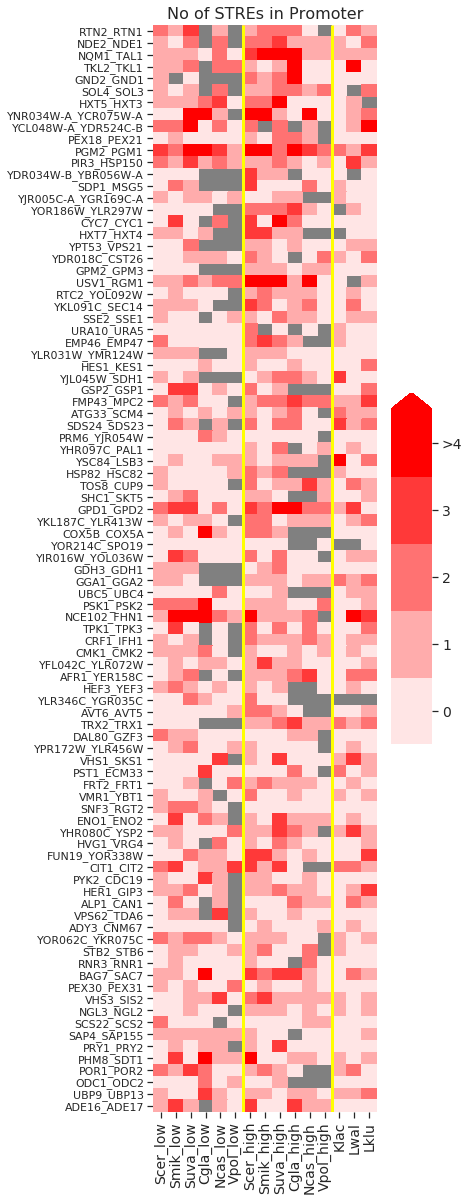

In [18]:
# Plot heatmap of all STREs in same order 
# heatmap after filtering and sorting

motif = 'STRE'

spec_sets = {'Post WGH low' : ['Scer'] + spec_order_post_WGH, 
             'Post WGH high' : ['Scer'] + spec_order_post_WGH, 
             'Pre WGH' : ['Klac'] + spec_order_pre_WGH} 

levels = {'Post WGH low': 'low', 
          'Post WGH high': 'high', 
          'Pre WGH' : ''}


columns_to_show = []
label_order = []
for spec_set_name in ['Post WGH low', 'Post WGH high', 'Pre WGH']: 
    spec_set = spec_sets[spec_set_name]
    level = levels[spec_set_name]
    if level == '': 
        level_sep = ''
    else: 
        level_sep = '_'
        
    for spec in spec_set: 
        
        columns_to_show.append(spec + '_' + motif + '_count' + level_sep + level)
        label_order.append(spec + level_sep + level)
        
        
#Make labels for each species, and separate out pre/post WGH and post WGH high/low with yellow lines
  
big_lines = []
for jj,label in enumerate(label_order):
    if label in {'Vpol_low', 'Vpol_high'}:
        big_lines.append(jj+1)

        
        
ohnologs_goi_counts = ohnologs_goi.loc[:, columns_to_show]

fig_STRE, ax_STRE = plt.subplots(figsize=(5,20))

#cmap = cm.get_cmap('PiYG', 11) 
vmax = 5
sns.heatmap(ohnologs_goi_counts, vmax = vmax, ax=ax_STRE, cmap=sns.light_palette("red",vmax), cbar_kws={'ticks':[val + 0.5 for val in range(vmax)],  'extend':'max', 'aspect':8})  
cbar = fig_STRE.axes[1]
cbar.set_yticklabels([str(val) for val in range(vmax-1)] + ['>' + str(vmax-1)], fontdict={"fontsize":14})
ax_STRE.set_facecolor("grey")
ax_STRE.set_xticklabels(label_order, fontdict={"fontsize":14})
ax_STRE.set_ylabel('')
ax_STRE.set_title('No of STREs in Promoter',fontdict={"fontsize":16})
ax_STRE.vlines(big_lines, ymin = 0, ymax = len(ohnologs_goi_counts), colors = 'yellow',linewidth=3)

fig_STRE.savefig(os.path.normpath('/home/heineike/scratch/' + motif + '_conservation_all.svg'),bbox_inches='tight')






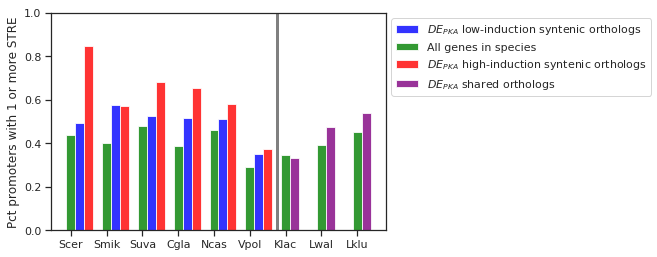

In [15]:
#Plot percentage of STREs in low and high as you go away from S.Cer

motif_name = 'STRE'

fig_pct, ax_pct = plt.subplots()
bw = 0.25
opacity = 0.8

spec_sets = {'Post WGH low' : ['Scer'] + spec_order_post_WGH, 
             'Post WGH high' : ['Scer'] + spec_order_post_WGH, 
             'Pre WGH' : ['Klac'] + spec_order_pre_WGH} 

colors = {'all':'green', 'low': 'blue', 'high':'red', 'Pre WGH': 'purple'}
legend_labels = {'all':'All genes in species', 'low': '$DE_{PKA}$ low-induction syntenic orthologs', 
                 'high':'$DE_{PKA}$ high-induction syntenic orthologs', 'Pre WGH': '$DE_{PKA}$ shared orthologs'}
index = {'all':[], 'low':[],'high':[], 'Pre WGH':[]}
data = {'all':[], 'low':[],'high':[], 'Pre WGH':[]}
label_order = []
jj = 0

#Post WGH Species
#assumes the same species sets are in both
for spec in spec_sets['Post WGH high']: 
    label_order.append(spec)        
    index['all'].append(jj)
    index['low'].append(jj+bw)
    index['high'].append(jj+bw*2)
    data['all'].append(motif_calcs['Post WGH high'][spec]['all'][motif_name]['pct'])
    data['low'].append(motif_calcs['Post WGH low'][spec]['goi'][motif_name]['pct'])
    data['high'].append(motif_calcs['Post WGH high'][spec]['goi'][motif_name]['pct'])    
    jj = jj+1

#pre WGH Species
#assumes the same species sets are in both
for spec in spec_sets['Pre WGH']: 
    label_order.append(spec)        
    index['all'].append(jj)
    index['Pre WGH'].append(jj+bw)
    data['all'].append(motif_calcs['Pre WGH'][spec]['all'][motif_name]['pct'])
    data['Pre WGH'].append(motif_calcs['Pre WGH'][spec]['goi'][motif_name]['pct'])
    jj = jj+1

    
for subset_name, subset_data in data.items(): 
    
    pct_plot = ax_pct.bar(index[subset_name],subset_data, bw,
                 alpha=opacity,
                 color=colors[subset_name],
                 label=legend_labels[subset_name]) 
                 #bottom = bottom)

ax_pct.vlines([len(index['low'])-0.25], ymin = 0, ymax = 1.0, colors = 'gray',linewidth=3)
ax_pct.set_xticklabels(label_order)
ax_pct.set_xticks(index['all'])
ax_pct.set_ylim(0,1.0)
ax_pct.set_ylabel('Pct promoters with 1 or more STRE')
ax_pct.legend(loc = 'upper left', bbox_to_anchor = (1.0,1.0))

fig_pct.savefig(os.path.normpath('/home/heineike/scratch/STRE_conservation_summary.svg'),bbox_inches='tight')

##  STRE enrichment with DE Stress genes - S.Cer

In [254]:
#Load GOI ohnolog data

seed_spec = 'Scer'

fname = data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_' + seed_spec + '_PKAest_20190123.pkl')
with open(fname, 'rb') as file:
    [ohnologs_goi,ohnologs_expression_sorted,goi_criteria] = pickle.load(file)

L_prom = 700
output_format = 'full'
motif_dict = {'STRE': 'CCCCT', 'TATA': 'TATA[AT]A[AT][AG]', 'PDS': 'AGGGAT'} 
sequence_context = 2   

spec_order_post_WGH = ['Scer','Smik','Suva', 'Cgla', 'Ncas','Vpol']  
spec_order_pre_WGH = ['Klac','Lwal','Lklu']  #might be able to get Calb promoters fairly easily

    
#Add SC_common_name_high, low and high_low columns to an ohnologs_file
ohnologs_goi = io_library.SC_common_name_columns_ohnologs(ohnologs_goi, seed_spec)
ohnologs_goi.reset_index(inplace=True)
ohnologs_goi.set_index('SC_common_name_high_low', inplace=True)

#Load expression_data_df_sorted in order to get correct order of genes
fname_exp_data_sorted = os.path.normpath(data_processing_dir + 'regev_data/20190130_expression_data_DE_stress_' + seed_spec +'_sorted.csv')
expression_data_df_sorted = pd.read_csv(fname_exp_data_sorted,index_col=0)

#Throw out genes that aren't in my ohnolog set.  
new_index = []
for high_low in expression_data_df_sorted.index: 
    if high_low in set(ohnologs_goi.index):
        new_index.append(high_low)
    else:
        print(high_low + ' not in ohnologs set')

#sort genes by new index: 
ohnologs_goi_rowsort = ohnologs_goi.loc[new_index,:]

ohnologs_goi = ohnologs_goi_rowsort
    
ohnologs_goi, motif_calcs = io_library.motif_scan_YGOB_specs(ohnologs_goi, seed_spec, spec_order_pre_WGH, spec_order_post_WGH, motif_dict, L_prom=L_prom,output_format=output_format, sequence_context=sequence_context )


I am importing io_library
what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = otherb
base directory is /home/heineike/github/expression_broad_data
data processing dir is /home/heineike/github/expression_broad_data/expression_data/
Klac
Lwal
Lklu
Scer
Smik
Suva
Cgla
Ncas
Vpol
Scer
Smik
Suva
Cgla
Ncas
Vpol
Kpol_218.5 not present in promoter dict for Vpol
Kpol_260.5 not present in promoter dict for Vpol
Kpol_282.1 not present in promoter dict for Vpol


I am importing io_library
what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = otherb
base directory is /home/heineike/github/expression_broad_data
data processing dir is /home/heineike/github/expression_broad_data/expression_data/


<IPython.core.display.Javascript object>


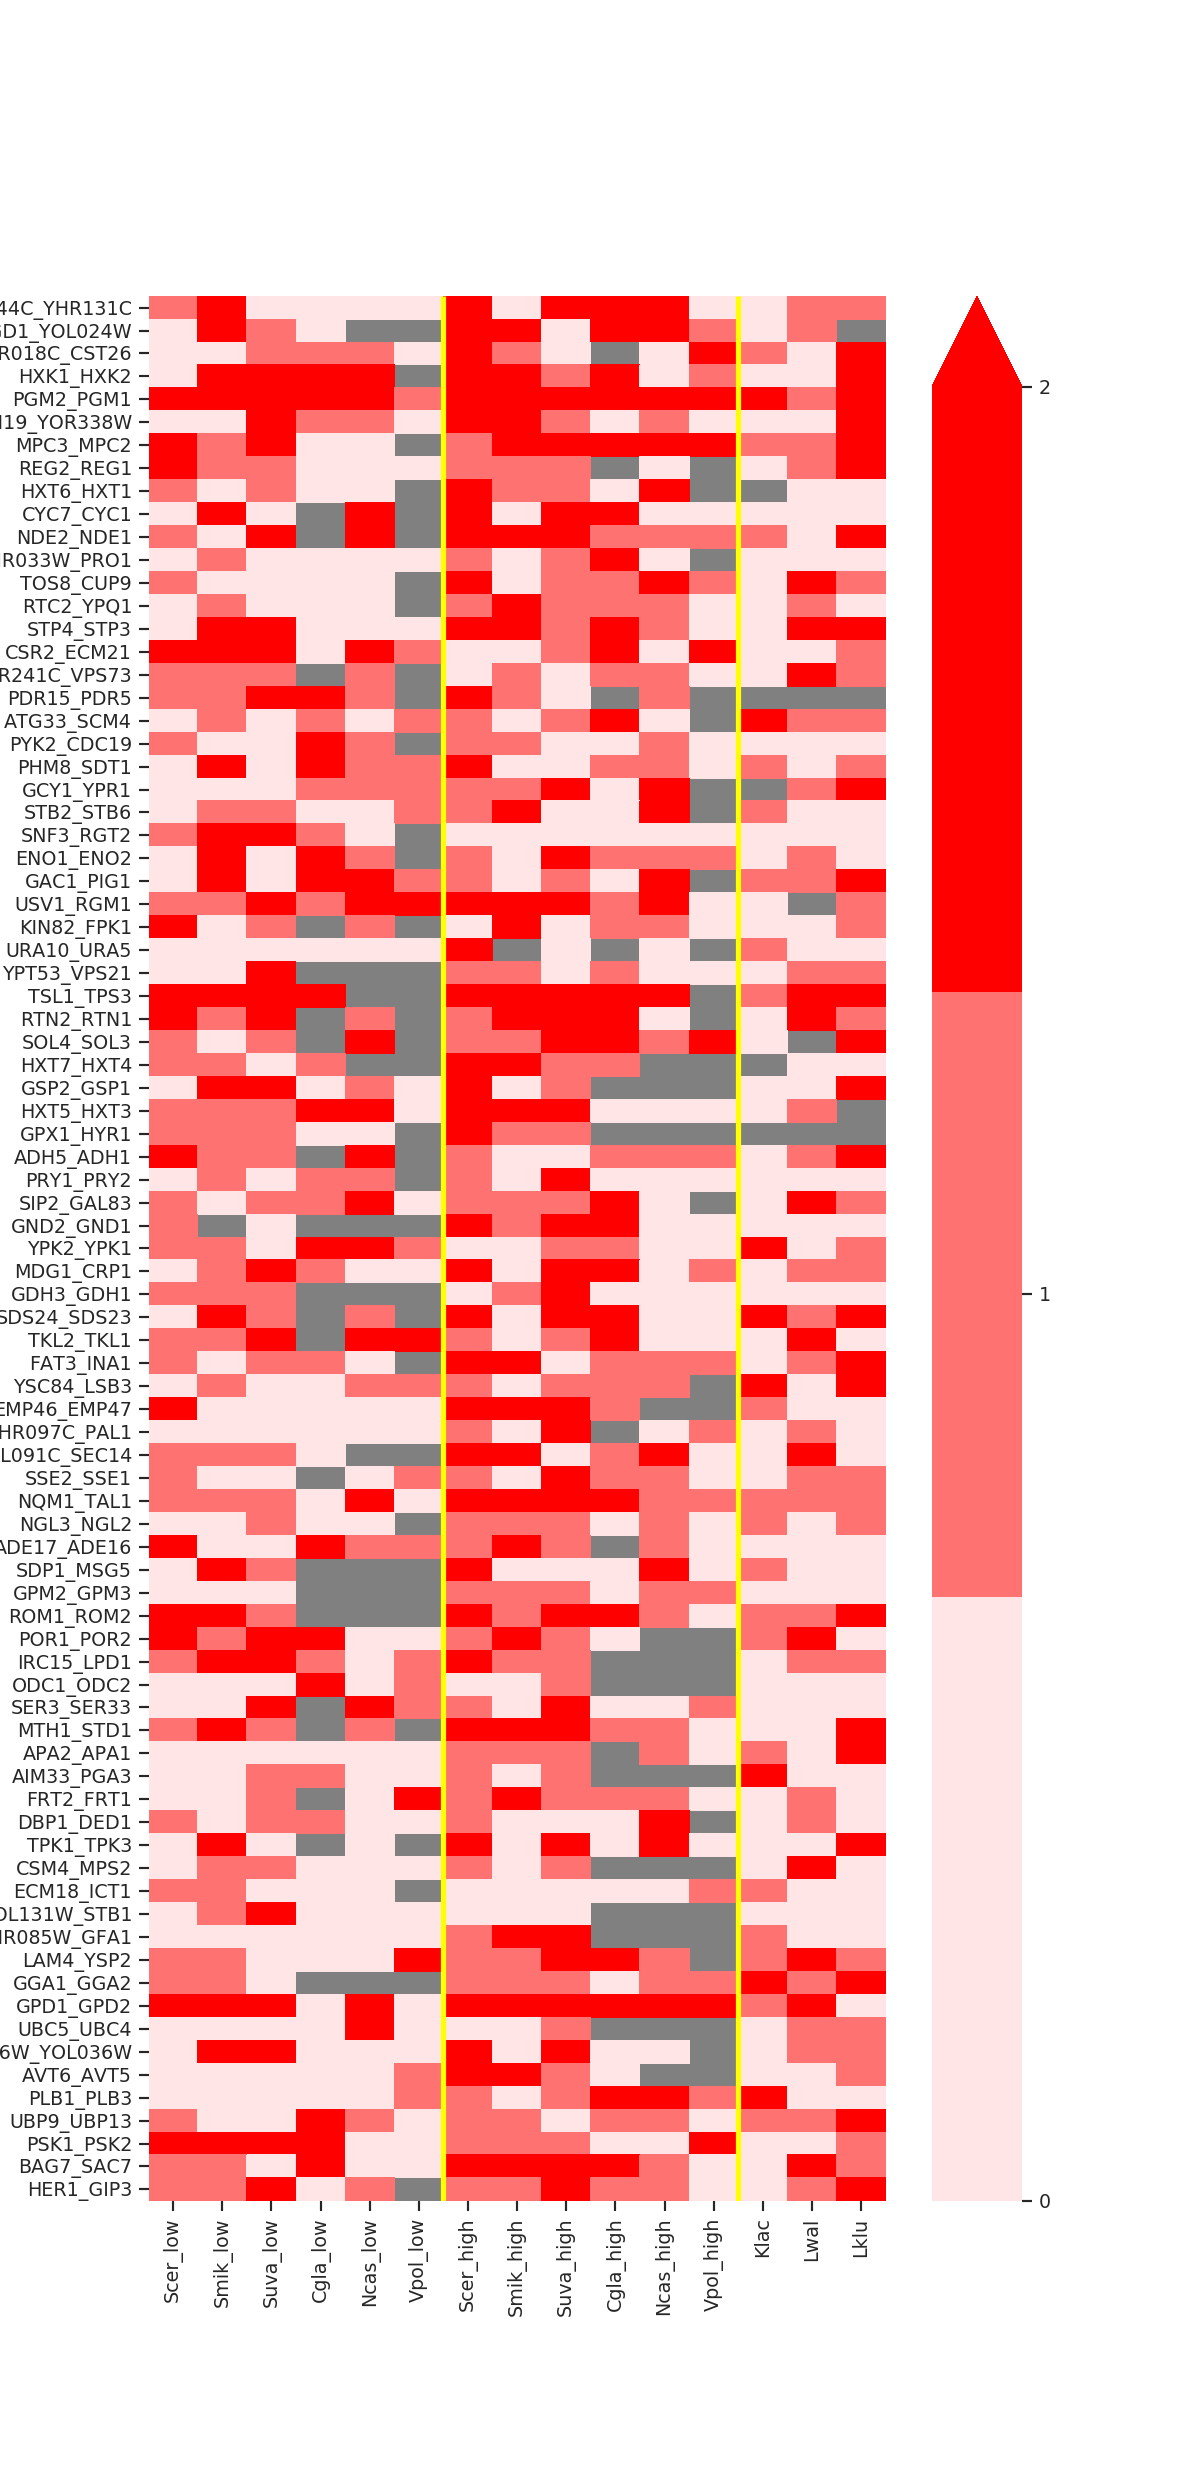

In [255]:
# Plot heatmap of all STREs in same order 
# heatmap after filtering and sorting

motif_name = 'STRE'

spec_sets = {'Post WGH low' : spec_order_post_WGH, 
             'Post WGH high' : spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 

levels = {'Post WGH low': 'low', 
          'Post WGH high': 'high', 
          'Pre WGH' : ''}


columns_to_show = []
label_order = []
for spec_set_name in ['Post WGH low', 'Post WGH high', 'Pre WGH']: 
    spec_set = spec_sets[spec_set_name]
    level = levels[spec_set_name]
    if level == '': 
        level_sep = ''
    else: 
        level_sep = '_'
        
    for spec in spec_set: 
        
        columns_to_show.append(spec + '_' + motif_name + '_count' + level_sep + level)
        label_order.append(spec + level_sep + level)
        
        
#Make labels for each species, and separate out pre/post WGH and post WGH high/low with yellow lines
  
big_lines = []
for jj,label in enumerate(label_order):
    if label in {'Vpol_low', 'Vpol_high'}:
        big_lines.append(jj+1)

        
        
ohnologs_goi_counts = ohnologs_goi.loc[:, columns_to_show]

fig_STRE, ax_STRE = plt.subplots(figsize=(5,20))

#cmap = cm.get_cmap('PiYG', 11) 
sns.heatmap(ohnologs_goi_counts, vmax = 2, ax=ax_STRE, cmap=sns.light_palette("red",3), cbar_kws={'ticks':[0,1,2], 'extend': 'max'}) #, 'yticklabels':['0', '1', '>1']})

ax_STRE.set_facecolor("grey")
ax_STRE.set_xticklabels(label_order)
ax_STRE.vlines(big_lines, ymin = 0, ymax = len(ohnologs_goi_counts), colors = 'yellow',linewidth=3)

fig_STRE.savefig(os.path.normpath('/home/heineike/scratch/' + motif_name + '_evol_DEstress' + seed_spec + '_20190130.svg'),bbox_inches='tight')




<IPython.core.display.Javascript object>


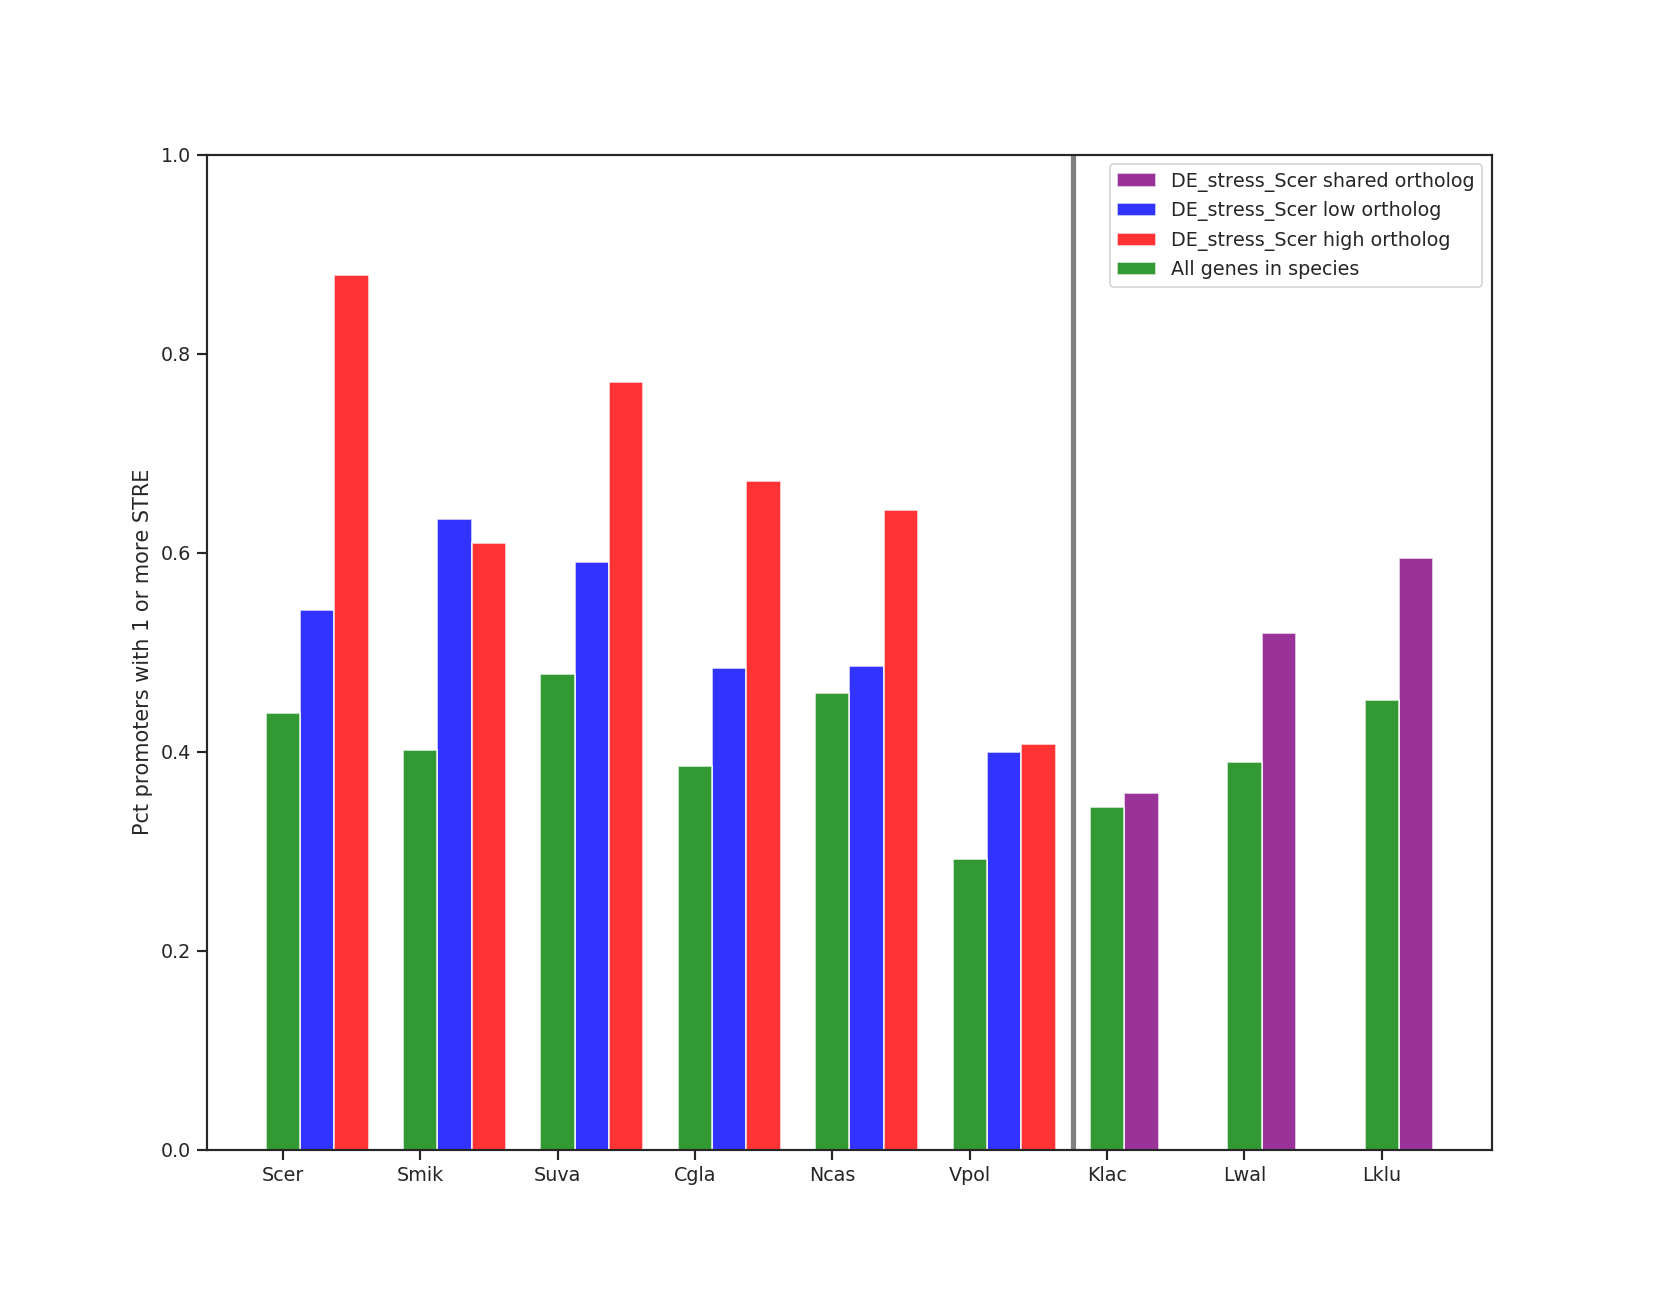

In [257]:
#Plot percentage of STREs in low and high as you go away from S.Cer

motif_name = 'STRE'

fig_pct, ax_pct = plt.subplots()
bw = 0.25
opacity = 0.8

spec_sets = {'Post WGH low' : spec_order_post_WGH, 
             'Post WGH high' : spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 

colors = {'all':'green', 'low': 'blue', 'high':'red', 'Pre WGH': 'purple'}
legend_labels = {'all':'All genes in species', 'low': 'DE_stress_' + seed_spec + ' low ortholog', 
                 'high':'DE_stress_' + seed_spec + ' high ortholog', 'Pre WGH': 'DE_stress_' + seed_spec + ' shared ortholog'}
index = {'all':[], 'low':[],'high':[], 'Pre WGH':[]}
data = {'all':[], 'low':[],'high':[], 'Pre WGH':[]}
label_order = []
jj = 0

#Post WGH Species
#assumes the same species sets are in both
for spec in spec_sets['Post WGH high']: 
    label_order.append(spec)        
    index['all'].append(jj)
    index['low'].append(jj+bw)
    index['high'].append(jj+bw*2)
    data['all'].append(motif_calcs['Post WGH high'][spec]['all'][motif_name]['pct'])
    data['low'].append(motif_calcs['Post WGH low'][spec]['goi'][motif_name]['pct'])
    data['high'].append(motif_calcs['Post WGH high'][spec]['goi'][motif_name]['pct'])    
    jj = jj+1

#pre WGH Species
#assumes the same species sets are in both
for spec in spec_sets['Pre WGH']: 
    label_order.append(spec)        
    index['all'].append(jj)
    index['Pre WGH'].append(jj+bw)
    data['all'].append(motif_calcs['Pre WGH'][spec]['all'][motif_name]['pct'])
    data['Pre WGH'].append(motif_calcs['Pre WGH'][spec]['goi'][motif_name]['pct'])
    jj = jj+1

    
for subset_name, subset_data in data.items(): 
    
    pct_plot = ax_pct.bar(index[subset_name],subset_data, bw,
                 alpha=opacity,
                 color=colors[subset_name],
                 label=legend_labels[subset_name]) 
                 #bottom = bottom)

ax_pct.vlines([len(index['low'])-0.25], ymin = 0, ymax = 1.0, colors = 'gray',linewidth=3)
ax_pct.set_xticklabels(label_order)
ax_pct.set_xticks(index['all'])
ax_pct.set_ylim(0,1.0)
ax_pct.set_ylabel('Pct promoters with 1 or more STRE')
ax_pct.legend()

## STRE enrichment with DE Stress genes - V.Pol

In [261]:
#Load GOI ohnolog data

seed_spec = 'Vpol'

fname = data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_' + seed_spec + '_PKAest_20190123.pkl')
with open(fname, 'rb') as file:
    [ohnologs_goi,ohnologs_expression_sorted,goi_criteria] = pickle.load(file)

L_prom = 700
output_format = 'full'
motif_dict = {'STRE': 'CCCCT', 'TATA': 'TATA[AT]A[AT][AG]', 'PDS': 'AGGGAT'} 
sequence_context = 2   

spec_order_post_WGH = ['Vpol', 'Ncas', 'Cgla','Suva','Smik', 'Scer']  
spec_order_pre_WGH = ['Klac','Lwal','Lklu']  #might be able to get Calb promoters fairly easily

    
#Add SC_common_name_high, low and high_low columns to an ohnologs_file
ohnologs_goi = io_library.SC_common_name_columns_ohnologs(ohnologs_goi, seed_spec)
ohnologs_goi.reset_index(inplace=True)
ohnologs_goi.set_index('SC_common_name_high_low', inplace=True)

#Load expression_data_df_sorted in order to get correct order of genes
fname_exp_data_sorted = os.path.normpath(data_processing_dir + 'regev_data/20190130_expression_data_DE_stress_' + seed_spec +'_sorted.csv')
expression_data_df_sorted = pd.read_csv(fname_exp_data_sorted,index_col=0)

#Throw out genes that aren't in my ohnolog set.  
new_index = []
for high_low in expression_data_df_sorted.index: 
    if high_low in set(ohnologs_goi.index):
        new_index.append(high_low)
    else:
        print(high_low + ' not in ohnologs set')

#sort genes by new index: 
ohnologs_goi_rowsort = ohnologs_goi.loc[new_index,:]

ohnologs_goi = ohnologs_goi_rowsort
    
ohnologs_goi, motif_calcs = io_library.motif_scan_YGOB_specs(ohnologs_goi, seed_spec, spec_order_pre_WGH, spec_order_post_WGH, motif_dict, L_prom=L_prom,output_format=output_format, sequence_context=sequence_context )


Pre WGH
Klac
Klac_YGOB_STM1 not present in promoter dict for Klac
Lwal
Lklu
Post WGH high
Vpol
Kpol_387.1 not present in promoter dict for Vpol
Kpol_1037.61 not present in promoter dict for Vpol
Ncas
Cgla
Suva
Smik
Scer
Post WGH low
Vpol
Kpol_1002.123 not present in promoter dict for Vpol
Ncas
Cgla
Suva
Smik
Scer


<IPython.core.display.Javascript object>


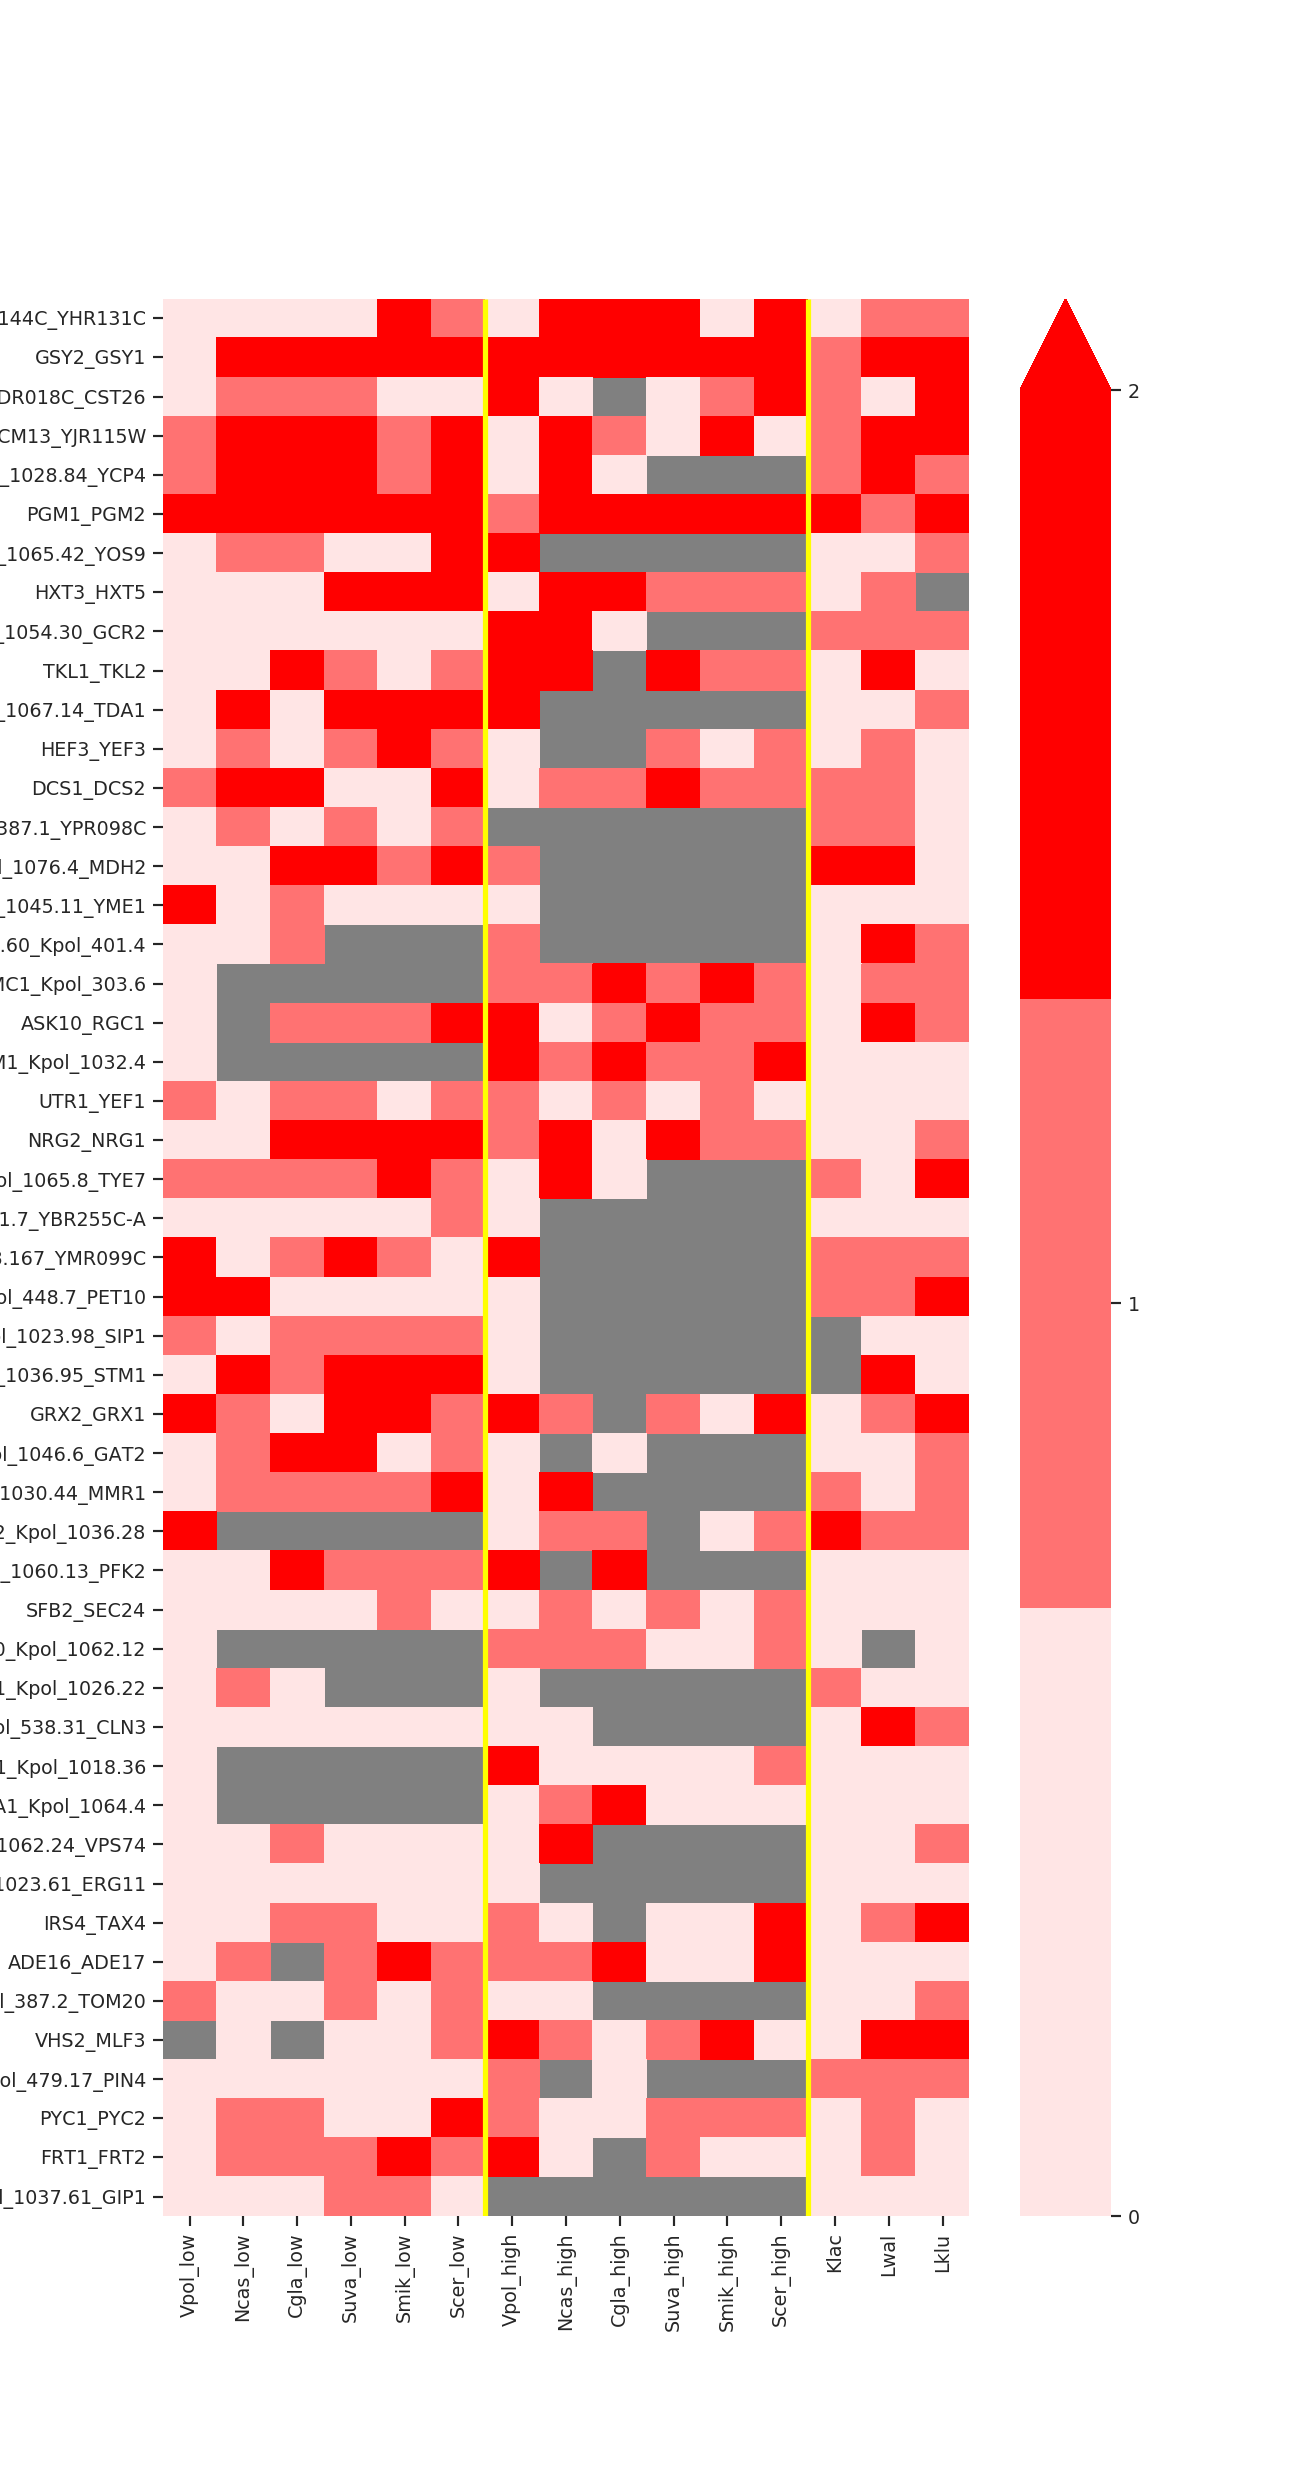

In [263]:
# Plot heatmap of all STREs in same order 
# heatmap after filtering and sorting

motif_name = 'STRE'

spec_sets = {'Post WGH low' : spec_order_post_WGH, 
             'Post WGH high' : spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 

levels = {'Post WGH low': 'low', 
          'Post WGH high': 'high', 
          'Pre WGH' : ''}


columns_to_show = []
label_order = []
for spec_set_name in ['Post WGH low', 'Post WGH high', 'Pre WGH']: 
    spec_set = spec_sets[spec_set_name]
    level = levels[spec_set_name]
    if level == '': 
        level_sep = ''
    else: 
        level_sep = '_'
        
    for spec in spec_set: 
        
        columns_to_show.append(spec + '_' + motif_name + '_count' + level_sep + level)
        label_order.append(spec + level_sep + level)
        
        
#Make labels for each species, and separate out pre/post WGH and post WGH high/low with yellow lines
  
big_lines = []
for jj,label in enumerate(label_order):
    if label in {'Scer_low', 'Scer_high'}:
        big_lines.append(jj+1)

        
        
ohnologs_goi_counts = ohnologs_goi.loc[:, columns_to_show]

fig_STRE, ax_STRE = plt.subplots(figsize=(5,20))

#cmap = cm.get_cmap('PiYG', 11) 
sns.heatmap(ohnologs_goi_counts, vmax = 2, ax=ax_STRE, cmap=sns.light_palette("red",3), cbar_kws={'ticks':[0,1,2], 'extend': 'max'}) #, 'yticklabels':['0', '1', '>1']})

ax_STRE.set_facecolor("grey")
ax_STRE.set_xticklabels(label_order)
ax_STRE.vlines(big_lines, ymin = 0, ymax = len(ohnologs_goi_counts), colors = 'yellow',linewidth=3)

fig_STRE.savefig(os.path.normpath('/home/heineike/scratch/' + motif_name + '_evol_DEstress' + seed_spec + '_20190130.svg'),bbox_inches='tight')


<IPython.core.display.Javascript object>


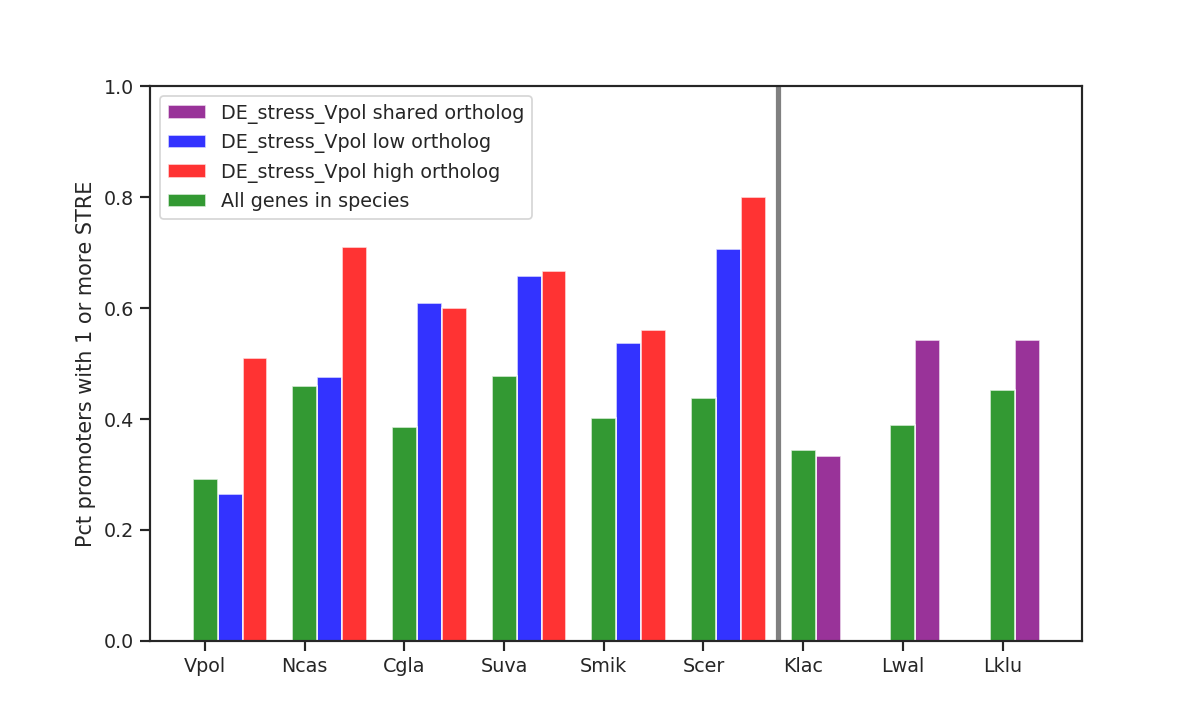

In [264]:
#Plot percentage of STREs in low and high as you go away from S.Cer

motif_name = 'STRE'

fig_pct, ax_pct = plt.subplots()
bw = 0.25
opacity = 0.8

spec_sets = {'Post WGH low' : spec_order_post_WGH, 
             'Post WGH high' : spec_order_post_WGH, 
             'Pre WGH' : spec_order_pre_WGH} 

colors = {'all':'green', 'low': 'blue', 'high':'red', 'Pre WGH': 'purple'}
legend_labels = {'all':'All genes in species', 'low': 'DE_stress_' + seed_spec + ' low ortholog', 
                 'high':'DE_stress_' + seed_spec + ' high ortholog', 'Pre WGH': 'DE_stress_' + seed_spec + ' shared ortholog'}
index = {'all':[], 'low':[],'high':[], 'Pre WGH':[]}
data = {'all':[], 'low':[],'high':[], 'Pre WGH':[]}
label_order = []
jj = 0

#Post WGH Species
#assumes the same species sets are in both
for spec in spec_sets['Post WGH high']: 
    label_order.append(spec)        
    index['all'].append(jj)
    index['low'].append(jj+bw)
    index['high'].append(jj+bw*2)
    data['all'].append(motif_calcs['Post WGH high'][spec]['all'][motif_name]['pct'])
    data['low'].append(motif_calcs['Post WGH low'][spec]['goi'][motif_name]['pct'])
    data['high'].append(motif_calcs['Post WGH high'][spec]['goi'][motif_name]['pct'])    
    jj = jj+1

#pre WGH Species
#assumes the same species sets are in both
for spec in spec_sets['Pre WGH']: 
    label_order.append(spec)        
    index['all'].append(jj)
    index['Pre WGH'].append(jj+bw)
    data['all'].append(motif_calcs['Pre WGH'][spec]['all'][motif_name]['pct'])
    data['Pre WGH'].append(motif_calcs['Pre WGH'][spec]['goi'][motif_name]['pct'])
    jj = jj+1

    
for subset_name, subset_data in data.items(): 
    
    pct_plot = ax_pct.bar(index[subset_name],subset_data, bw,
                 alpha=opacity,
                 color=colors[subset_name],
                 label=legend_labels[subset_name]) 
                 #bottom = bottom)

ax_pct.vlines([len(index['low'])-0.25], ymin = 0, ymax = 1.0, colors = 'gray',linewidth=3)
ax_pct.set_xticklabels(label_order)
ax_pct.set_xticks(index['all'])
ax_pct.set_ylim(0,1.0)
ax_pct.set_ylabel('Pct promoters with 1 or more STRE')
ax_pct.legend()

## Attempt to get all promoters from y1000plus.  
Stopped because there is no syntenic mapping of all genomes as in YGOB, and no current mapping of known genes to genes found in y1000 plus. 

In [3]:
#extract species numbers for the Saccharomyces clade
y1000plus_dir = "/home/heineike/genomes/y1000plus/"
y1000_species_fname = y1000plus_dir + "343taxa_speicies-name_clade-name_color-code.txt"
y1000_species = pd.read_table(y1000_species_fname, index_col=0)

In [6]:
list(y1000_species['original_genome_id'])

['saprochaete_clavata',
 'yHMPu5000034974_deakozyma_indianensis_160519',
 'clavispora_lusitaniae',
 'yHMPu5000034999_cephaloascus_fragrans_160519',
 'yHMPu5000034998_cephaloascus_albidus_160519',
 'babjeviella_inositovora',
 'candida_dubliniensis',
 'candida_albicans',
 'candida_parapsilosis',
 'candida_homilentoma',
 'candida_tropicalis',
 'candida_orthopsilosis',
 'candida_carpophila',
 'candida_tanzawaensis',
 'candida_tenuis',
 'yHMPu5000034632_candida_athensensis_160519',
 'yHMPu5000035679_candida_rhagii_160613',
 'yHMPu5000035681_candida_gotoi_160519',
 'yHMPu5000034643_candida_schatavii_160519',
 'yHMPu5000035031_candida_kruisii_160519',
 'yHMPu5000035302_candida_fragi_160928',
 'debaryomyces_hansenii',
 'yHMPu5000041713_debaryomyces_maramus_160928',
 'yHMPu5000041693_debaryomyces_nepalensis_160928',
 'yHMPu5000041829_debaryomyces_fabryi_160928',
 'hyphopichia_burtonii',
 'yHMPu5000035318_hyphopichia_heimii_160928',
 'yHMPu5000035667_kurtzmaniella_cleridarum_160928',
 'lodderomy

In [26]:
#Build promoter fasta for all promoters in a given species

y1000plus_dir = "/home/heineike/genomes/y1000plus/"
L_prom = 700
genome_name = 'naumovozyma_castellii'

promoter_dir = data_processing_dir + os.path.normpath('promoter_phylogeny/promoter_sets/' + genome_name)
#os.mkdir(promoter_dir)
promoter_fname = os.path.normpath(promoter_dir + '/all_promoters_' + str(L_prom) + '.fasta')

with open(promoter_fname,'w') as f: 

    #if S.Cer skip finding promoter, 
    if genome_name != 'saccharomyces_cerevisiae':    
        #load gene_id map based on the species
        gene_lookup_spec_fname = y1000plus_dir + "id_lookups/" + genome_name + '.csv'
        gene_lookup_spec = pd.read_csv(gene_lookup_spec_fname, index_col='y1000_id')

        # Load GTF for given sequence: 
        gtf_dir = "/home/heineike/genomes/y1000plus/0_332yeast_genomes/332_genome_annotations/gtf/"
        db_fname = gtf_dir + 'gffutils_dbs/' + genome_name + '.db'

        gtf_db = gffutils.FeatureDB(db_fname)

        #Extract sequences from genome
        genome_dir = "/home/heineike/genomes/y1000plus/0_332yeast_genomes/332_genome_assemblies/"

        genome_fname = genome_dir + genome_name + '.fas'

        seq_records = SeqIO.parse(genome_fname, "fasta")

        #For each gene, extract all related features, and then output chromosome and coordinates for the promoter
        short_promoters = {}
        for row in gene_lookup_spec.iterrows():
            y1000_id = row[0]
            gene_full = row[1].gene_full
            gene_id = row[1].gene_id   

            cursor = gtf_db.execute('select * from features where attributes like "%' + gene_full + '%"')
            all_features = cursor.fetchall()
            if len(all_features) == 0:
                print('No features found ' + gene_full + ' ' +genome_name)

            strand = all_features[0]['strand']
            chrom = all_features[0]['seqid']

            starts = []
            ends = []
            for feature in all_features: 
                starts.append(feature['start'])
                ends.append(feature['end'])

            #Adjust coordinates to get L_prom "promoter" sequences
            if strand == '-': 
                prom_end = max(ends) + 1
                prom_start = prom_end + L_prom   #should do min of this and the total length of the scaffold, 
            elif strand == '+': 
                prom_end = min(starts) - 1
                prom_start = max(0,prom_end - L_prom)

            #extract sequences from genome
            #This seems super inefficient - should group by chromosome first if possible. 
            for seq_record in seq_records:
                if seq_record.id == chrom:
                    scaffold = seq_record

            #if strand is negative, check to see if promoter coordinates are at the end of the scaffold

            L_scaffold = len(scaffold)

            if strand == '-': 
                if prom_start > L_scaffold: 
                    print('promoter region extends past the scaffold, genome_name = ' + genome_name + ' Gene = ' + gene_id + ', L_prom = ' + str(L_prom))
                    prom_start = L_scaffold
                if prom_end > L_scaffold: 
                    print('scaffold ends at the end of the gene, genome_name = ' + genome_name + ' Gene = ' + gene_id)
                    prom_end = L_scaffold

                promoter = scaffold.seq[prom_end:prom_start].reverse_complement()
            elif strand == '+': 
                promoter = scaffold.seq[prom_start:prom_end]
            
            if abs(prom_end-prom_start)<L_prom:
                short_promoters[y1000_id] = abs(prom_end-prom_start)
                
            #do not add promoter if it has L=0 
            if abs(prom_end-prom_start)>0: 
                f.write('>species=' + genome_name + ' y1000_id=' + y1000_id + ' gene_id=' + gene_id + ' gene_full=' + gene_full +
                      ' scaffold=' + chrom + " strand=" + strand + " start=" + str(prom_start) + ' end=' + str(prom_end) +  ' L=' + str(abs(prom_end-prom_start)) + '\n')
                f.write(str(promoter.upper()) + '\n')  #I wonder why some of the bases were in lower case

short_promoters_fname = os.path.normpath(promoter_dir + '/short_promoters.fasta')
with open(short_promoters_fname,'w') as f: 
    for y1000_id, L_short_prom in short_promoters.items(): 
        f.write(y1000_id + '\t' + str(L_short_prom) + '\n')     

            

promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_1012, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_1012
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_1025, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_1025
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_1030, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_1030
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_105, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_105
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_1052, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_1052
promote

promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_1695, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_1695
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_1702, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_1702
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_1708, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_1708
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_1728, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_1728
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_1741, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_1741
promo

promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_2364, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_2364
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_2376, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_2376
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_2385, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_2385
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_2389, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_2389
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_2415, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_2415
promo

promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_2977, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_2977
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_2983, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_2983
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_2986, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_2986
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_3028, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_3028
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_3032, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_3032
promo

promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_3736, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_3736
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_3740, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_3740
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_3755, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_3755
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_3815, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_3815
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_3826, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_3826
promo

promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_4471, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_4471
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_4476, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_4476
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_4513, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_4513
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_4514, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_4514
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_4526, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_4526
promo

promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_4971, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_4971
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_500, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_500
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_502, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_502
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_5029, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_5029
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_5052, L_prom = 700
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_5052
promoter 

ValueError: too many values to unpack (expected 2)

In [ ]:
#given genes of interest, identify paralogs from other species
#start with YGOB and only for species in Regev set

YGOB: 
Ncas, Suva, Sbay, Smik, ,['Cgla', 'Scer' ]

['Klac','Lklu', Lwal

Regev: 
 post: Spar
 Dhan, Calb, Ylip,  Sjap, Spom 
 
 
#expand to hittinger lab species. 

#For a given set of genes in a species calculate enrichment